<img src="https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width="500">
<h1 align="center"><font size="7"><strong>Final Project 2</strong></font></h1>

------------------------------------------------

HACKTIV8 - PYTHON FOR DATA SCIENCE

------------------------------------------------

# Kelompok 2 - PYTN KS 019

1. Nur Ishmawati
2. Dyah Ayu Kusuma Wardhani
3. ChristopherBernard S. H
4. Ahmat Zainul M


# __A. INTRODUCTION__
-----------------

Final Project 2 ini dibuat guna mengevaluasi konsep Logistic Regression dan SVM sebagai berikut:
- Mampu memahami konsep Classification dengan Logistic Regression dan SVM
- Mampu mempersiapkan data untuk digunakan dalam model Logistic Regression dan SVM
- Mampu mengimplementasikan Logistic Regression dan SVM untuk membuat prediksi

Database ini (https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package) memiliki 23 atribut. Dengan data hujan harian selama 10 tahun di Australia, kolom RainTomorrow adalah target variable yang mau kita prediksi. Jika “Yes” maka besok harinya disana hujan 1mm atau lebih.

Metode pendekatan model statistik dan machine learning untuk melakukan prediksi hujan akan dilakukan pada project ini. Metode yang digunakan untuk memprekdiksi keadaan hujan dengan menggunakan data yang diambil di Australia adalah Logistic Regression, K-Nearest Neighbors, Support Virtual Machine, Decision Tree, Random Forest, dan Naive Bayes.

Objektif yang ingin dicapai dari pemodelan pada final project 2 ini adalah:

- Mengetahui faktor-faktor yang dapat mempengaruhi prediksi Hujan di Wilayah Australia
- Membuat pemodelan machine learning untuk memprediksi hujan di wilayah Australia berdasarkan faktor-faktor yang mempengaruhinya menggunakan 6 model metode (Logistic Regression, K-Nearest Neighbors, Support Virtual Machine, Decision Tree, Random Forest, dan Naive Bayes).
- Mengetahui model terbaik dari ke 6 model yang dibuat.

# __B. IMPORT LIBRARY__
----------------------------

In [1]:
# Import Library Dataframe
import pandas as pd
import numpy as np

# Import Library untuk Visualisasi
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score, mean_squared_error

# Import Library untuk Data Exploration
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler, SMOTE
import missingno as msno

# Import Library untuk Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC

# Import Library untuk ignore warning
import warnings
warnings.filterwarnings('ignore')

# For API Adjustment
import pickle

# Style Text
bold = '\033[1m'
normal = '\033[0m'

# C. DATA LOADING
-------------------

## 1. Memanggil Dataset

In [2]:
df = pd.read_csv('weatherAUS.csv')
pd.set_option('display.max.columns',None)       # Untuk melihat semua kolom

# Melihat 5 data paling atas
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
# Melihat 5 data terbawah
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,ESE,17.0,17.0,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [4]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


**``Keterangan dataset:``**

Database ini terdiri dari ``23 atribut`` yang memiliki ``145,460 baris``. Dimana memuat data hujan harian selama 10 tahun di Australia, kolom RainTomorrow adalah target variable yang akan diprediksi.
1. ``Date`` - tanggal hari itu
2. ``Location`` - lokasi, nama kota di Australia
3. ``MinTemp`` - temperatur terendah hari itu dalam celcius
4. ``MaxTemp`` - temperatur tertinggi hari itu dalam celcius
5. ``Rainfall`` - jumlah curah hujan hari itu dalam mm
6. ``Evaporation`` - jumlah evaporasi dalam mm dari Class A pan selama 24 jam sebelum jam 9 pagi hari itu
7. ``Sunshine`` - jumlah jam hari itu cerah dengan cahaya matahari
8. ``WindGustDir`` - arah kecepatan angin yang paling tinggi selama 24 jam sebelum jam 12 malam hari itu
9. ``WindGustSpeed`` - kecepatan angin yang paling tinggi dalam km/jam selama 24 jam sebelum jam 12 malam hari itu
10. ``WindDir9am`` - arah angin jam 9 pagi
11. ``WindDir3pm`` - arah angin jam 3 sore
12. ``WindSpeed9am`` - kecepatan angin jam 9 pagi dalam km/jam dihitung dari rata-rata kecepatan angin 10 menit sebelum jam 3 sore
13. ``WindSpeed3pm`` - kecepatan angin jam 3 sore dalam km/jam dihitung dari rata-rata kecepatan angin 10 menit sebelum jam 3 sore
14. ``Humidity9am`` - humiditas jam 9 pagi dalam persen
15. ``Humidity3pm`` - humiditas jam 3 sore dalam persen
16. ``Pressure9am`` - tekanan udara jam 9 pagi dalam hpa
17. ``Pressure3pm`` - tekanan udara jam 3 sore dalam hpa
18. ``Cloud9am`` - persentase langit yang tertutup awan jam 9 pagi. dihitung dalam oktas, unit ⅛, menghitung berapa unit ⅛ dari langit yang tertutup awan. Jika 0, langit cerah, jika 8, langit sepenuhnya tertutup awan.
19. ``Cloud3pm`` - persentase langit yang tertutup awan jam 3 sore
20. ``Temp9am`` - temperatur jam 9 pagi dalam celcius
21. ``Temp3pm`` - temperatur jam 3 sore dalam celcius
22. ``RainToday`` - apakah hari ini hujan: jika curah hujan 24 jam sebelum jam 9 pagi melebihi 1mm, maka nilai ini adalah 1, jika tidak nilai nya 0
23. ``RainTomorrow`` - variable yang di prediksi (Jika “Yes” maka besok harinya disana hujan 1mm atau lebih)

## 2. Melihat Jumlah Baris & Kolom

In [5]:
df.shape

(145460, 23)

Dataset ini terdiri dari 23 atribut yang memiliki 145,460 baris.

## 3. Melihat Info dan Tipe Data 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [7]:
# Mengecek tipe data
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

Dataset ini terdiri dari 23 atribut yang memiliki 145,460 baris, dengan ``tipe data float dan object``.

In [8]:
# Melihat data unik
df.nunique().sort_values(ascending=True)

RainTomorrow        2
RainToday           2
Cloud3pm           10
Cloud9am           10
WindDir3pm         16
WindDir9am         16
WindGustDir        16
WindSpeed9am       43
WindSpeed3pm       44
Location           49
WindGustSpeed      67
Humidity9am       101
Humidity3pm       101
Sunshine          145
Evaporation       358
MinTemp           389
Temp9am           441
Temp3pm           502
MaxTemp           505
Pressure9am       546
Pressure3pm       549
Rainfall          681
Date             3436
dtype: int64

## 4. Melihat Data Kategorik dan Numerik

In [9]:
# Mengecek kolom kategori
categorical_col = [col for col in df.columns if df[col].dtypes =='O']

print('Terdapat {} kolom kategori'.format(len(categorical_col)))
print('Kolom kategori tersebut yaitu:', categorical_col)

Terdapat 7 kolom kategori
Kolom kategori tersebut yaitu: ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [10]:
# Mengecek kolom numerik
numerical_col = [col for col in df.columns if df[col].dtypes !='O']

print('Terdapat {} kolom numerik'.format(len(numerical_col)))
print('Kolom numerik tersebut yaitu:', numerical_col)

Terdapat 16 kolom numerik
Kolom numerik tersebut yaitu: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


# D. DATA CLEANING
------------------------
Proses mempersiapkan data untuk analisis dengan menghapus atau memodifikasi data yang tidak benar, tidak lengkap, tidak relevan, diduplikasi, atau diformat dengan tidak benar.


## 1. Mengecek Missing Value
    Mengecek missing value pada setiap kolom

In [11]:
#Mengecek apakah terdapat missing value
df.isnull().values.any()    

True

In [12]:
# Memeriksa kolom yang terdapat missing value
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

Pada dataframe terdapat missing value pada setiap kolom kecuali **``'Date dan Location'``**

In [13]:
# Menghitung nilai null pada dataset
df.isnull().sum().sum()

343248

Total missing value pada data set sebanyak 343,248

In [14]:
dt_miss = pd.DataFrame({"Missing_Value":df.isna().sum(), "Percentase":df.apply(lambda x: f'{((x.isnull().sum()/df.shape[0])*100).round(2)} %')})
dt_miss

,Missing_Value,Percentase
Date,0,0.0 %
Location,0,0.0 %
MinTemp,1485,1.02 %
MaxTemp,1261,0.87 %
Rainfall,3261,2.24 %
Evaporation,62790,43.17 %
Sunshine,69835,48.01 %
WindGustDir,10326,7.1 %
WindGustSpeed,10263,7.06 %
WindDir9am,10566,7.26 %


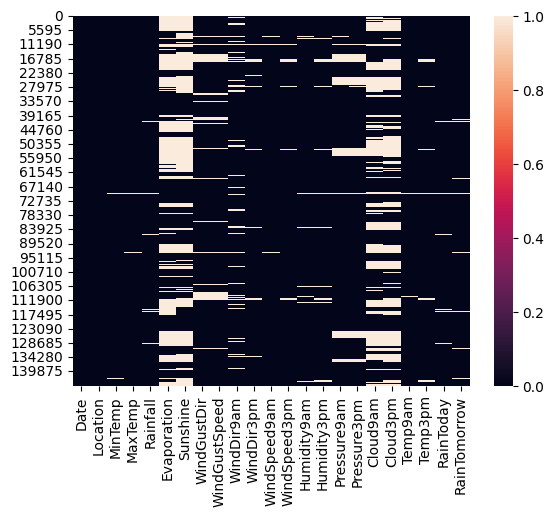

In [15]:
sns.heatmap(df.isnull())
plt.show()

## 2. Mengganti Tipe Data

In [16]:
# memisahkan pada kolom Date karena terlalu banyak nilai unique
df['Date'] = pd.to_datetime(df['Date'])

In [17]:
# Membuat kolom tahun dari kolom date
df['Year'] = df['Date'].dt.year

# Membuat kolom bulan dari kolom date
df['Month'] = df['Date'].dt.month

# Membuat kolom hari dari kolom date
df['Day'] = df['Date'].dt.day

# Menghapus kolom date dari data frame
df.drop('Date', axis=1, inplace = True)

df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [18]:
# Kolom Year, Month, dan Day yang ditambahkan menjadi tipe numerik, maka akan dipisahkan dari tipe numerik
numerical_col = [var for var in df.columns if df[var].dtype!='O']

# Menghapus data yang telah dipisah dari Date
numerical_col.remove('Year')
numerical_col.remove('Month')
numerical_col.remove('Day')

print('Terdapat {} kolom kategori\n'.format(len(numerical_col)))
print('Kolom kategori tersebut yaitu: ', numerical_col)

print(''*5)
print('_'*250)
print(''*5)


# Menampilkan data
df[numerical_col].head()

Terdapat 16 kolom kategori

Kolom kategori tersebut yaitu:  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

__________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________



,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7


## 3. Melihat Distribusi Kolom Numerik

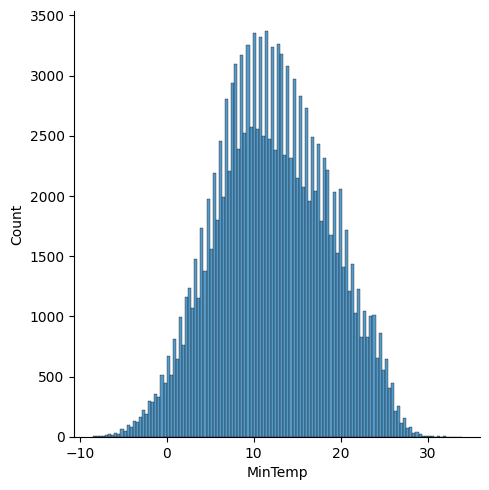

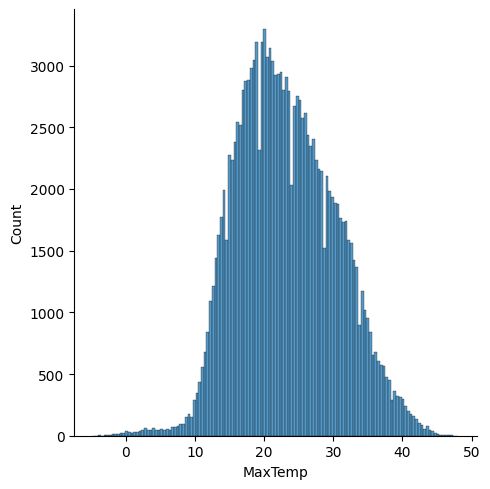

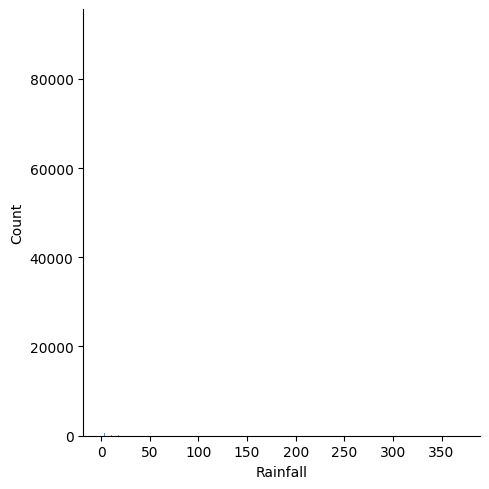

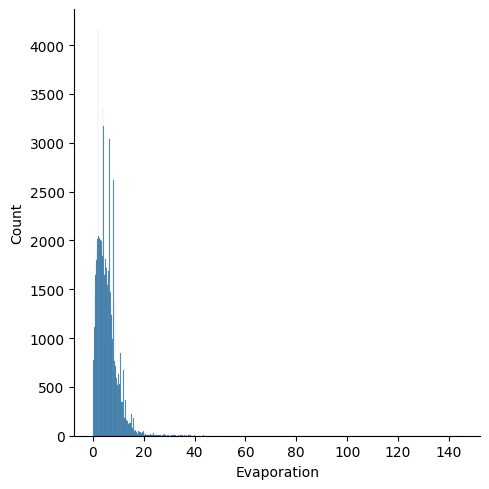

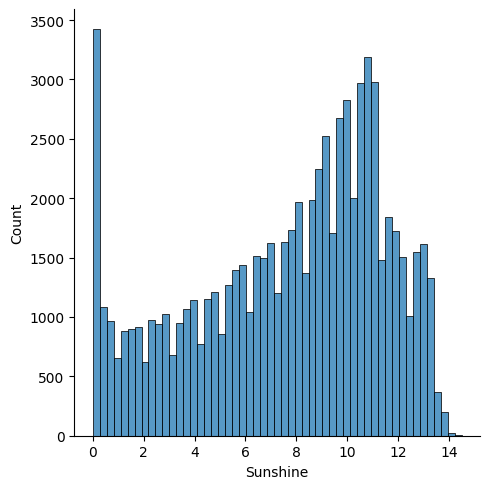

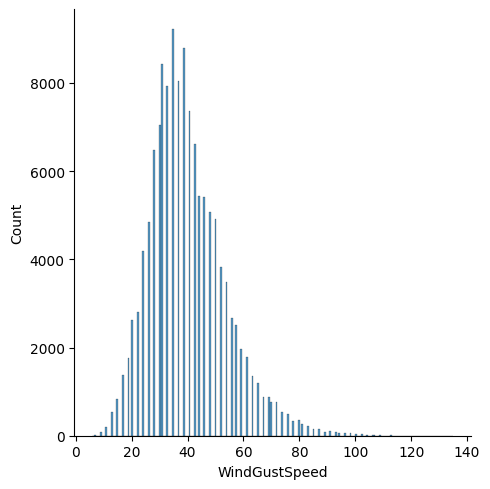

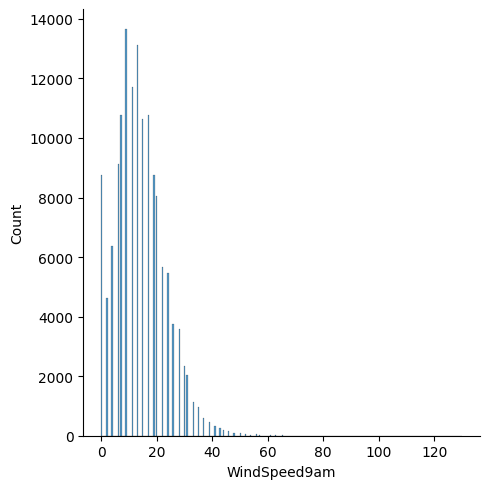

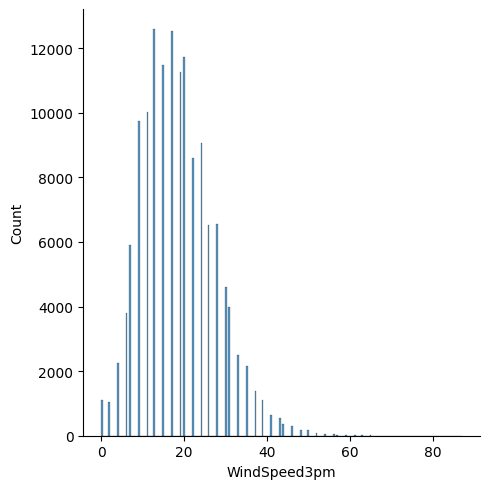

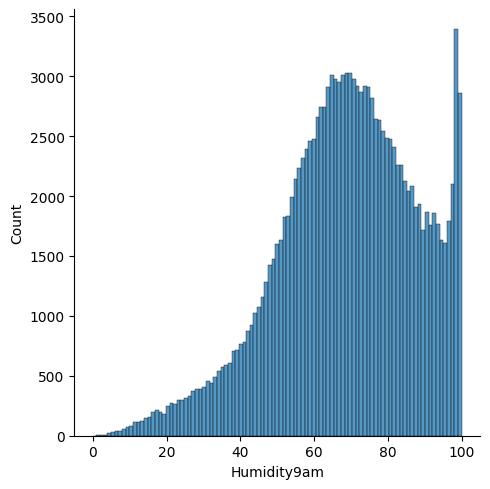

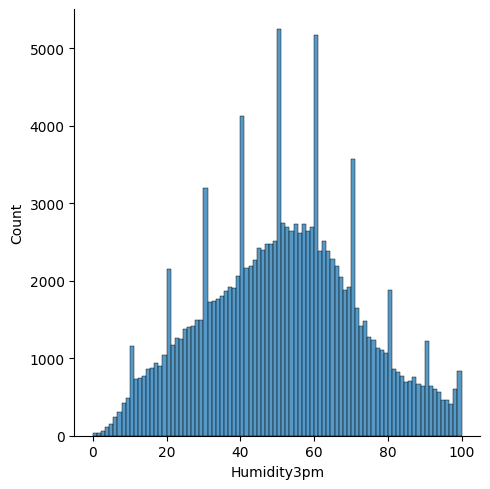

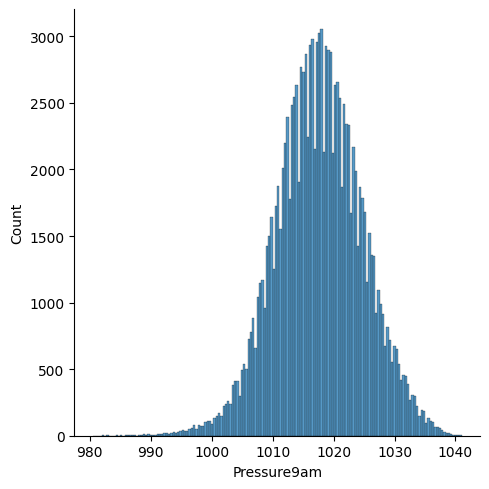

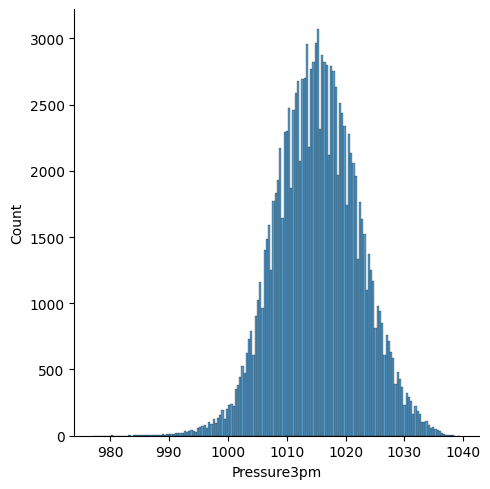

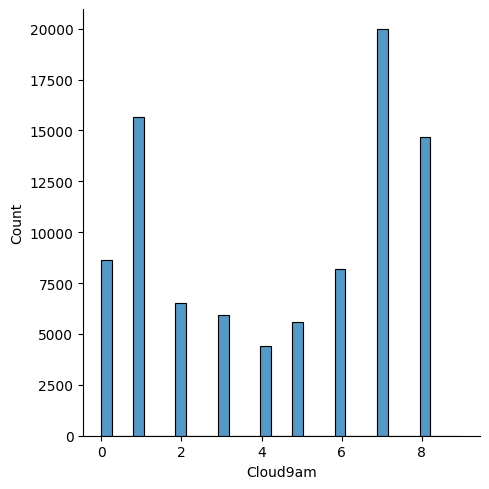

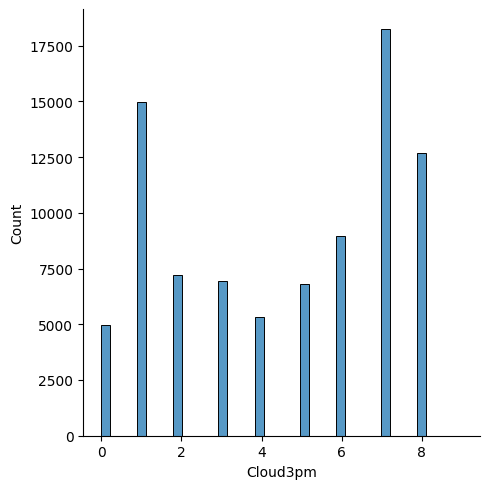

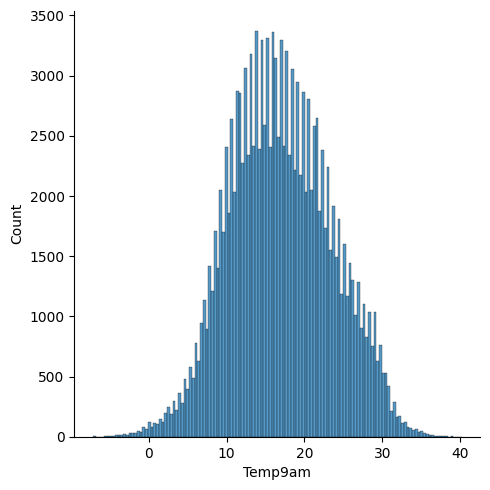

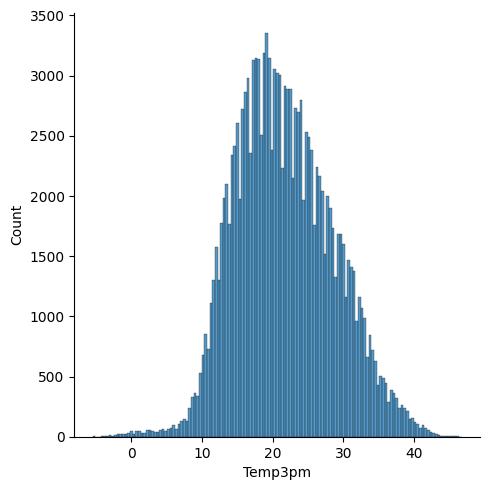

In [19]:
# Menampilkan visualisasi distribusi normal dari kolom numerik
for i in numerical_col:
    sns.displot(df[i])
    plt.show()

Berdasarkan visualisasi di atas terlihat bahwa data pada tipe numerik masih belum berdistribusi normal dikarenakan masih banyak terdapat data yang null. Sehingga diperlukan untuk mengisinya dengan data mean/median dari setiap kolom yang null. Jika terdapat skewness maka diperlukan pengisian nilai yang kosong pada kolom dengan median.

## 4. Mengecek Outlier Kolom Numerik

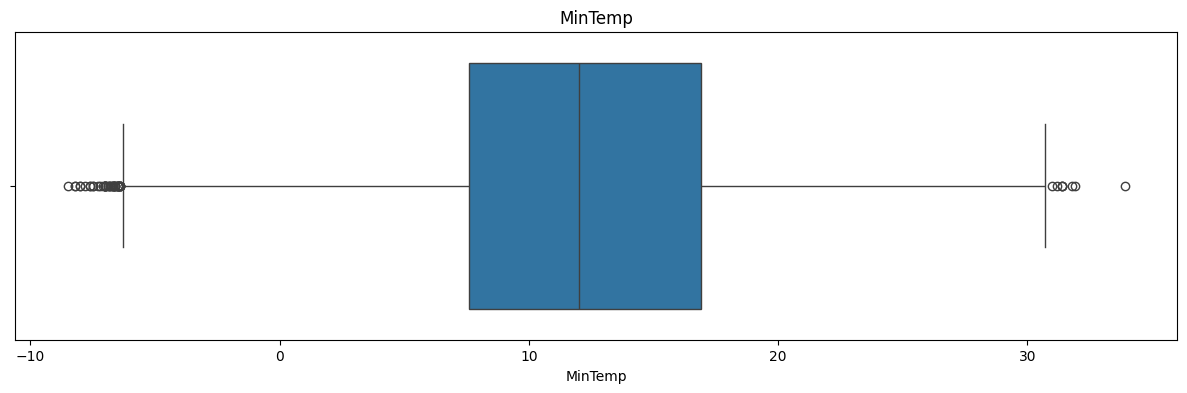

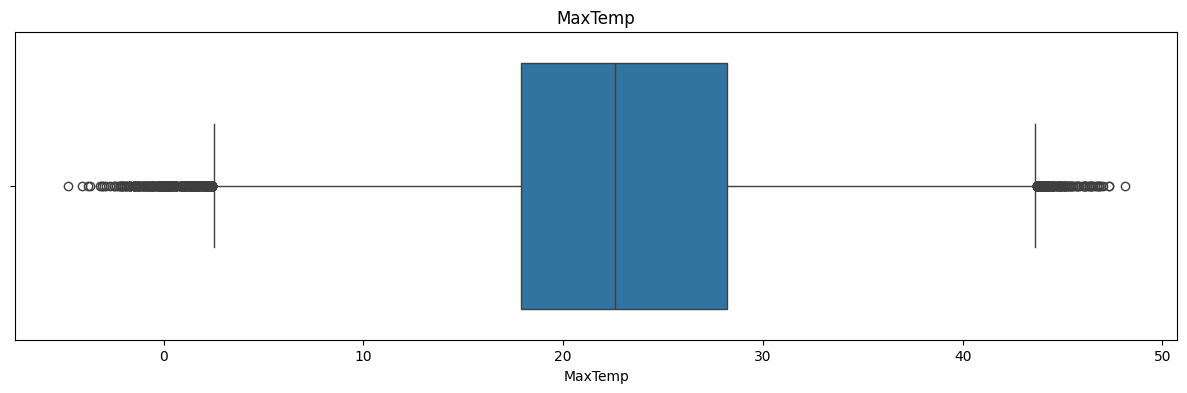

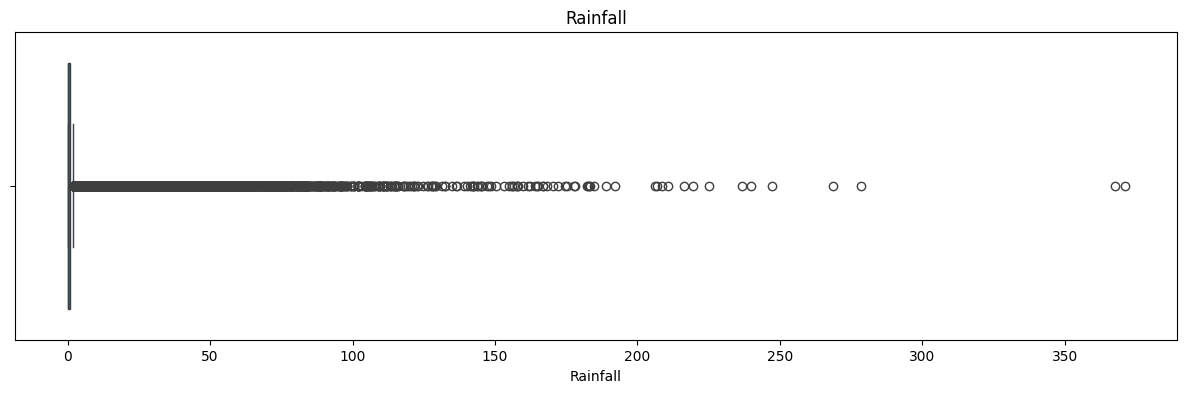

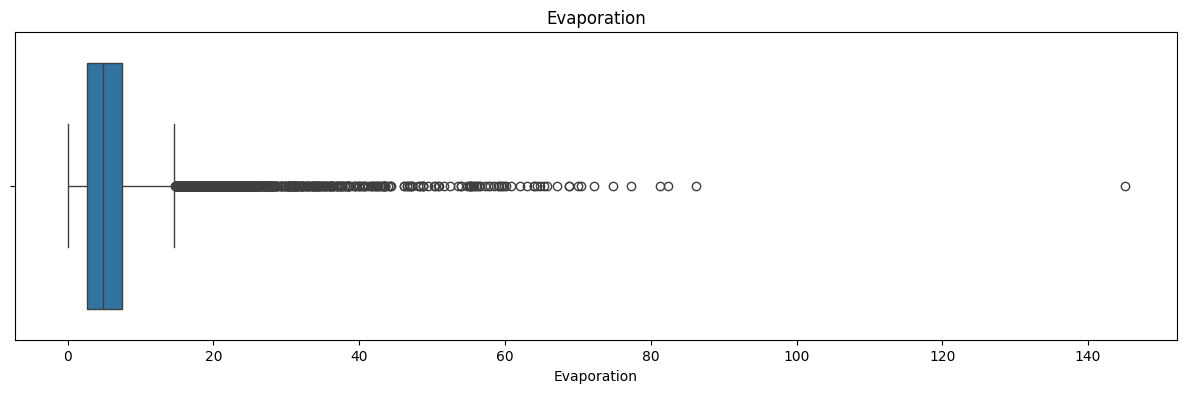

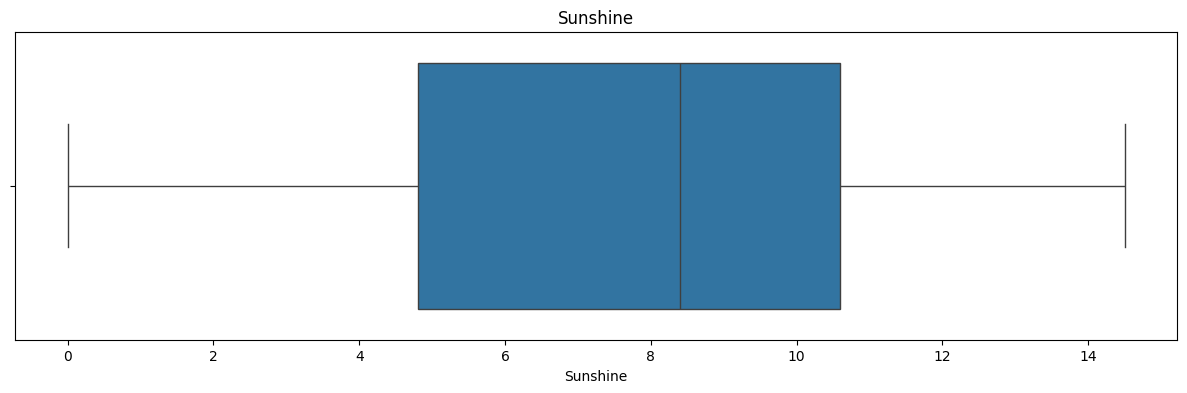

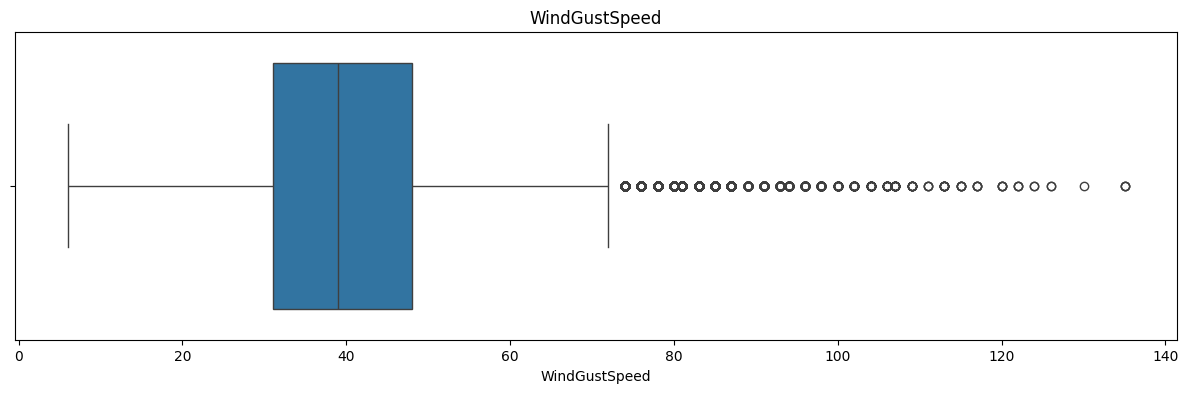

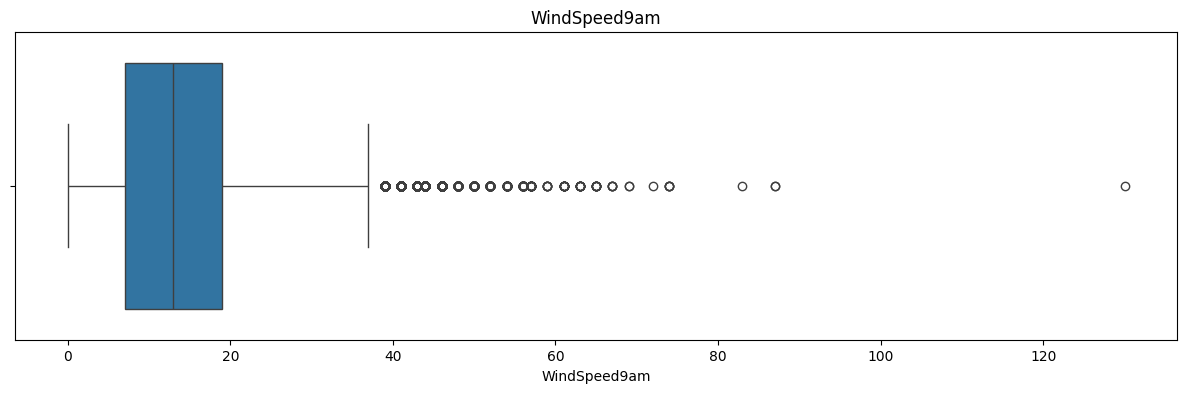

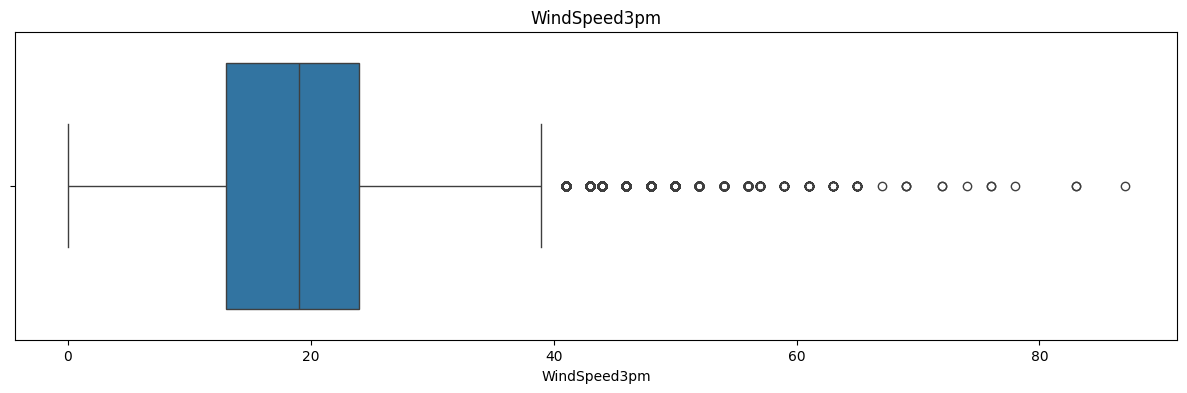

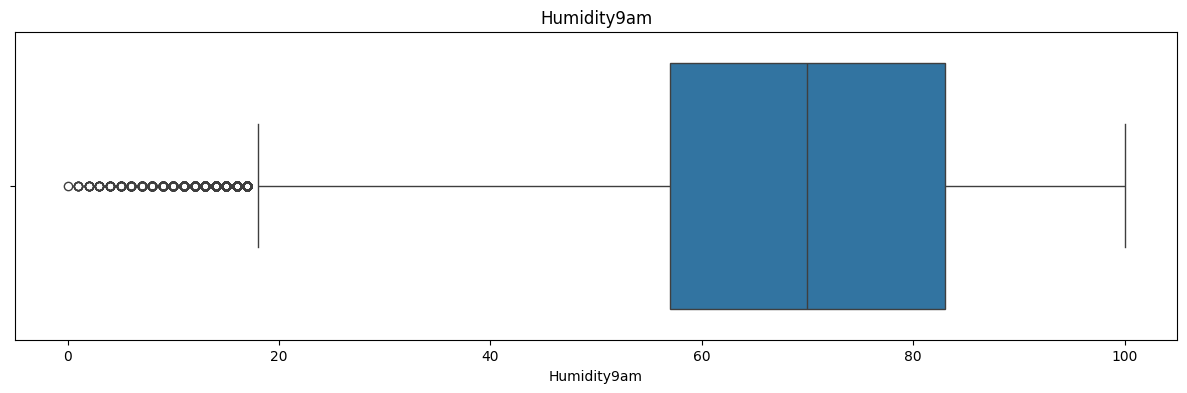

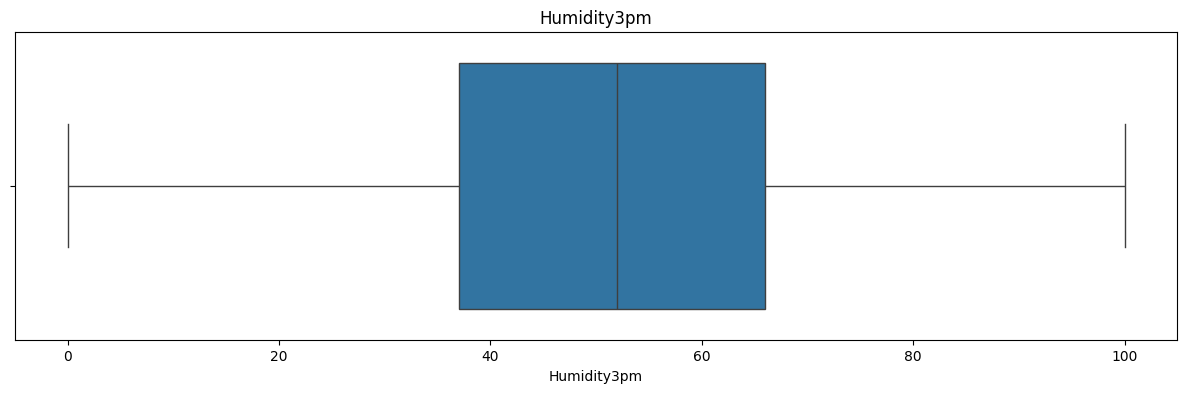

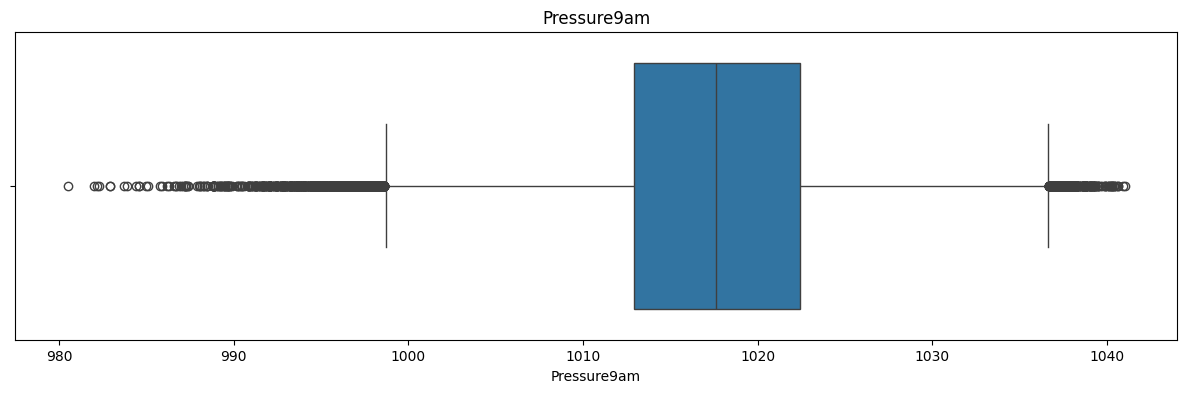

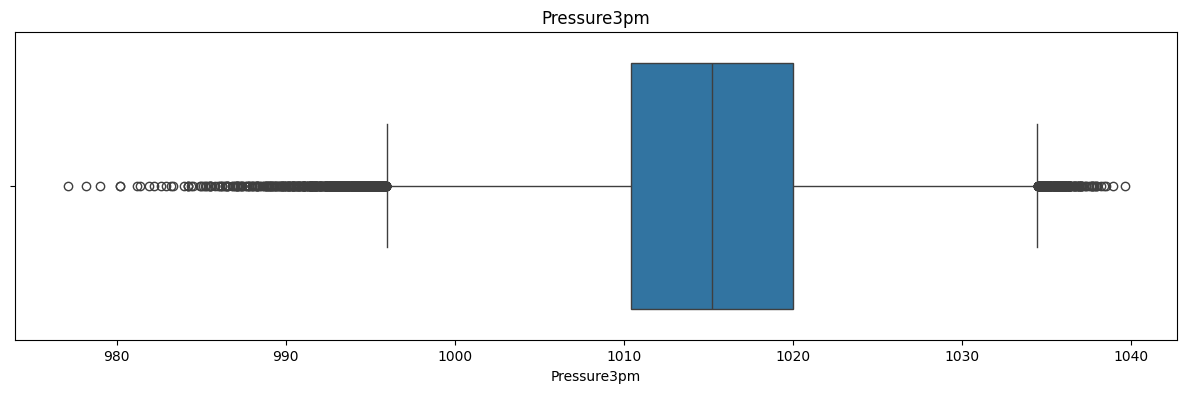

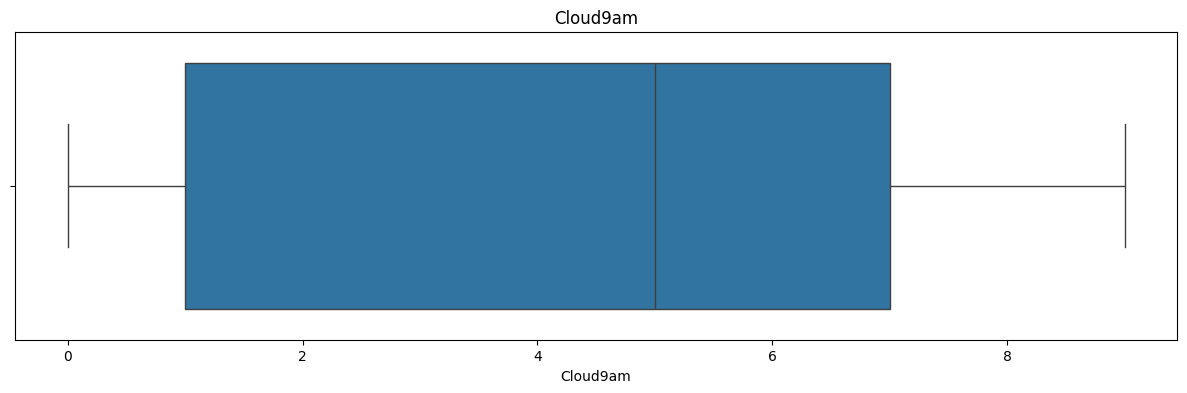

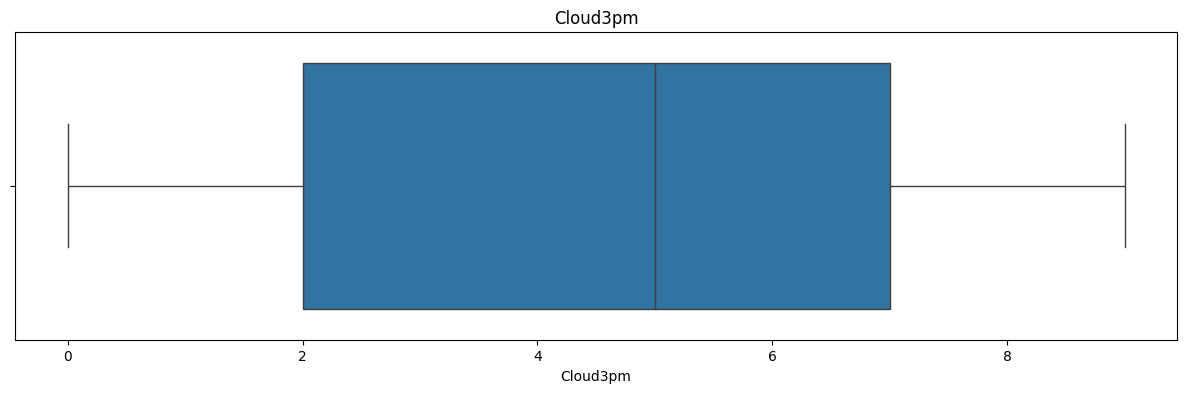

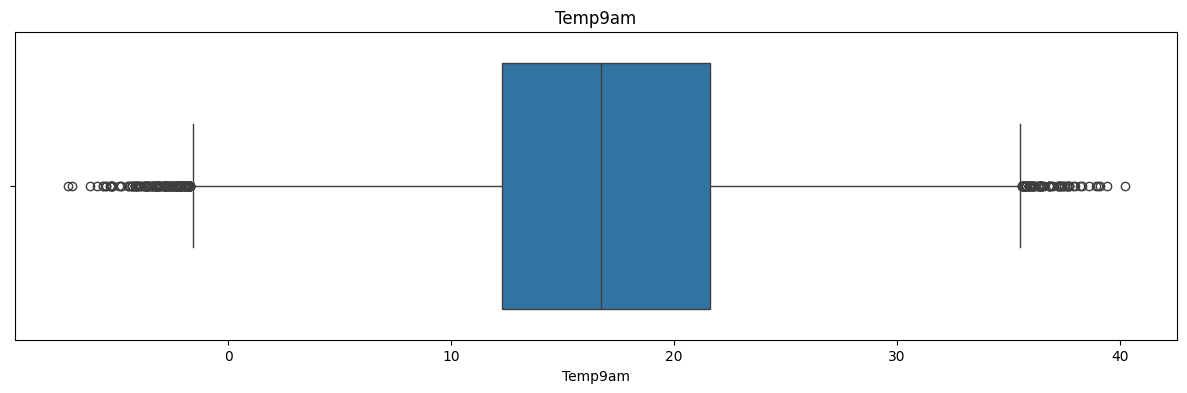

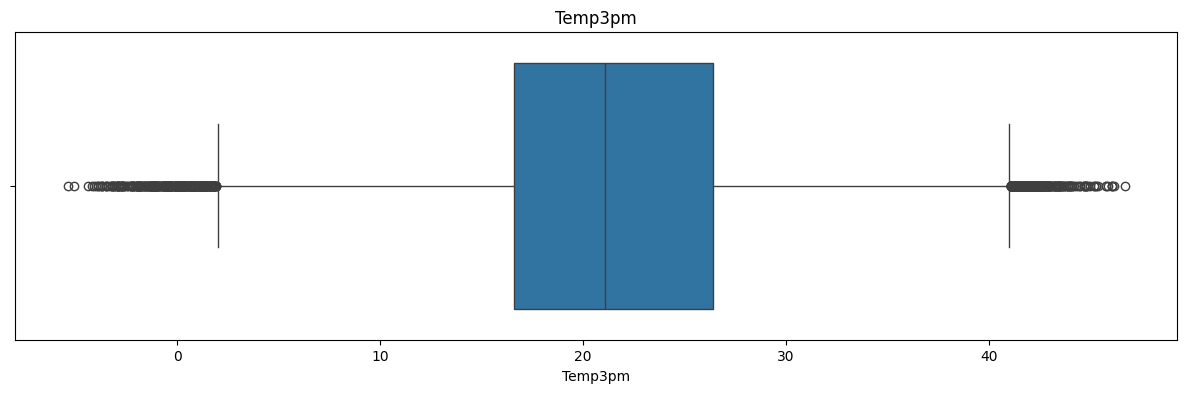

In [20]:
# Megecek outlier menggunakan boxplot
for i in df[numerical_col]:
    plt.figure(figsize=(15,4))
    plt.title(i)
    ax = sns.boxplot(x=df[numerical_col][i])

Terlihat melalui visualisasi boxplot masih terdapat outlier pada kolom-kolom numerik.

In [21]:
# Membuat list untuk kolom yang memiliki outliers
outlier_col = ['MinTemp','MaxTemp','Rainfall','Evaporation','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Pressure9am',
                'Pressure3pm','Temp9am','Temp3pm']

# Handling outlier
for col in outlier_col:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3-Q1
    lower_boundary = Q1 - 1.5*IQR
    upper_boundary = Q3 + 1.5*IQR
    df.loc[df[col] < lower_boundary,col] = lower_boundary
    df.loc[df[col] > upper_boundary,col] = upper_boundary

In [22]:
# Lower Limit
Q1 = df[outlier_col].quantile(0.25)
# Upper Limit
Q3 = df[outlier_col].quantile(0.75)

IQR = Q3-Q1

# Lower Limit
low_limit = pd.DataFrame({"Lower Limit": Q1 - 1.5*IQR})
# Upper Limit
up_limit = pd.DataFrame({"Upper Limit":Q3 + 1.5*IQR})

# apply into dataframe
dt_quartile = pd.concat([up_limit, low_limit], axis=1)
dt_quartile

,Upper Limit,Lower Limit
MinTemp,30.85,-6.35
MaxTemp,43.65,2.45
Rainfall,2.00,-1.20
Evaporation,14.60,-4.60
WindGustSpeed,73.50,5.50
WindSpeed9am,37.00,-11.00
WindSpeed3pm,40.50,-3.50
Humidity9am,122.00,18.00
Pressure9am,1036.65,998.65
Pressure3pm,1034.40,996.00


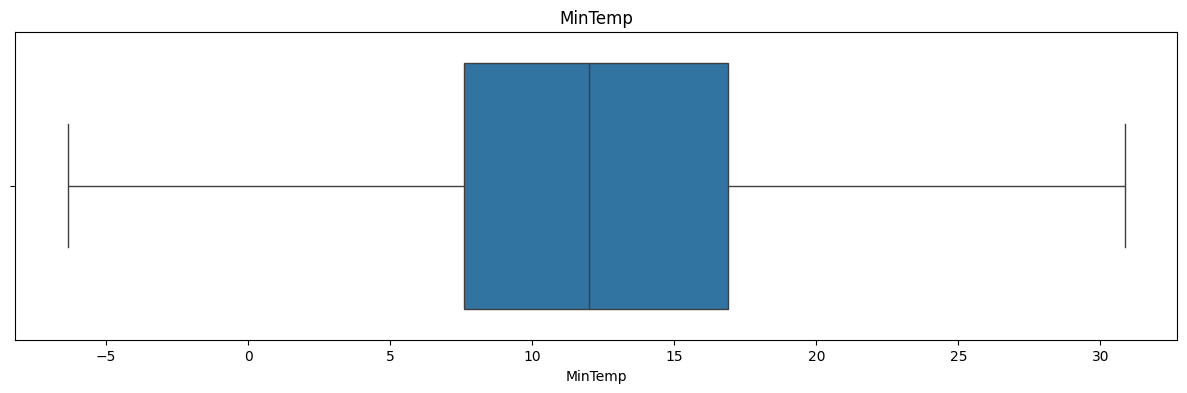

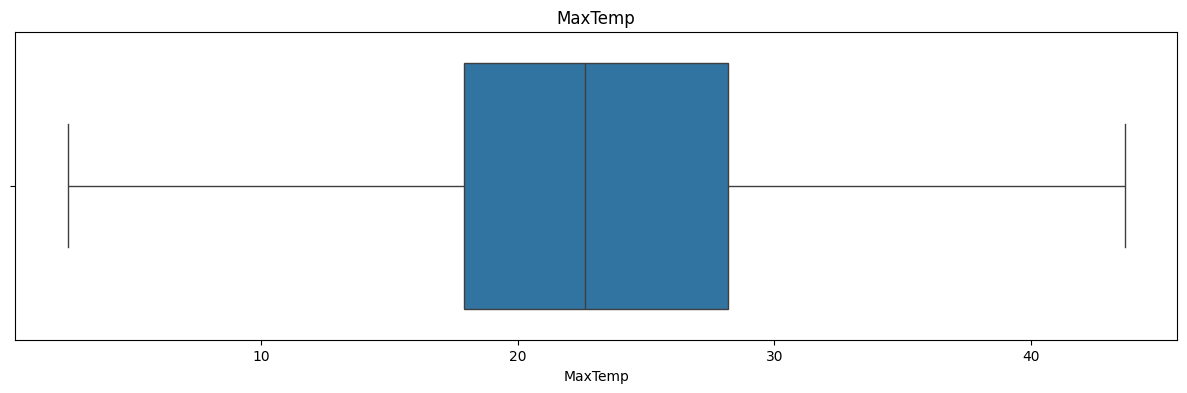

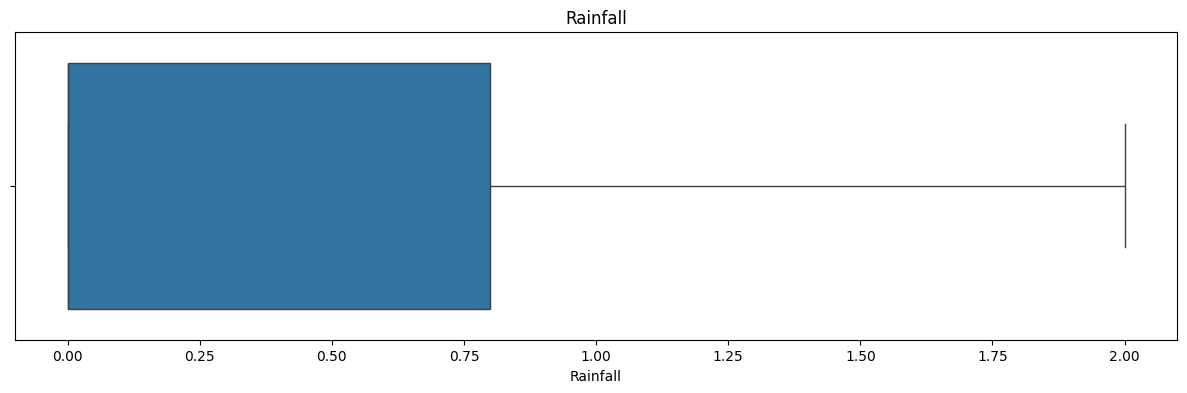

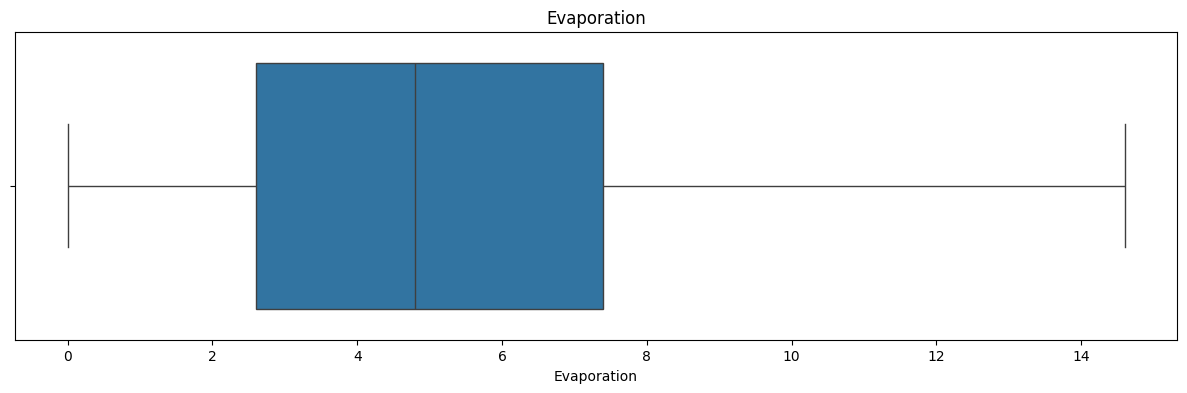

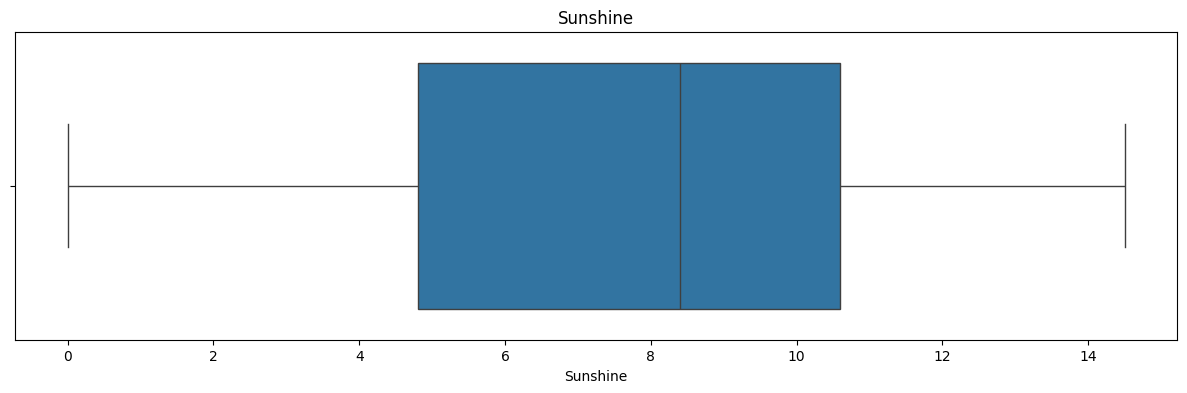

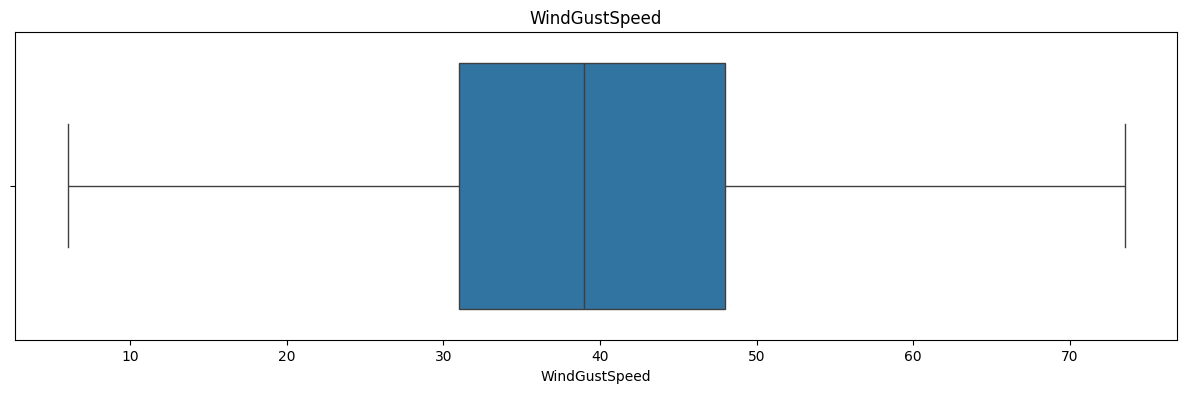

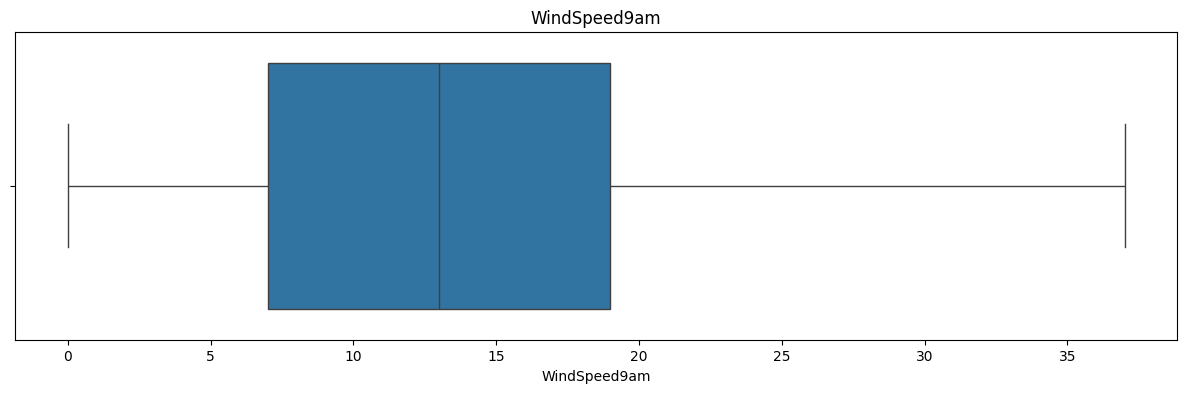

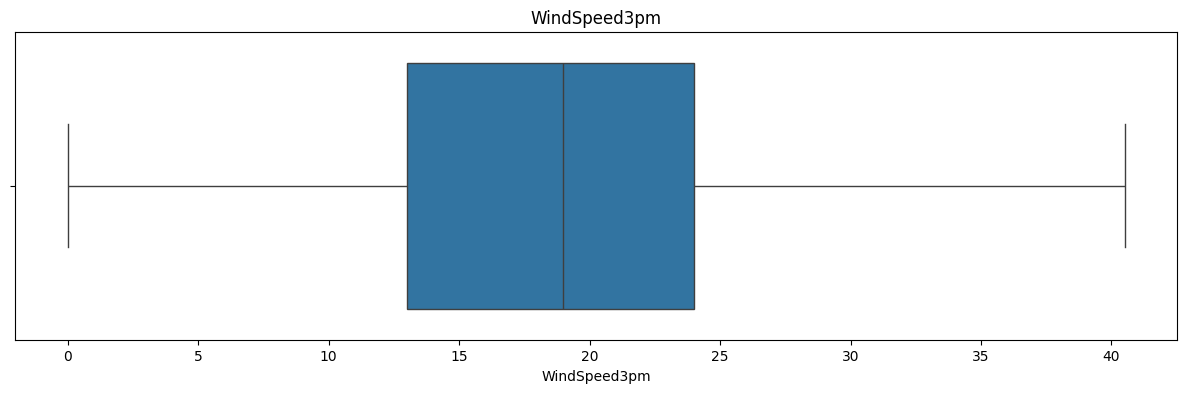

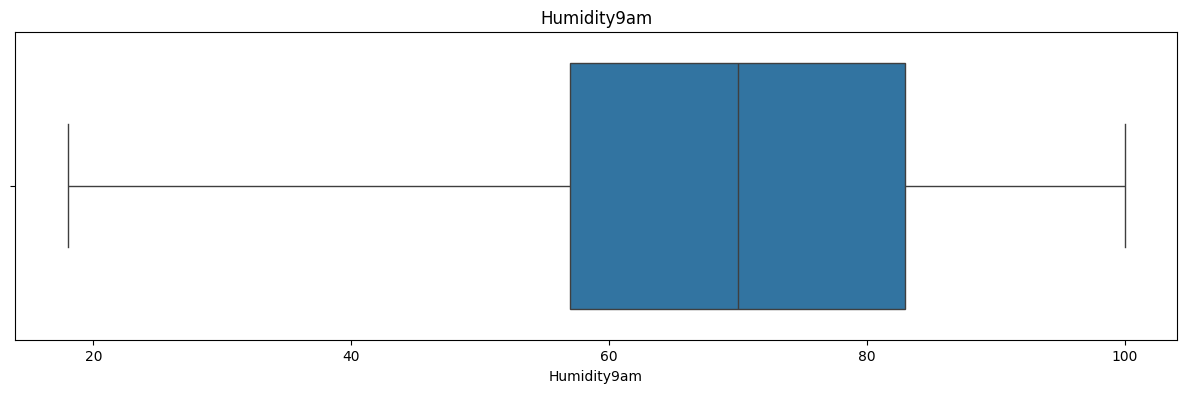

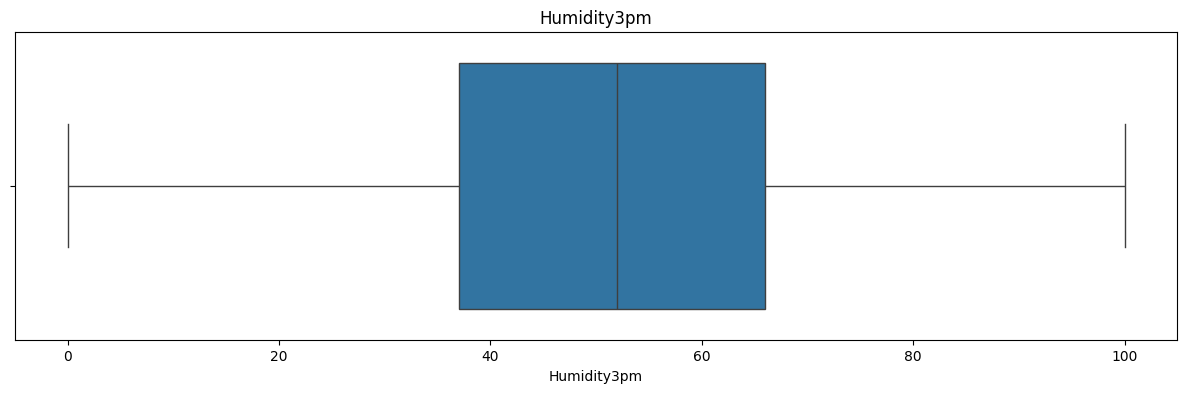

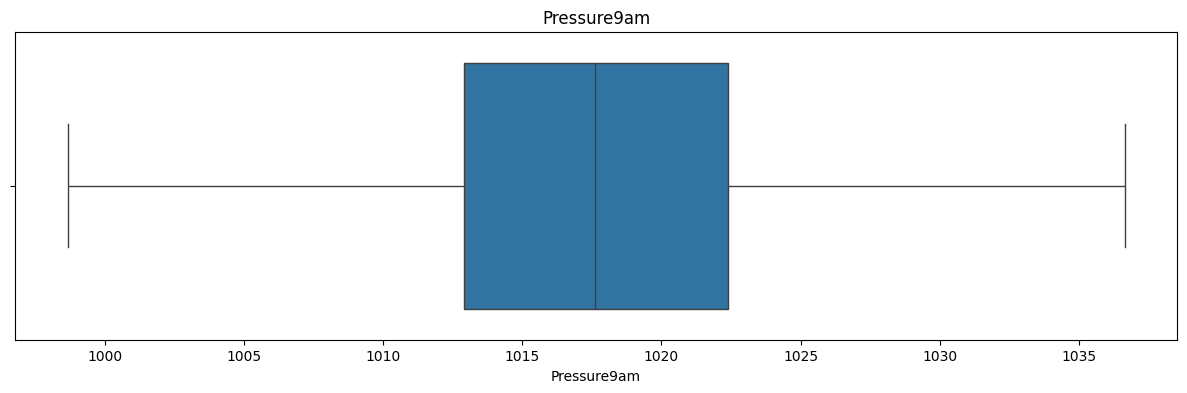

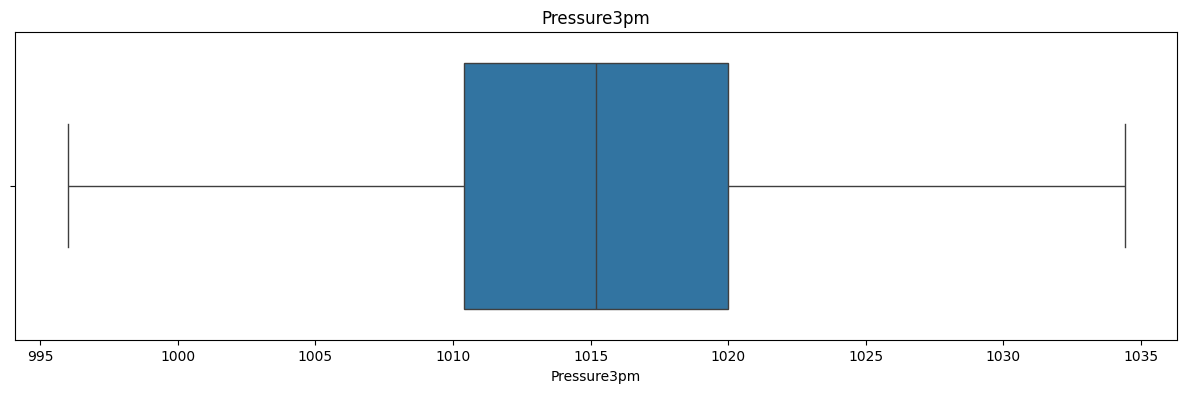

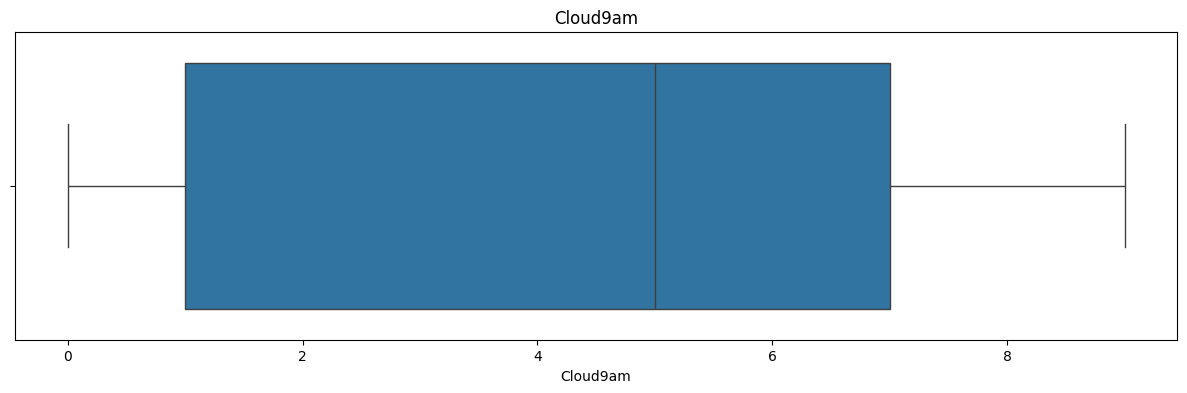

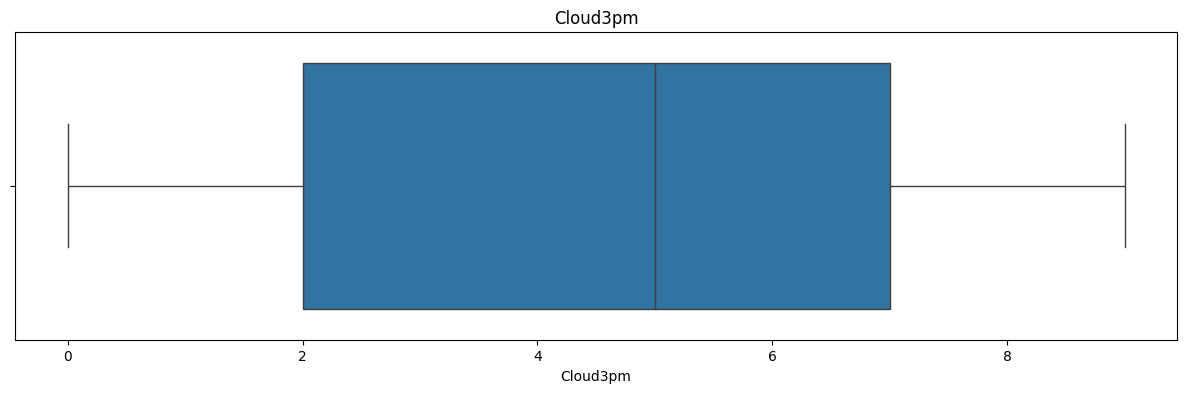

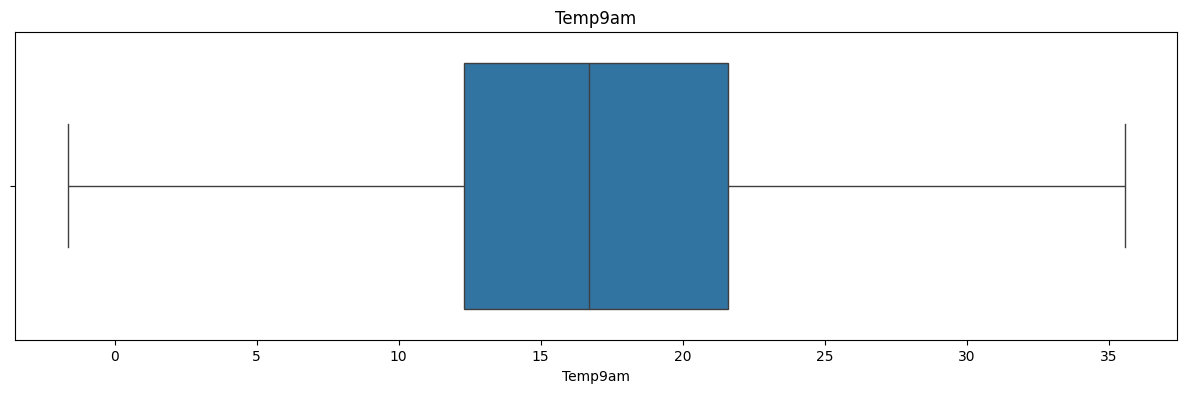

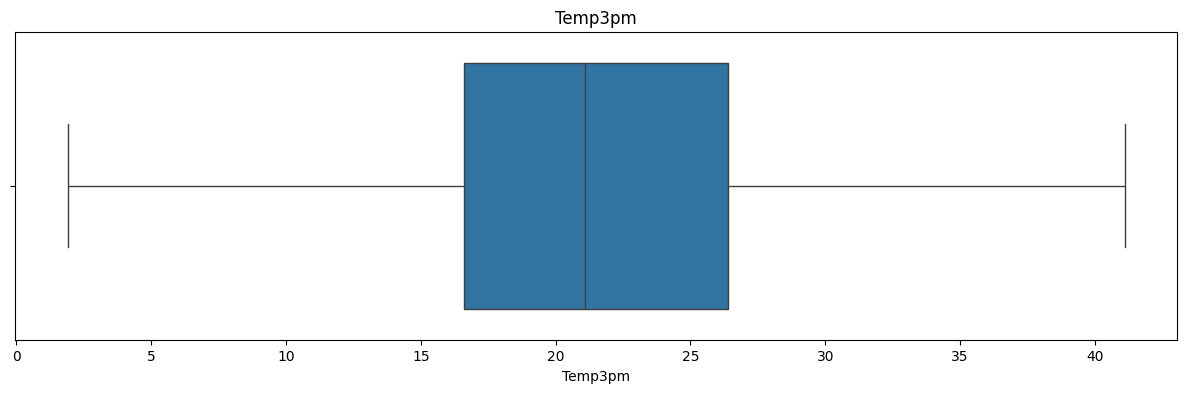

In [23]:
# Megecek kembali outlier menggunakan boxplot
for i in df[numerical_col]:
    plt.figure(figsize=(15,4))
    plt.title(i)
    ax = sns.boxplot(x=df[numerical_col][i])

## 5. Mengatasi Missing Value
----------------------------------------------------
- Numerik

    Berdasarkan observasi dari visualisasi di atas terdapat data skewed yang mungkin disebabkan karena banyaknya outlier. Oleh karena itu digunakan pengambilan keputusan dengan mengganti nilai yang missing value dengan median karena tahan terhadap outlier dibandingkan menggunakan mean. Terdapat beberapa feature yang missing value nya diisi dengan mean, karena pertimbangan distribusinya mendekati normal.

- Kategorik

    Untuk missing value pada feature kategorik akan diisi dengan modus
----------------------------------------------------

- Mengisi Kolom Numerik yang Kosong

In [24]:
dt_miss_num = pd.DataFrame({"Missing_Value":df[numerical_col].isna().sum(), "Percentase":df[numerical_col].apply(lambda x: f'{((x.isnull().sum()/df.shape[0])*100).round(2)} %')})
dt_miss_num

,Missing_Value,Percentase
MinTemp,1485,1.02 %
MaxTemp,1261,0.87 %
Rainfall,3261,2.24 %
Evaporation,62790,43.17 %
Sunshine,69835,48.01 %
WindGustSpeed,10263,7.06 %
WindSpeed9am,1767,1.21 %
WindSpeed3pm,3062,2.11 %
Humidity9am,2654,1.82 %
Humidity3pm,4507,3.1 %


Secara teoritis, jika 25 hingga 30% (nilai maksimum) data hilang, atau jika data missing value melebihi nilai tersebut, maka dibolehkan untuk menghilangkan variabel tersebut dari analisis.

Namun, pada kasus ini akan digunakan yang 30%, jadi akan dihapus kolom yang memiliki nilai missing value lebih dari 30%. Kolom yang terindikasi terdapat missing value lebih dari 30%, di antaranya yaitu:
- Sunshine = 48.01 %
- Evaporation = 43.17 %
- Cloud3pm = 40.81 %
- Cloud9am = 38.42 %

In [25]:
df.drop(columns=['Evaporation','Sunshine','Cloud9am','Cloud3pm'],inplace=True, axis=1)
df.shape

(145460, 21)

In [26]:
# Mengisi nilal missing value pada MinTemp and MaxTemp menggunakan nilai median
df['MinTemp']=df['MinTemp'].fillna(df['MinTemp'].mean())
df['MaxTemp']=df['MaxTemp'].fillna(df['MaxTemp'].mean())

# Mengisi nilal missing value pada Rainfall menggunakan nilai median
df['Rainfall']=df['Rainfall'].fillna(df['Rainfall'].median())

# Mengisi nilal missing value pada WindGustSpeed menggunakan nilai median
df['WindGustSpeed']=df['WindGustSpeed'].fillna(df['WindGustSpeed'].median())

# Mengisi nilal missing value pada WindSpeed9am and WindSpeed3pm menggunakan nilai median
df['WindSpeed9am']=df['WindSpeed9am'].fillna(df['WindSpeed9am'].median())
df['WindSpeed3pm']=df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].median())

# Mengisi nilal missing value pada Humidity9am and Humidity3pm menggunakan nilai median
df['Humidity9am']=df['Humidity9am'].fillna(df['Humidity9am'].median())
df['Humidity3pm']=df['Humidity3pm'].fillna(df['Humidity3pm'].median())

# Mengisi nilal missing value pada Pressure9am and Pressure3pm menggunakan nilai median
df['Pressure9am']=df['Pressure9am'].fillna(df['Pressure9am'].mean())
df['Pressure3pm']=df['Pressure3pm'].fillna(df['Pressure3pm'].mean())

# Mengisi nilal missing value pada Temp9am and Temp3pm menggunakan nilai median
df['Temp9am']=df['Temp3pm'].fillna(df['Temp9am'].mean())
df['Temp3pm']=df['Temp3pm'].fillna(df['Temp3pm'].mean())

In [27]:
numerical_col.remove('Evaporation')
numerical_col.remove('Sunshine')
numerical_col.remove('Cloud9am')
numerical_col.remove('Cloud3pm')

numerical_col

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [28]:
df[numerical_col].isnull().sum().any()

False

- Mengisi Kolom Kategorik yang Kosong

In [29]:
categorical_col.remove('Date')

# Mengecek kolom kategori dengan nilai yang kosong
df[categorical_col].isnull().sum()

Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

In [30]:
df[categorical_col].nunique()

Location        49
WindGustDir     16
WindDir9am      16
WindDir3pm      16
RainToday        2
RainTomorrow     2
dtype: int64

In [31]:
# Mengisi nilai pada missing value pada kolom kategori
df['WindGustDir'].fillna(df['WindGustDir'].mode()[0], inplace=True)
df['WindDir9am'].fillna(df['WindDir9am'].mode()[0], inplace=True)
df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0], inplace=True)
df['RainToday'].fillna(df['RainToday'].mode()[0], inplace=True)
df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0], inplace=True)

In [32]:
# Mengecek kembali kolom yang nilainya kosong
df[categorical_col].isnull().sum()

Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

In [33]:
# Mengecek missing value
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Year             0
Month            0
Day              0
dtype: int64

In [34]:
# Melihat apakah terdapat missing value
df.isnull().values.any()

False

Pada data frame sudah tidak terdapat missing value

## 6. Mengecek Duplicate Data


In [35]:
df.duplicated().sum()

0

Pada dataframe tidak terdapat duplicate data 

# __E. EXPLORATORY DATA ANALYSIS (EDA)__
----------------------------
    Exploratory Data Analysis (EDA) merupakan metode eksplorasi data dengan menggunakan teknik aritmatika sederhana dan teknik grafis dalam meringkas data pengamatan. Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

## 1. Melihat Describe Data

In [36]:
df.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,Year,Month,Day
count,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000
mean,12.194186,23.224781,0.476301,39.778681,13.939757,18.583126,68.953025,51.553396,1017.670297,1015.269781,21.569717,21.686191,2012.769751,6.399615,15.712258
std,6.365000,7.069787,0.787183,12.517354,8.555976,8.442404,18.704151,20.471345,6.651697,6.606721,6.861765,6.822800,2.537684,3.427262,8.794789
min,-6.350000,2.450000,0.000000,6.000000,0.000000,0.000000,18.000000,0.000000,998.650000,996.000000,1.900000,1.900000,2007.000000,1.000000,1.000000
25%,7.700000,18.000000,0.000000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.100000,16.700000,16.700000,2011.000000,3.000000,8.000000
50%,12.100000,22.700000,0.000000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.670297,1015.269781,20.900000,21.400000,2013.000000,6.000000,16.000000
75%,16.800000,28.200000,0.600000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,26.200000,26.200000,2015.000000,9.000000,23.000000
max,30.850000,43.650000,2.000000,73.500000,37.000000,40.500000,100.000000,100.000000,1036.650000,1034.400000,41.100000,41.100000,2017.000000,12.000000,31.000000


Diperoleh beberapa info seperti berikut:

- Rata-rata rainfall mencapai 2.31 mm, dengan temp minimun 12.19 dan maksimum sebesar 23.22, serta WindGustSpeed nya sekitar 39.96 .
- Rainfall terendah adalah 0 mm, dengan temp minimun -8.5 dan maksimum sebesar -4.8, serta WindGustSpeed nya sekitar 6.
- Rainfall tertinggi adalah 371 mm, dengan temp minimun 33.9 dan maksimum sebesar 48.1, serta WindGustSpeed nya sekitar 135.

In [37]:
df

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.900000,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,21.8,21.8,No,No,2008,12,1
1,Albury,7.4,25.100000,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,24.3,24.3,No,No,2008,12,2
2,Albury,12.9,25.700000,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,23.2,23.2,No,No,2008,12,3
3,Albury,9.2,28.000000,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,26.5,26.5,No,No,2008,12,4
4,Albury,17.5,32.300000,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,29.7,29.7,No,No,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,Uluru,2.8,23.400000,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,22.4,22.4,No,No,2017,6,21
145456,Uluru,3.6,25.300000,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,24.5,24.5,No,No,2017,6,22
145457,Uluru,5.4,26.900000,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,26.1,26.1,No,No,2017,6,23
145458,Uluru,7.8,27.000000,0.0,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,26.0,26.0,No,No,2017,6,24


In [38]:
df1 = df.copy()

**``a). Location``**

    a.1). Menggambarkan Minimal dan Maximal Temperature Berdasarkan Lokasi

            Location  MinTemp  MaxTemp
13            Darwin     23.0     33.0
8             Cairns     21.0     30.0
16         Katherine     20.0     35.0
39        Townsville     20.0     29.0
14         GoldCoast     17.0     26.0
27     NorfolkIsland     17.0     22.0
7           Brisbane     16.0     26.0
26         NorahHead     15.0     23.0
37            Sydney     15.0     23.0
38     SydneyAirport     15.0     23.0
47        Wollongong     15.0     21.0
41             Uluru     14.0     30.0
11      CoffsHarbour     14.0     24.0
24         Newcastle     14.0     24.0
3       AliceSprings     13.0     29.0
21             Moree     13.0     27.0
48           Woomera     13.0     27.0
10             Cobar     13.0     26.0
32      PerthAirport     13.0     26.0
30           Penrith     13.0     25.0
31             Perth     13.0     25.0
45       Williamtown     13.0     24.0
0           Adelaide     13.0     23.0
1             Albany     13.0     20.0
29        PearceRAAF     

Text(0.5, 1.0, 'Location Vs MinMaxTemperature')

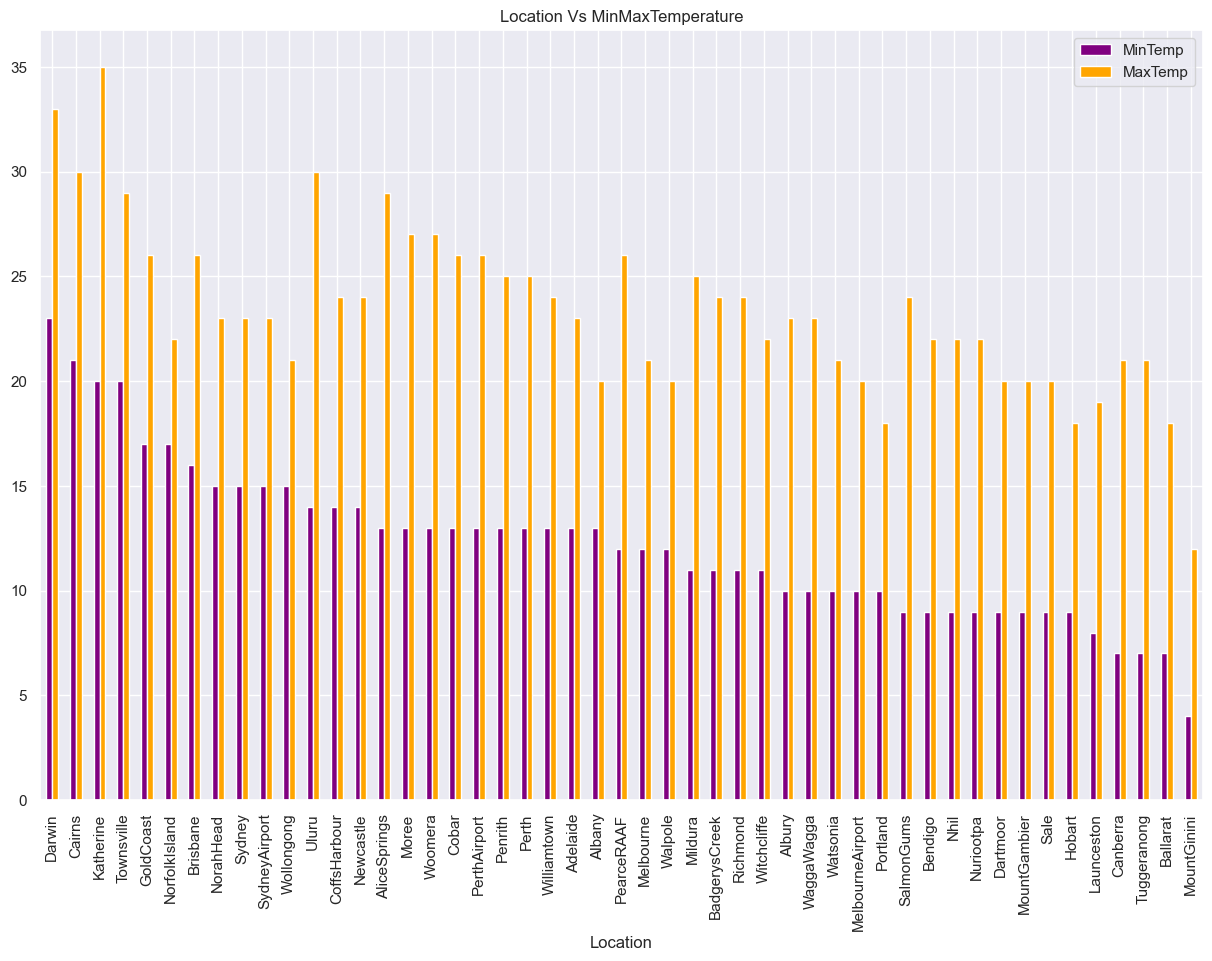

In [39]:
# Membuat grup untuk lokasi, min dan max temperatur
loc_temp = df1.groupby('Location')[['MinTemp', 'MaxTemp']].mean().round()
loc_temp = loc_temp.reset_index()
loc_temp.columns= ['Location', 'MinTemp', 'MaxTemp']
loc_temp.sort_values(ascending=False, by=['MinTemp', 'MaxTemp'], inplace=True)
print(loc_temp)

sns.set(rc={'figure.figsize':(15,10)})
loc_temp.plot(kind='bar', x='Location', color=['purple', 'orange'])
plt.title('Location Vs MinMaxTemperature')

- Lokasi dengan maxtemp cenderung tinggi berada di wilayah Katherine dengan rata-rata maxtemp sekitar 35 dan urutan kedua yaitu Darwin dengan rata-rata maxtemp sekitar 33. Sedangkan, lokasi dengan mintemp cenderung tinggi berada di wilayah Darwin dengan rata-rata maxtemp sekitar 23 dan urutan kedua yaitu Cairns dengan rata-rata mintemp sekitar 21.

- Lokasi dengan maxtemp cenderung rendah berada di wilayah MountGinini dengan rata-rata maxtemp sekitar 12 dan urutan kedua yaitu Ballarat, Hobart, Portland dengan rata-rata maxtemp sekitar 18. Sedangkan, lokasi dengan mintemp cenderung rendah berada di wilayah MountGinini dengan rata-rata maxtemp sekitar 4 dan urutan kedua yaitu Canberra, Tuggeranong dengan rata-rata mintemp sekitar 7.

    a.2). Menggambarkan Humidity Berdasarkan Lokasi

            Location  Humidity9am  Humidity3pm
12          Dartmoor         84.0         62.0
5           Ballarat         82.0         59.0
33          Portland         79.0         66.0
17        Launceston         79.0         57.0
35              Sale         79.0         56.0
44          Watsonia         78.0         55.0
4      BadgerysCreek         77.0         51.0
34          Richmond         77.0         49.0
23       MountGinini         76.0         68.0
43           Walpole         76.0         66.0
30           Penrith         76.0         49.0
26         NorahHead         75.0         67.0
1             Albany         75.0         64.0
22      MountGambier         75.0         57.0
24         Newcastle         74.0         56.0
2             Albury         74.0         48.0
40       Tuggeranong         73.0         47.0
9           Canberra         73.0         46.0
25              Nhil         73.0         45.0
45       Williamtown         72.0         54.0
27     Norfol

Text(0.5, 1.0, 'Location Vs Humidity')

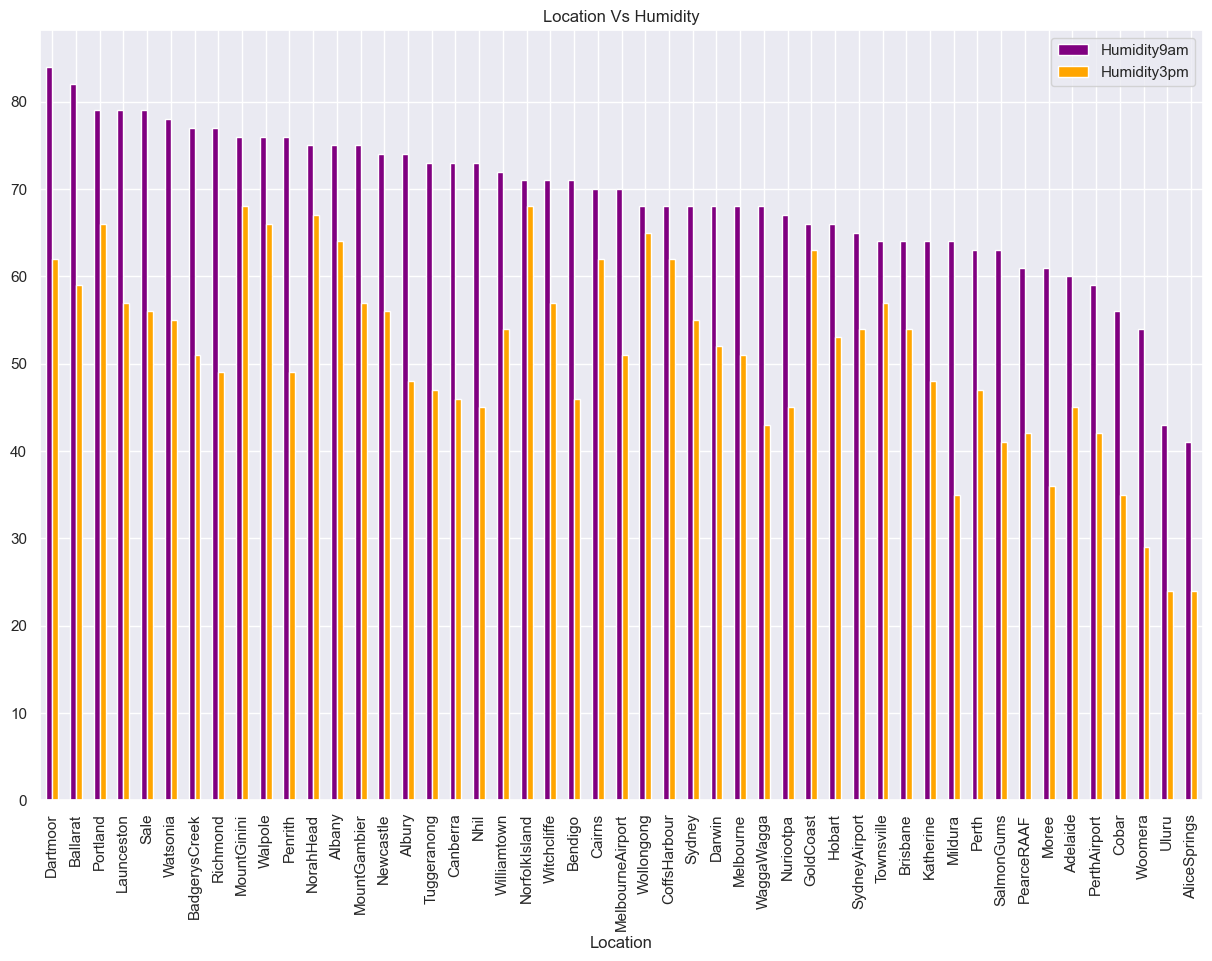

In [40]:
# Membuat grup untuk lokasi, humidity 9 am dan humidity 3 pm
loc_humidity = df1.groupby("Location")[["Humidity9am", "Humidity3pm"]].mean().round()
loc_humidity = loc_humidity.reset_index()
loc_humidity.columns= ["Location","Humidity9am", "Humidity3pm"]
loc_humidity.sort_values(ascending=False, by=['Humidity9am', 'Humidity3pm'], inplace=True)
print(loc_humidity)

sns.set(rc={'figure.figsize':(15,10)})
loc_humidity.plot(kind='bar', x='Location', color=['purple', 'orange'])
plt.title('Location Vs Humidity')

- Lokasi dengan tingkat kelembapan cenderung tinggi berada di wilayah Dartmoor.

- Lokasi dengan tingkat kelembapan cenderung rendah berada di wilayah AliceSprings.

    a.3). Menggambarkan Pressure Berdasarkan Lokasi

            Location  Pressure9am  Pressure3pm
0           Adelaide       1019.0       1017.0
28         Nuriootpa       1019.0       1017.0
9           Canberra       1019.0       1016.0
20           Mildura       1019.0       1016.0
25              Nhil       1019.0       1016.0
34          Richmond       1019.0       1016.0
40       Tuggeranong       1019.0       1016.0
42        WaggaWagga       1019.0       1016.0
48           Woomera       1019.0       1016.0
1             Albany       1018.0       1017.0
33          Portland       1018.0       1017.0
46       Witchcliffe       1018.0       1017.0
2             Albury       1018.0       1016.0
4      BadgerysCreek       1018.0       1016.0
5           Ballarat       1018.0       1016.0
6            Bendigo       1018.0       1016.0
11      CoffsHarbour       1018.0       1016.0
12          Dartmoor       1018.0       1016.0
18         Melbourne       1018.0       1016.0
19  MelbourneAirport       1018.0       1016.0
22      Mount

Text(0.5, 1.0, 'Location Vs Pressure')

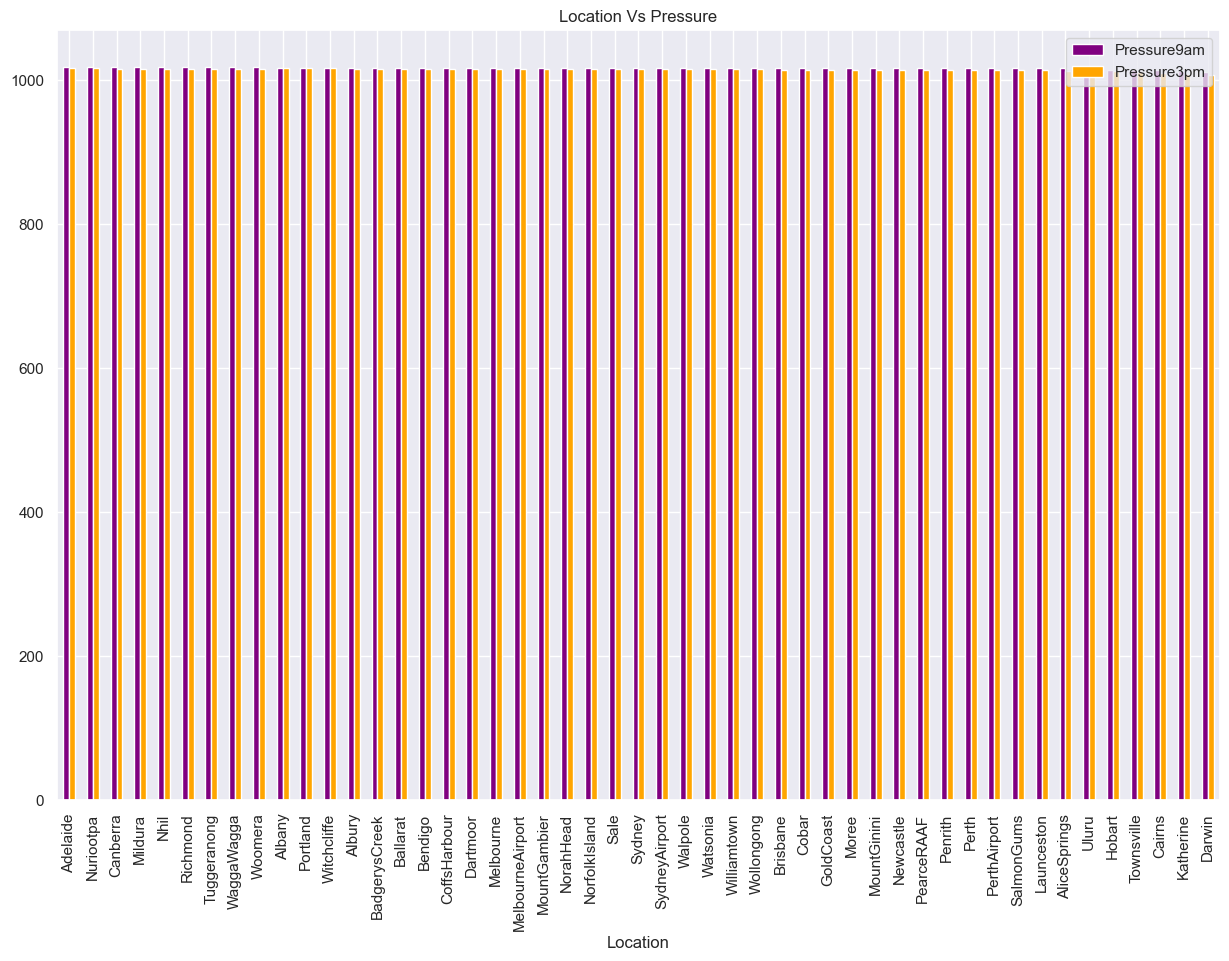

In [41]:
# Membuat grup untuk lokasi, pressure 9 am dan pressure 3 pm
loc_press = df1.groupby('Location')[['Pressure9am', 'Pressure3pm']].mean().round()
loc_press = loc_press.reset_index()
loc_press.columns= ['Location','Pressure9am', 'Pressure3pm']
loc_press.sort_values(ascending=False, by=['Pressure9am', 'Pressure3pm'], inplace=True)
print(loc_press)

sns.set(rc={'figure.figsize':(15,10)})
loc_press.plot(kind='bar', x='Location', color=['purple', 'orange'])
plt.title('Location Vs Pressure')

Pada diagram di atas menunjukkan bahwa rata-rata nilai tekanan udara yang ada di Australia cenderung stabil pada keseluruhan wilayahnya.

    a.4). Menggambarkan Temperature Berdasarkan Lokasi

            Location  Temp9am  Temp3pm
13            Darwin     31.0     31.0
41             Uluru     29.0     29.0
3       AliceSprings     28.0     28.0
8             Cairns     28.0     28.0
39        Townsville     28.0     28.0
16         Katherine     26.0     28.0
21             Moree     26.0     26.0
7           Brisbane     25.0     25.0
10             Cobar     25.0     25.0
48           Woomera     25.0     25.0
14         GoldCoast     24.0     24.0
29        PearceRAAF     24.0     24.0
32      PerthAirport     24.0     24.0
20           Mildura     23.0     23.0
30           Penrith     23.0     23.0
31             Perth     23.0     23.0
34          Richmond     23.0     23.0
36        SalmonGums     23.0     23.0
4      BadgerysCreek     22.0     23.0
0           Adelaide     22.0     22.0
11      CoffsHarbour     22.0     22.0
37            Sydney     22.0     22.0
38     SydneyAirport     22.0     22.0
42        WaggaWagga     22.0     22.0
45       Williamtown     

Text(0.5, 1.0, 'Location Vs Temperature')

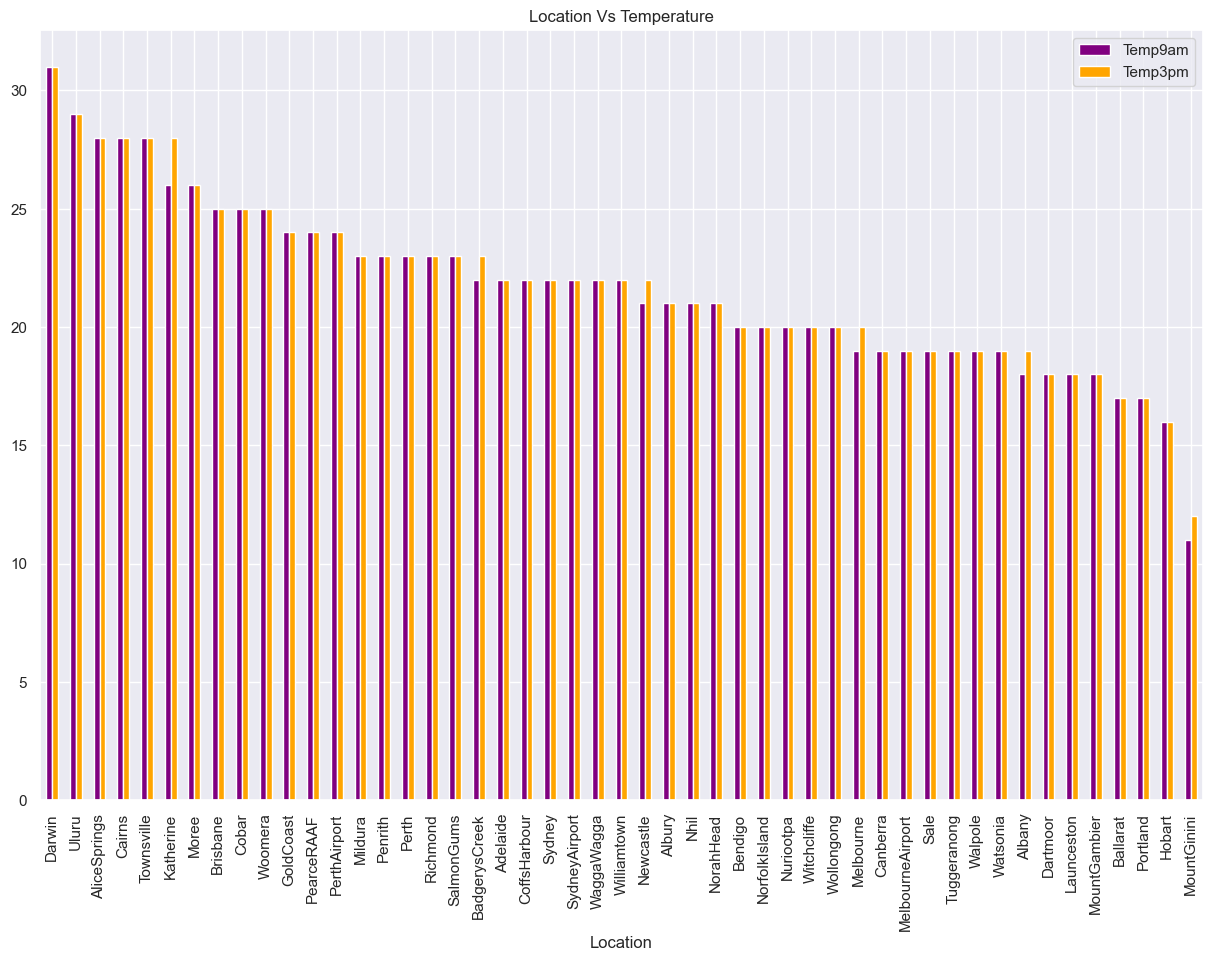

In [42]:
# Membuat grup untuk lokasi, temperature 9 am dan temperature 3 pm
loc_temp2 = df1.groupby('Location')[['Temp9am', 'Temp3pm']].mean().round()
loc_temp2 = loc_temp2.reset_index()
loc_temp2.columns= ['Location','Temp9am', 'Temp3pm']
loc_temp2.sort_values(ascending=False, by=['Temp9am', 'Temp3pm'], inplace=True)
print(loc_temp2)

sns.set(rc={'figure.figsize':(15,10)})
loc_temp2.plot(kind='bar', x='Location', color=['purple', 'orange'])
plt.title('Location Vs Temperature')

- Lokasi dengan temperature cenderung tinggi berada di wilayah Darwin dengan rata-rata maxtemp sekitar 31 dan mintemp sekitar 31.

- Lokasi dengan temperature cenderung rendah berada di wilayah MountGinini dengan rata-rata maxtemp sekitar 31 dan mintemp sekitar 11.

**`b). Menggambarkan Curah Hujan (Rainfall) Setiap Bulan`**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12')])

<Figure size 1000x800 with 0 Axes>

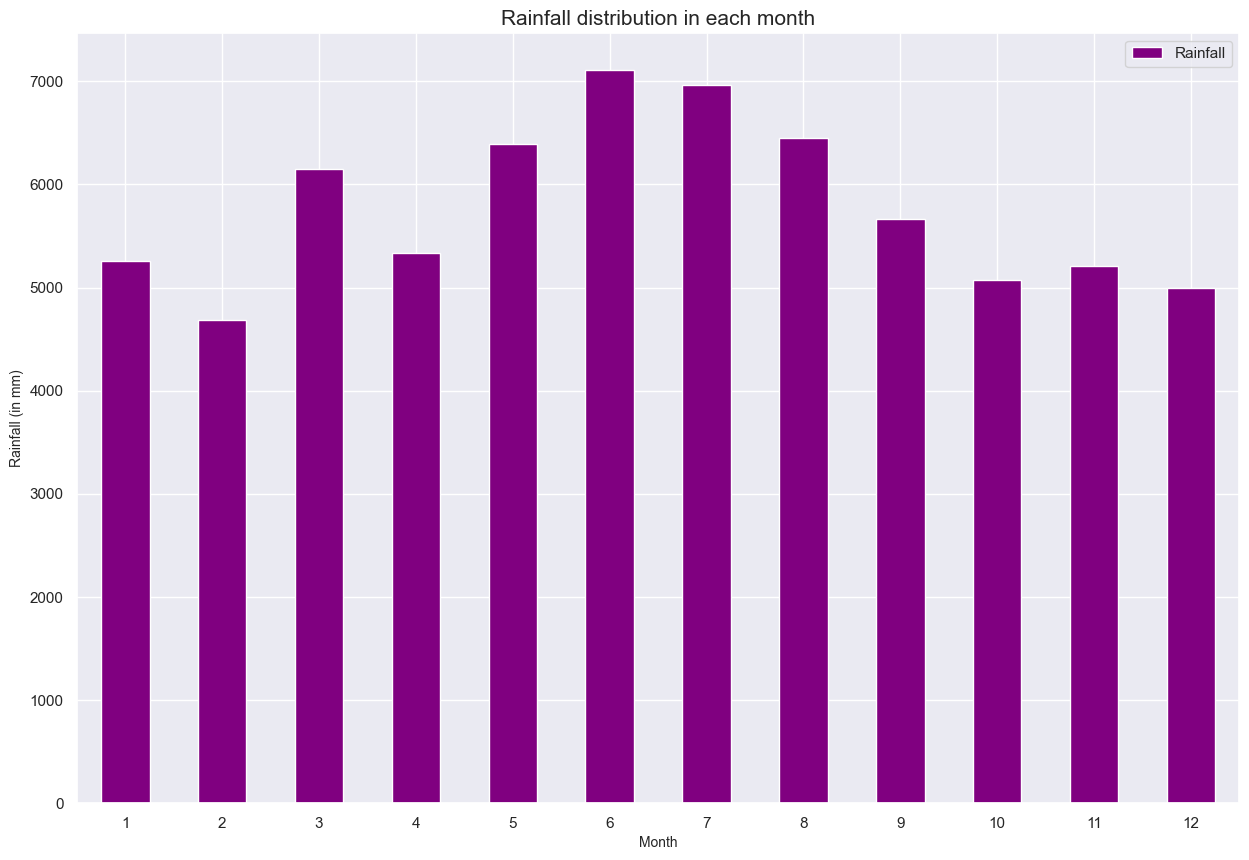

In [43]:
# Membuat grup untuk tahun, bulan dan curah hujan
rainfall =[df1['Year'], df1['Month'], df1['Rainfall']]
headers = ['Year','Month', 'Rainfall']
df1_rainfall = pd.concat(rainfall, axis=1, keys=headers)

plt.figure(figsize=(10,8))
a = df1_rainfall.groupby('Month').agg({'Rainfall':'sum'})
a.plot(kind='bar', color='purple')

# Membuat judul
plt.title('Rainfall distribution in each month', fontsize=15)
plt.xlabel('Month', fontsize=10)
plt.ylabel('Rainfall (in mm)', fontsize=10)
plt.xticks(rotation=0)

Pada grafik di atas menunjukkan bahwa curah hujan tertinggi ada pada bulan ke-1 dan curah hujan terendah pada bulan ke-10.

**``c). Menggambarkan Rain Today``**

RainToday
No     78.083322
Yes    21.916678
Name: proportion, dtype: float64

<Axes: ylabel='proportion'>

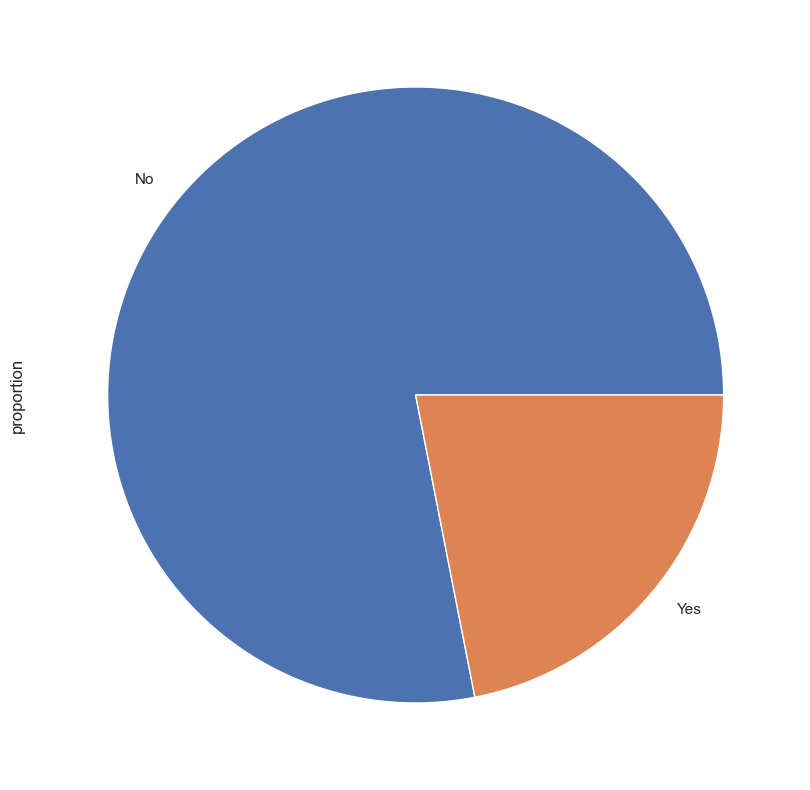

In [44]:
display(df1.RainToday.value_counts(normalize = True)*100)
df1.RainToday.value_counts(normalize = True).plot(kind = 'pie')

Berdasarkan record data set ternyata persentase tidak hujan lebih besar dari pada hujan. Persentase tidak hujan sebesar 78.08, sedangkan persentase hujan sebesar 21.92.

    c.1). Rain Today Vs Year

Jumlah Hujan Tertinggi yaitu di Tahun 2007


RainToday
No     42
Yes    19
Name: count, dtype: int64

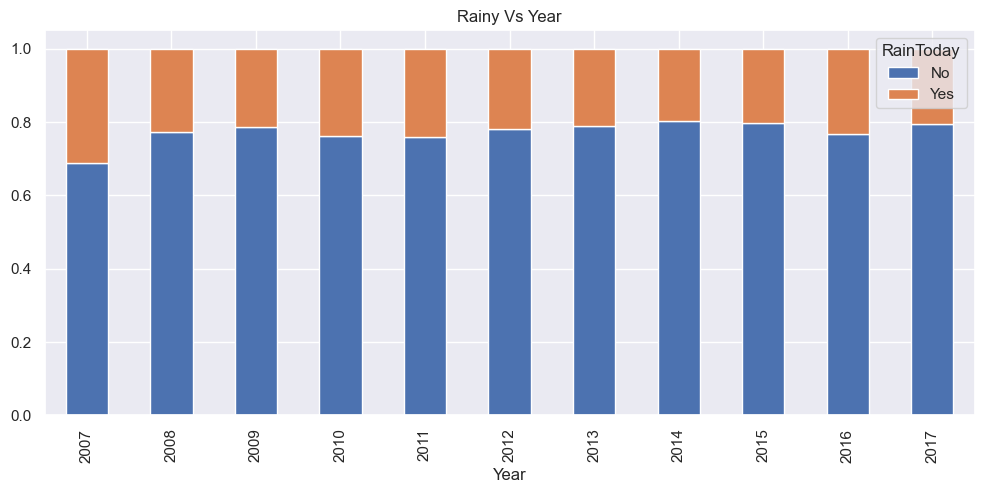

In [45]:
sns.set(rc={'figure.figsize':(12,5)})
pd.crosstab(df1.Year, df1.RainToday, normalize = 'index').plot(kind='bar', stacked = True)
plt.title('Rainy Vs Year')

print('Jumlah Hujan Tertinggi yaitu di Tahun 2007')
display((df1[df1['Year'] == 2007]).RainToday.value_counts())

In [46]:
# Menganalisis kolom RainToday dan Year
pd.crosstab(df1.RainToday, df1.Year)

Year,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
RainToday,,,,,,,,,,,
No,42,1755,13194,12773,11672,12015,12950,14331,14234,13754,6860
Yes,19,515,3595,4009,3735,3394,3465,3554,3651,4180,1763


    c.2). Rain Today Vs Month

<Axes: xlabel='Month'>

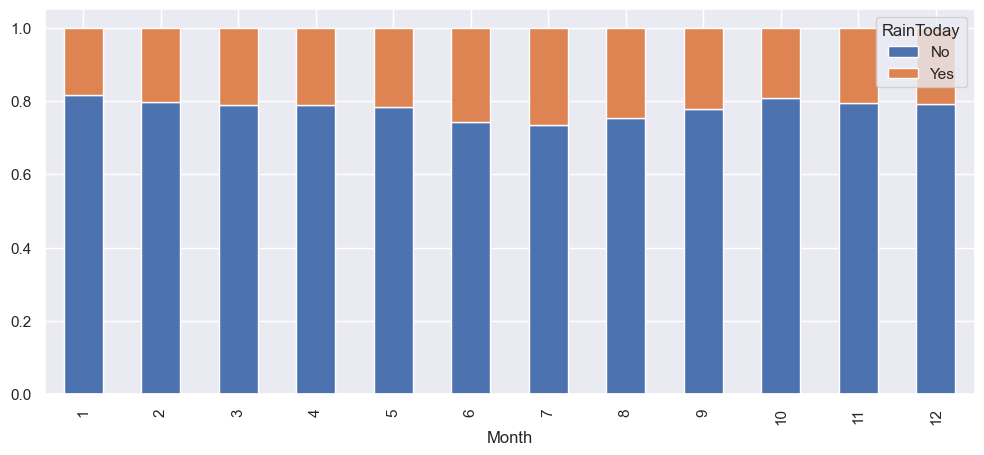

In [47]:
sns.set(rc={'figure.figsize':(12,5)})
pd.crosstab(df1.Month, df1.RainToday, normalize = 'index').plot(kind='bar', stacked = True)

In [48]:
# Menganalisis kolom RainToday dan Month
pd.crosstab(df1.RainToday, df1.Month)

Month,1,2,3,4,5,6,7,8,9,10,11,12
RainToday,,,,,,,,,,,,
No,10789,8617,10530,9099,10452,9417,8836,9050,9040,9707,9254,8789
Yes,2447,2176,2831,2451,2901,3267,3189,2978,2600,2321,2415,2304


    c.3). Rain Today Vs Day

<Axes: xlabel='Day'>

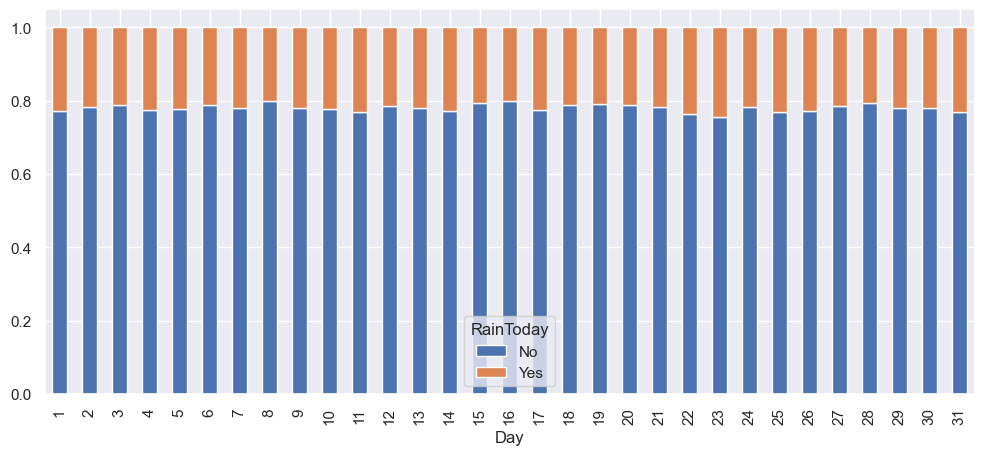

In [49]:
sns.set(rc={'figure.figsize':(12,5)})
pd.crosstab(df1.Day, df1.RainToday, normalize = 'index').plot(kind='bar', stacked = True)

In [50]:
# Menganalisis kolom RainToday dan Day
pd.crosstab(df1.RainToday, df1.Day)

Day,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
RainToday,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
No,3699,3753,3776,3707,3718,3778,3740,3827,3739,3718,3677,3757,3735,3693,3804,3825,3712,3768,3781,3771,3743,3662,3612,3742,3680,3662,3720,3765,3466,3392,2158
Yes,1087,1033,1010,1079,1068,1008,1046,959,1047,1068,1109,1029,1051,1093,982,961,1074,1018,1005,1015,1043,1124,1174,1043,1104,1074,1015,970,983,959,649


- Kesimpulan Rain Today (1)

    Berdasarkan data RainToday, ternyata sepanjang tahun 2007 sampai dengan 2017 dominan tidak terjadi hujan. Positif terjadi hujan hanya sebanyak 21.92%, dengan positif hujan terbanyak yaitu pada tahun 2007.

RainToday
No     19
Yes    12
Name: count, dtype: int64

Text(0.5, 1.0, 'Rainy Vs Year')

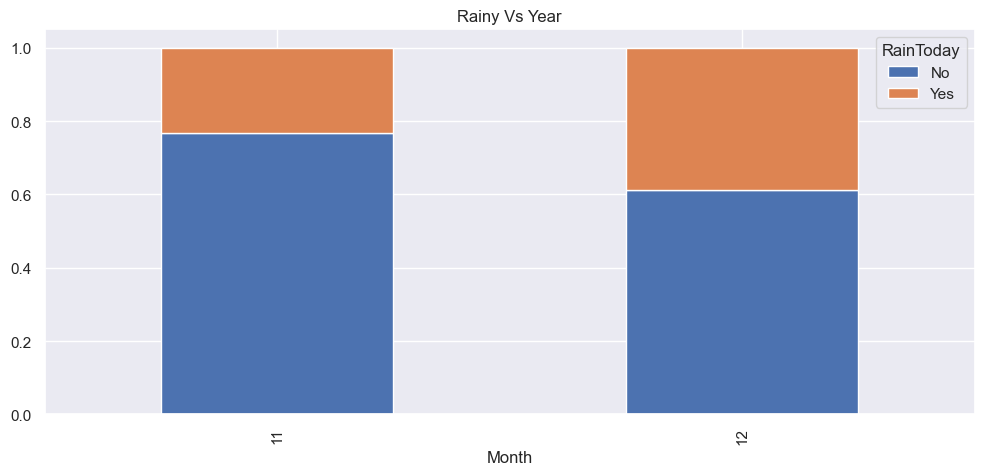

In [51]:
y2007 = df1[df1['Year'] == 2007]

display((y2007[y2007['Month'] == 12]).RainToday.value_counts())

sns.set(rc={'figure.figsize':(12,5)})
pd.crosstab(y2007.Month, df1.RainToday, normalize = 'index').plot(kind='bar', stacked = True)
plt.title('Rainy Vs Year')

- Kesimpulan Rain Today (2)

    Pada tahun 2007, positif hujan tertinggi yaitu pada bulan Desember sebanyak 12 kali

    c.4). Rain Today Vs Location

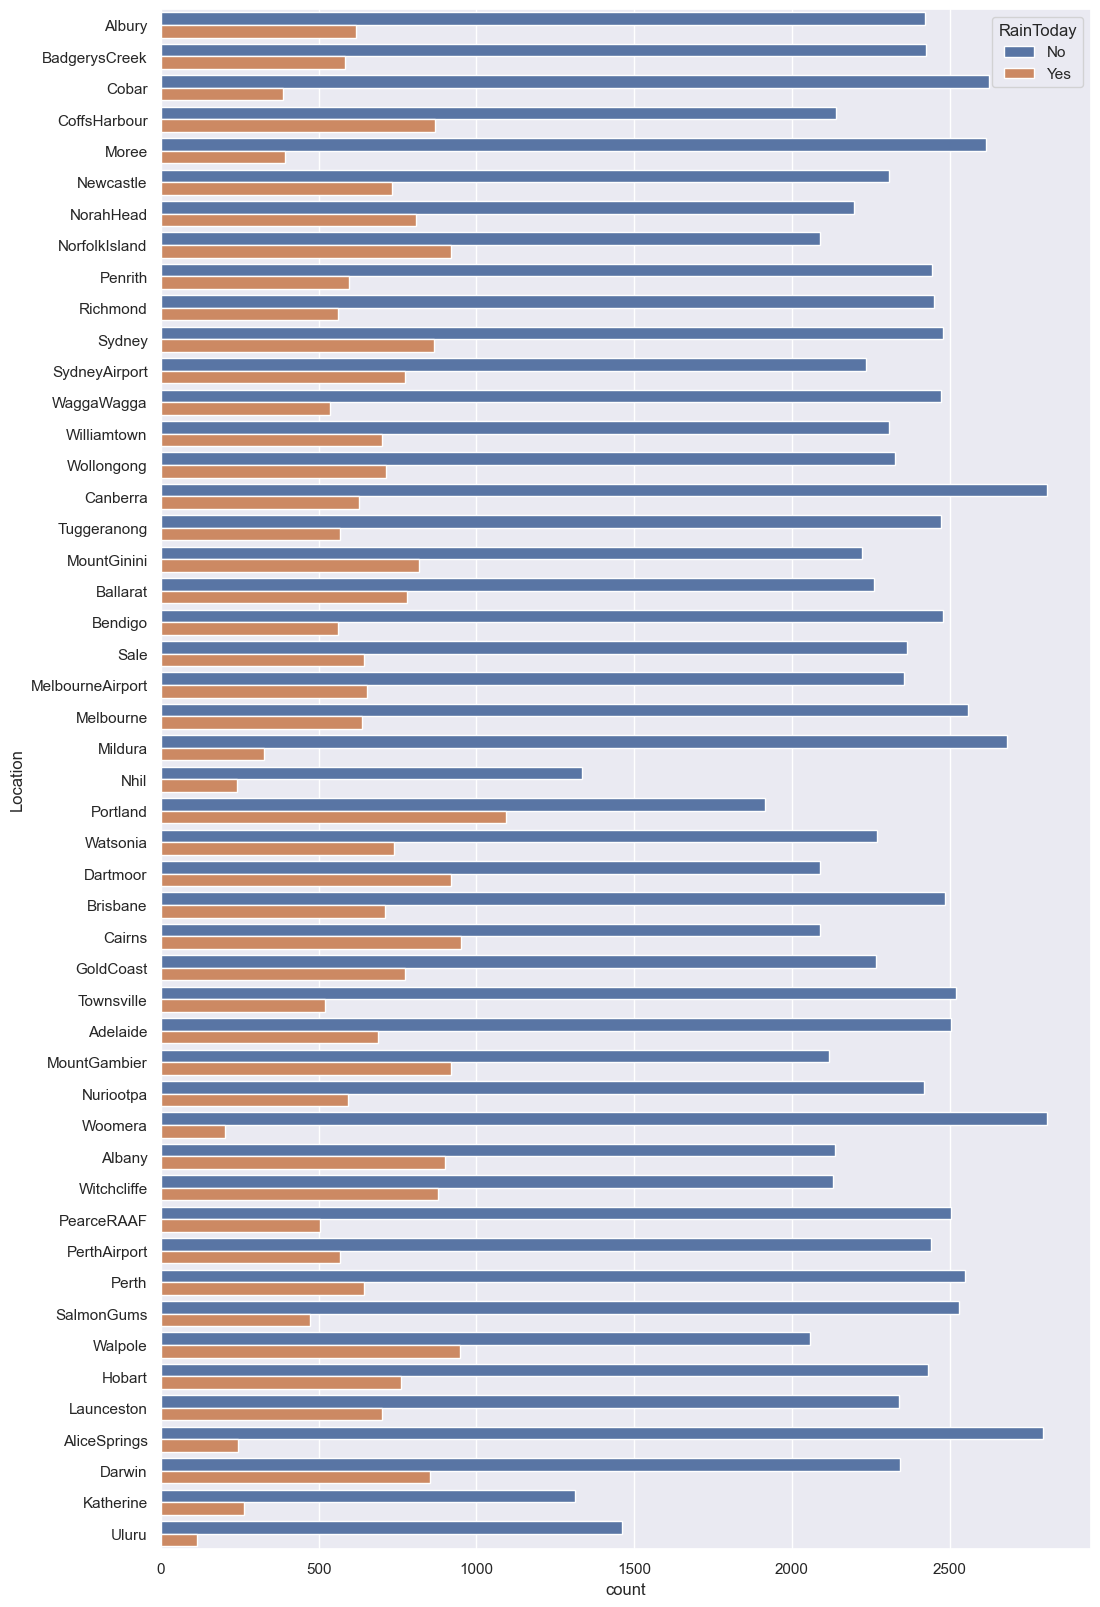

In [52]:
sns.set(rc={'figure.figsize':(12,20)})
sns.countplot(y = 'Location', hue='RainToday', data = df1)
plt.show()

<Axes: xlabel='Location'>

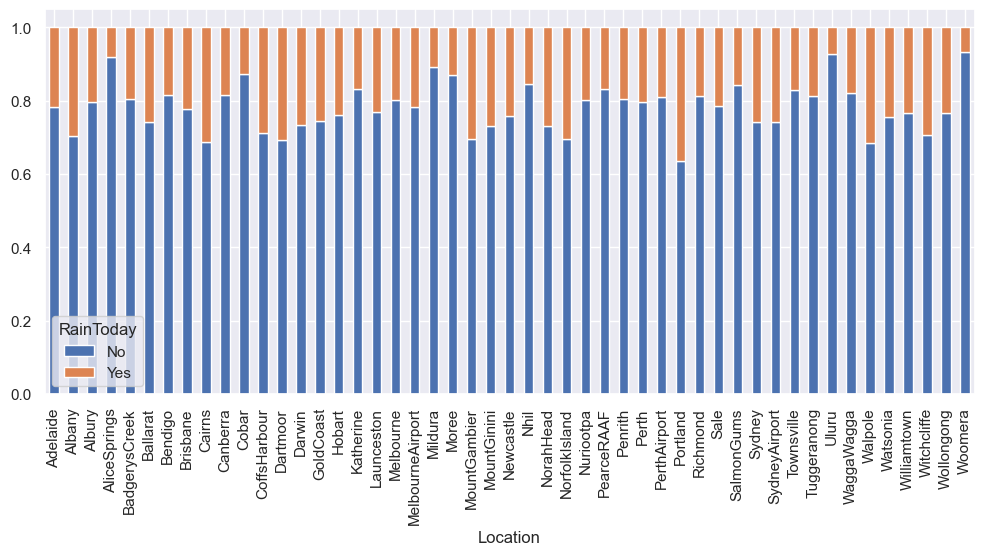

In [53]:
sns.set(rc={'figure.figsize':(12,5)})
pd.crosstab(df1.Location, df1.RainToday, normalize = 'index').plot(kind='bar', stacked = True)

In [54]:
# Menganalisis kolom RainToday dan Location
pd.crosstab(df1.RainToday, df1.Location)

Location,Adelaide,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,CoffsHarbour,Dartmoor,Darwin,GoldCoast,Hobart,Katherine,Launceston,Melbourne,MelbourneAirport,Mildura,Moree,MountGambier,MountGinini,Newcastle,Nhil,NorahHead,NorfolkIsland,Nuriootpa,PearceRAAF,Penrith,Perth,PerthAirport,Portland,Richmond,Sale,SalmonGums,Sydney,SydneyAirport,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
RainToday,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
No,2504,2138,2423,2796,2426,2259,2478,2484,2090,2807,2623,2140,2088,2341,2265,2431,1313,2340,2557,2356,2682,2615,2119,2221,2308,1336,2196,2090,2417,2504,2444,2548,2442,1915,2449,2366,2529,2478,2235,2520,2471,1462,2473,2057,2271,2309,2130,2327,2807
Yes,689,902,617,244,583,781,562,709,950,629,386,869,921,852,775,762,265,700,636,653,327,394,921,819,731,242,808,919,592,505,595,645,567,1094,560,643,472,866,774,520,568,116,536,949,738,700,879,713,202


- Kesimpulan Rain Today (3)

    Berdasarkan data RainToday Vs Location, ternyata lokasi positif terjadi hujan tertinggi yaitu berada di Portland dengan jumlah hujan sebesar 1094.

    c.5). Rain Today Vs WindGustDir

In [55]:
# Menganalisis kolom RainToday dan WindGustDir
pd.crosstab(df1.RainToday, df1.WindGustDir)

WindGustDir,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
RainToday,,,,,,,,,,,,,,,,
No,7860,6912,6099,7900,6197,5649,5348,6276,6721,7524,7143,6262,6457,14758,6052,6422
Yes,1321,1192,1273,1413,936,899,1272,1846,2447,1894,2073,2474,2510,5483,2200,2647


[None, None, None, None]

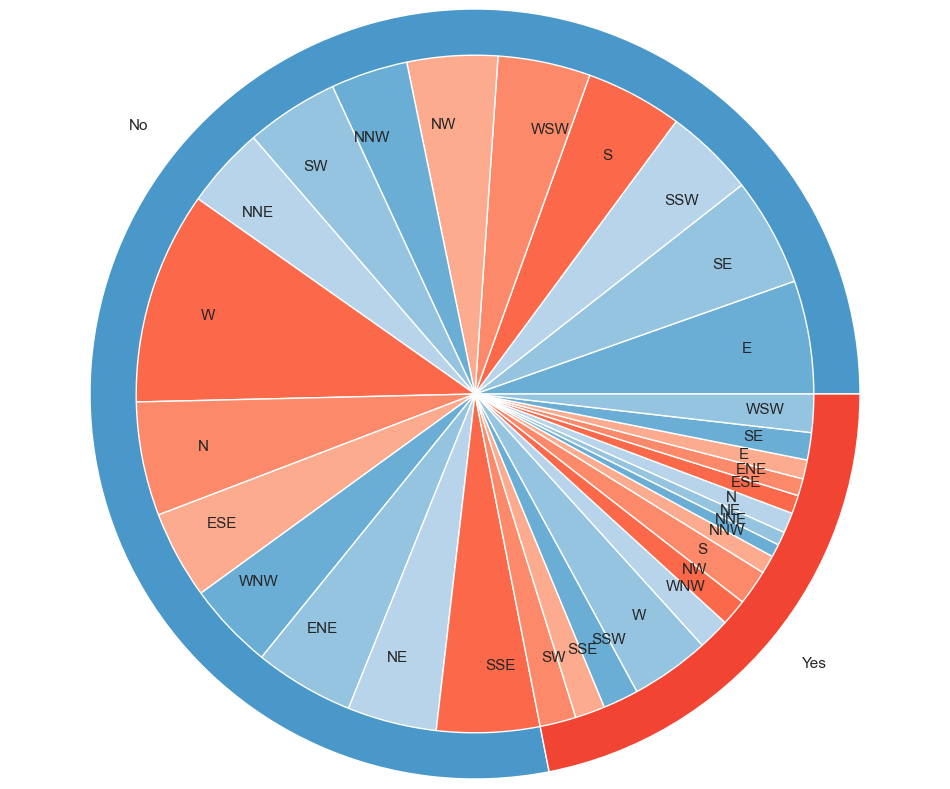

In [56]:
by_WindGustDir = df1.groupby('WindGustDir').RainToday.value_counts().to_frame().reset_index().sort_values('RainToday')

group_names = df1.RainToday.value_counts().index
group_size = df1.RainToday.value_counts()
subgroup_name = by_WindGustDir['WindGustDir']
subgroup_size = by_WindGustDir['count']

a, b, c = [plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]

fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius = 2.5, labels = group_names, colors = [a(0.6), b(0.6)])
plt.setp(mypie, width = 0.3, edgecolor = 'white')

mypie2, _ = ax.pie(subgroup_size, radius = 2.5 - 0.3, labels = subgroup_name, labeldistance = 0.8, colors = [a(0.5), a(0.4), a(0.3), b(0.5), b(0.4), b(0.3)])
plt.setp(mypie, width = 0.4, edgecolor = 'white')

**``d). Menggambarkan Rain Tomorrow``**

RainTomorrow
No     78.085384
Yes    21.914616
Name: proportion, dtype: float64

<Axes: ylabel='proportion'>

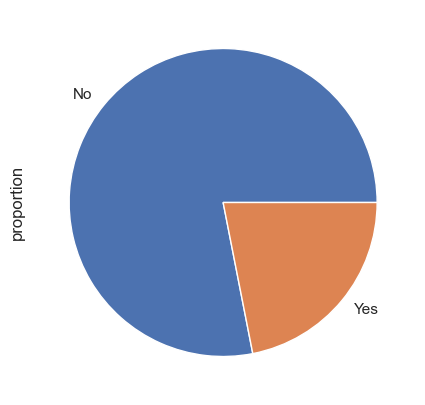

In [57]:
display(df1.RainTomorrow.value_counts(normalize = True)*100)
df1.RainTomorrow.value_counts(normalize = True).plot(kind = 'pie')

Berdasarkan record data set pada kolom prediksi hujan besok ternyata persentase tidak hujan lebih besar dari pada hujan. Persentase tidak hujan sebesar 78.08%, sedangkan persentase hujan sebesar 21.92%.

    d.1). Rain Tomorrow Vs Year

In [58]:
# Menganalisis kolom RainTomorrow dan Year
pd.crosstab(df1.RainTomorrow, df1.Year)

Year,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
RainTomorrow,,,,,,,,,,,
No,42,1759,13182,12785,11669,12020,12950,14328,14237,13751,6860
Yes,19,511,3607,3997,3738,3389,3465,3557,3648,4183,1763


    Year  RainTomorrow
9   2016          4183
3   2010          3997
4   2011          3738
8   2015          3648
2   2009          3607
7   2014          3557
6   2013          3465
5   2012          3389
10  2017          1763
1   2008           511
0   2007            19


<Axes: xlabel='Year'>

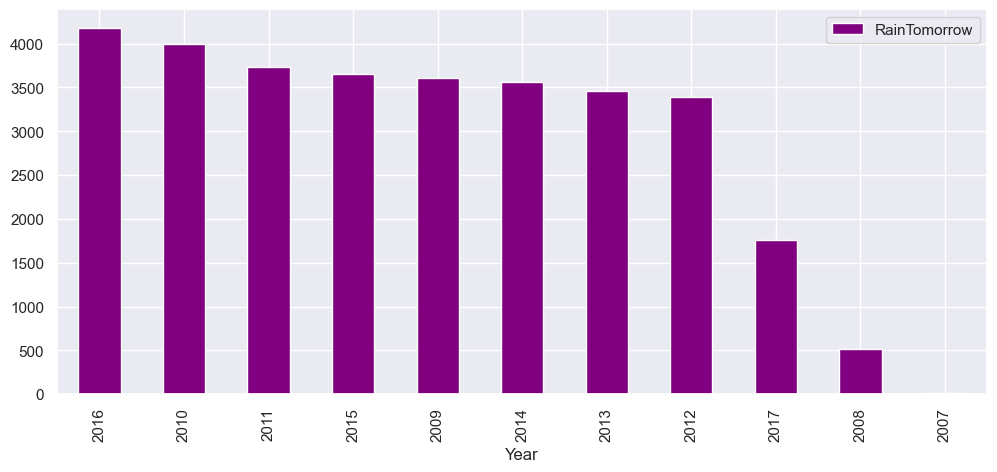

In [59]:
rt = (df1[df1['RainTomorrow'] == 'Yes']).groupby('Year')[['RainTomorrow']].count()
rt = rt.reset_index()
rt.columns= ['Year', 'RainTomorrow']
rt.sort_values(ascending=False, by=['RainTomorrow'], inplace=True)
print(rt)

rt.plot(kind='bar', x = 'Year', color=['purple', 'orange'])

Jumlah Hujan Tertinggi yaitu di Tahun 2016


RainTomorrow
No     0.766756
Yes    0.233244
Name: proportion, dtype: float64

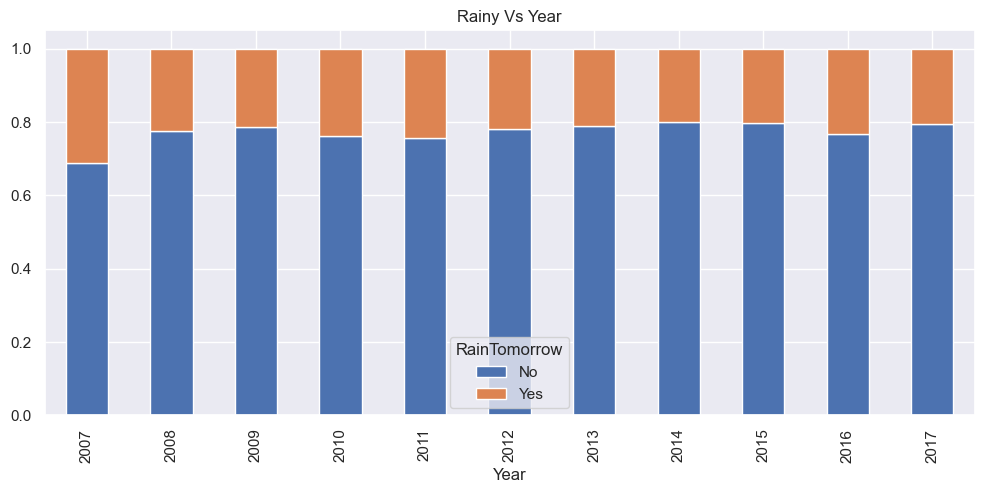

In [60]:
sns.set(rc={'figure.figsize':(12,5)})
pd.crosstab(df1.Year, df1.RainTomorrow, normalize = 'index').plot(kind='bar', stacked = True)
plt.title('Rainy Vs Year')

print('Jumlah Hujan Tertinggi yaitu di Tahun 2016')
display((df1[df1['Year'] == 2016]).RainTomorrow.value_counts(normalize = True))

    d.2). Rain Tomorrow Vs Month

In [61]:
# Menganalisis kolom RainTomorrow dan Month
pd.crosstab(df1.RainTomorrow, df1.Month)

Month,1,2,3,4,5,6,7,8,9,10,11,12
RainTomorrow,,,,,,,,,,,,
No,10738,8586,10580,9087,10412,9440,8854,9058,9034,9718,9233,8843
Yes,2498,2207,2781,2463,2941,3244,3171,2970,2606,2310,2436,2250


<Axes: xlabel='Month'>

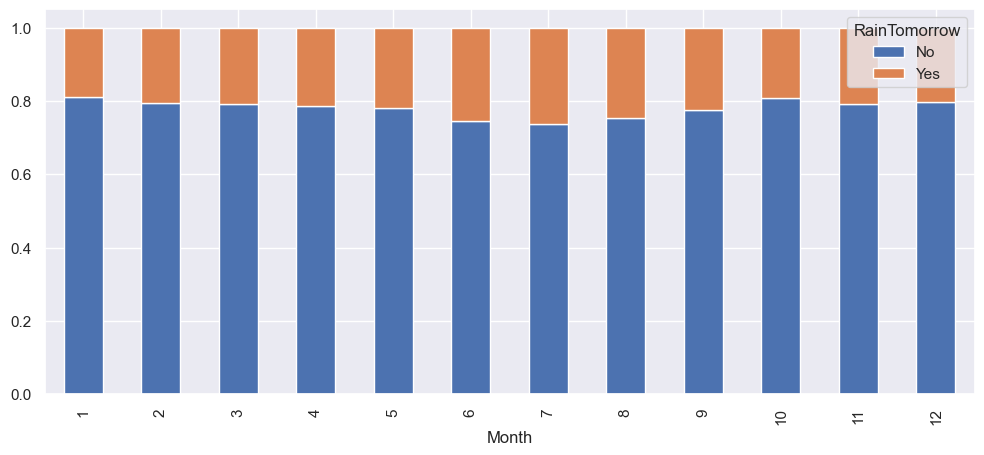

In [62]:
sns.set(rc={'figure.figsize':(12,5)})
pd.crosstab(df1.Month, df1.RainTomorrow, normalize = 'index').plot(kind='bar', stacked = True)

    c.3). Rain Today Vs Day

In [63]:
# Menganalisis kolom RainTomorrow dan Day
pd.crosstab(df1.RainTomorrow, df1.Day)

Day,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
RainTomorrow,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
No,3753,3776,3707,3718,3778,3740,3827,3739,3718,3677,3757,3735,3693,3804,3825,3712,3768,3781,3771,3743,3662,3612,3743,3681,3705,3721,3765,3676,3453,3337,2206
Yes,1033,1010,1079,1068,1008,1046,959,1047,1068,1109,1029,1051,1093,982,961,1074,1018,1005,1015,1043,1124,1174,1043,1104,1079,1015,970,1059,996,1014,601


<Axes: xlabel='Day'>

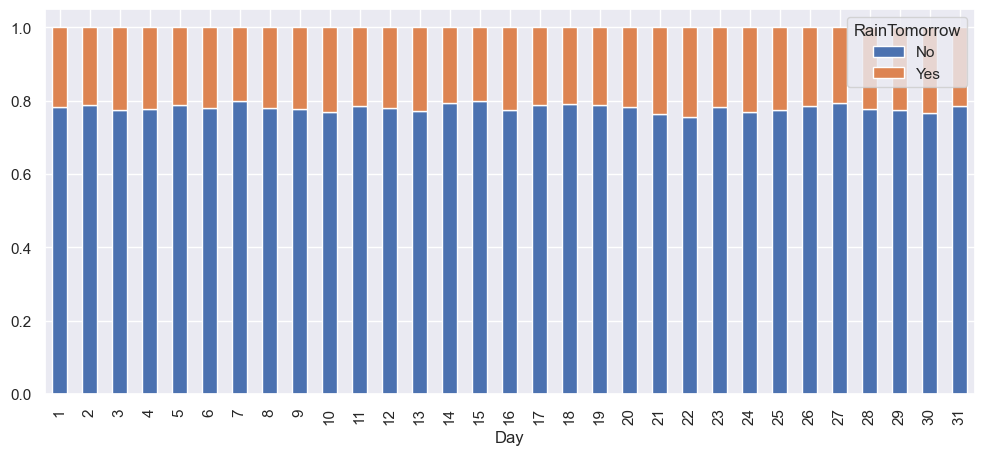

In [64]:
sns.set(rc={'figure.figsize':(12,5)})
pd.crosstab(df1.Day, df1.RainTomorrow, normalize = 'index').plot(kind='bar', stacked = True)

- Kesimpulan Rain Tomorrow (1)

    Berdasarkan data RainTomorrow, ternyata sepanjang tahun 2007 sampai dengan 2017 dominan tidak terjadi hujan. Positif terjadi hujan hanya sebanyak 21.92%, dengan positif hujan terbanyak yaitu pada tahun 2016.

RainTomorrow
No     0.665306
Yes    0.334694
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Rainy Vs Year')

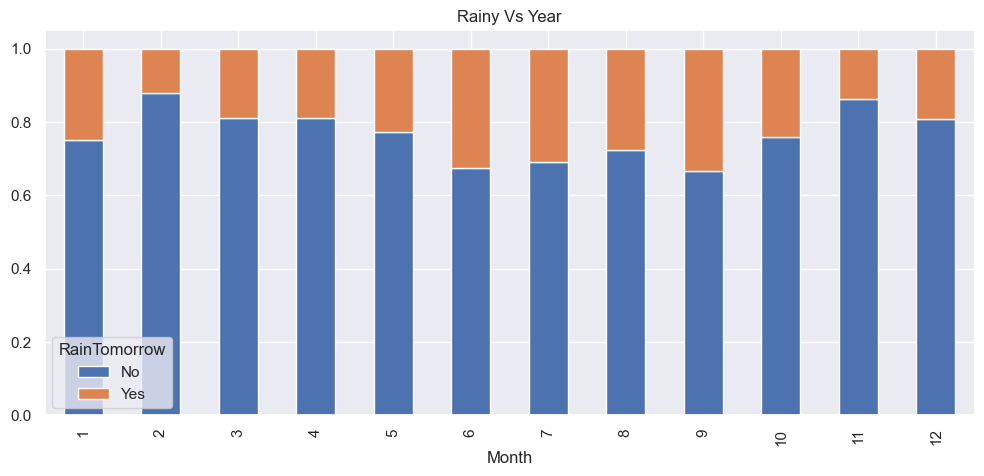

In [65]:
y2016 = df1[df1['Year'] == 2016]

display((y2016[y2016['Month'] == 9]).RainTomorrow.value_counts(normalize = True))

sns.set(rc={'figure.figsize':(12,5)})
pd.crosstab(y2016.Month, df1.RainTomorrow, normalize = 'index').plot(kind='bar', stacked = True)
plt.title('Rainy Vs Year')

In [66]:
pd.crosstab(y2016.RainTomorrow, y2016.Month)

Month,1,2,3,4,5,6,7,8,9,10,11,12
RainTomorrow,,,,,,,,,,,,
No,1139,1250,1230,1193,1173,993,1048,1098,978,1154,1268,1227
Yes,380,171,289,277,346,477,471,421,492,365,202,292


- Kesimpulan Rain Tomorrow (2)

    Pada tahun 2016, positif hujan tertinggi yaitu pada bulan September sebanyak 492 kejadian

    d.4). Rain Tomorrow Vs Location

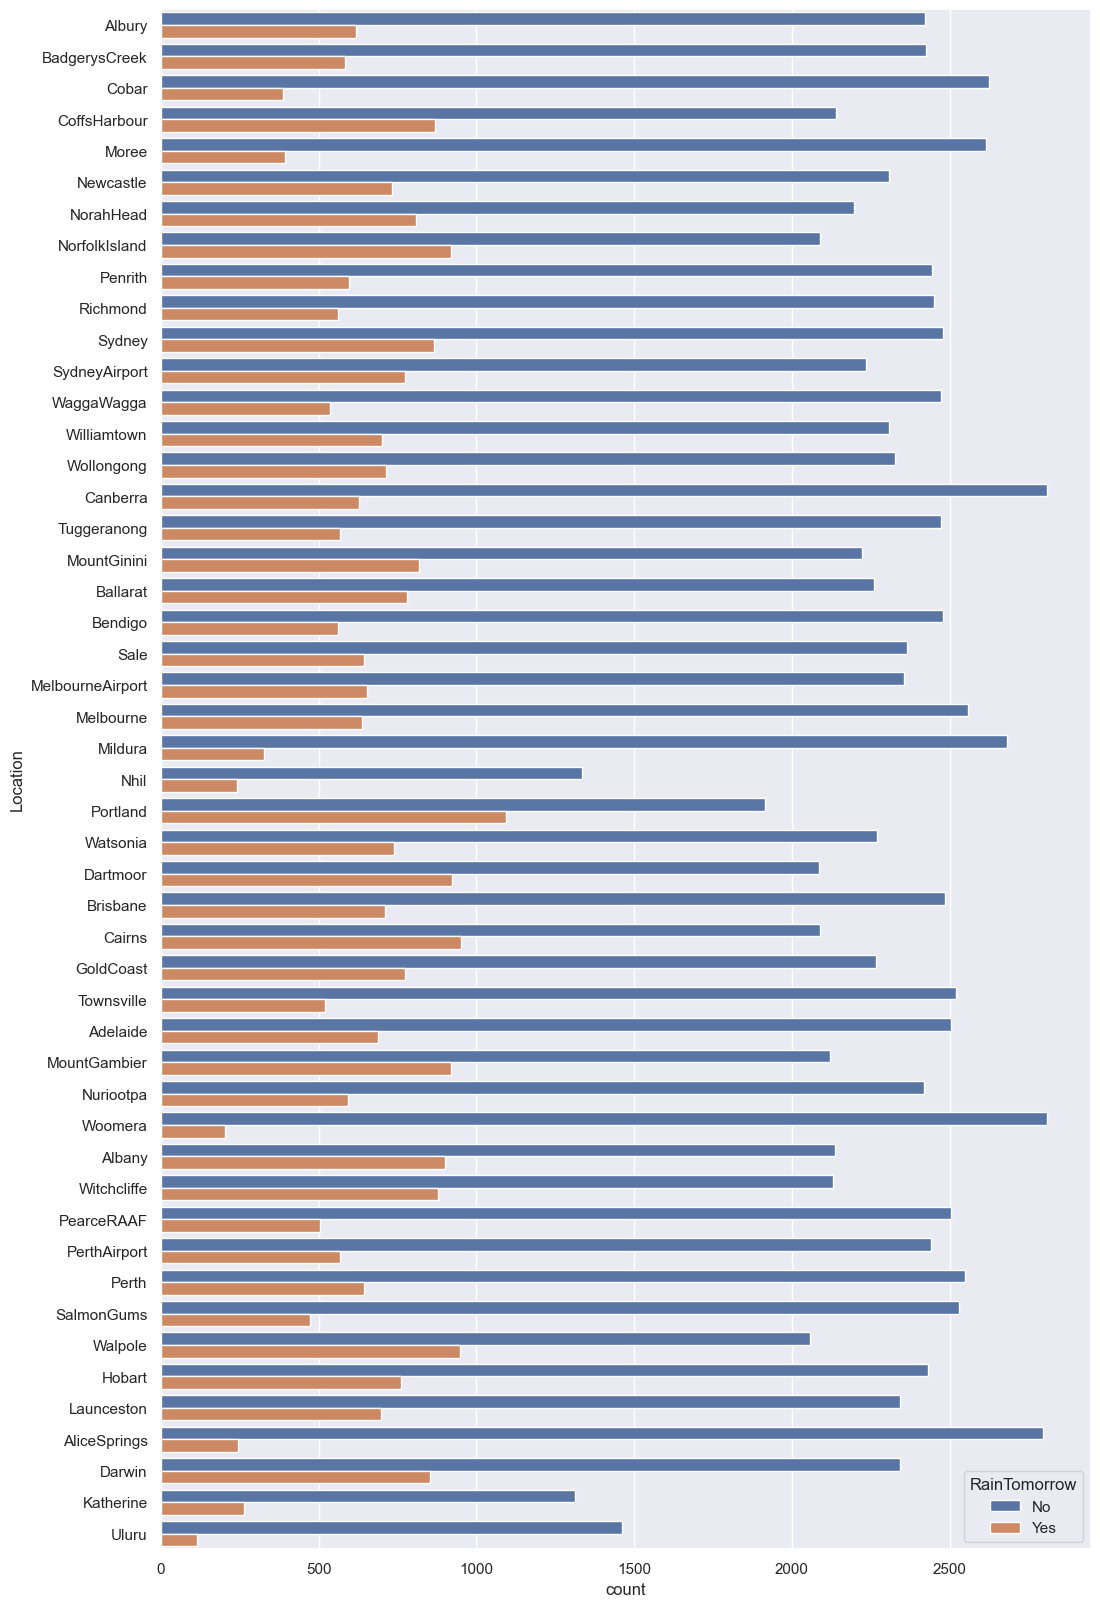

In [67]:
sns.set(rc={'figure.figsize':(12,20)})
sns.countplot(y = 'Location', hue='RainTomorrow', data = df1)
plt.show()

<Axes: xlabel='Location'>

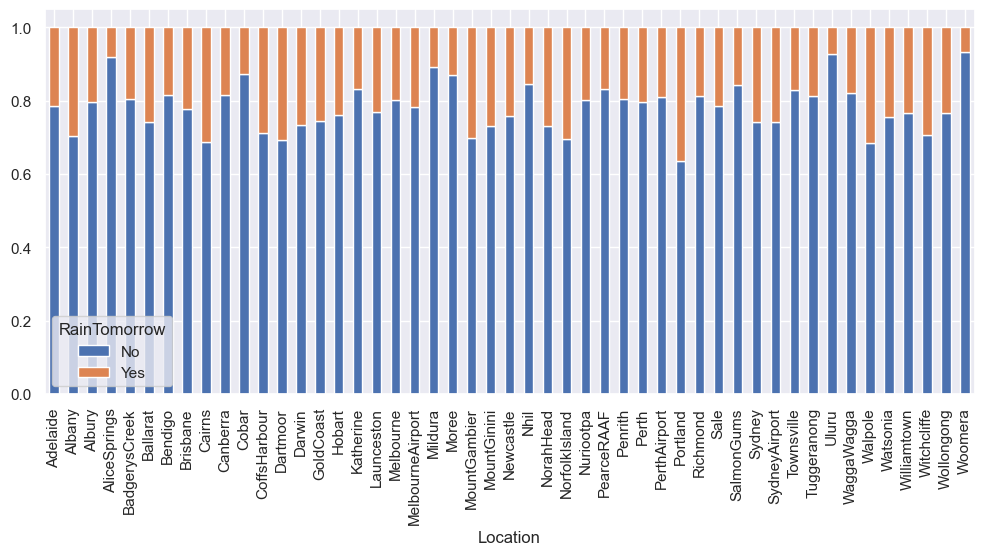

In [68]:
sns.set(rc={'figure.figsize':(12,5)})
pd.crosstab(df1.Location, df1.RainTomorrow, normalize = 'index').plot(kind='bar', stacked = True)

In [69]:
# Menganalisis kolom RainTomorrow dan Location
pd.crosstab(df1.RainTomorrow, df1.Location)

Location,Adelaide,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,CoffsHarbour,Dartmoor,Darwin,GoldCoast,Hobart,Katherine,Launceston,Melbourne,MelbourneAirport,Mildura,Moree,MountGambier,MountGinini,Newcastle,Nhil,NorahHead,NorfolkIsland,Nuriootpa,PearceRAAF,Penrith,Perth,PerthAirport,Portland,Richmond,Sale,SalmonGums,Sydney,SydneyAirport,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
RainTomorrow,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
No,2505,2138,2422,2796,2426,2259,2478,2484,2090,2807,2623,2140,2087,2341,2265,2432,1313,2341,2557,2356,2682,2615,2120,2221,2308,1336,2196,2090,2417,2504,2444,2548,2442,1914,2449,2366,2529,2479,2235,2521,2471,1462,2473,2057,2271,2309,2130,2327,2807
Yes,688,902,618,244,583,781,562,709,950,629,386,869,922,852,775,761,265,699,636,653,327,394,920,819,731,242,808,919,592,505,595,645,567,1095,560,643,472,865,774,519,568,116,536,949,738,700,879,713,202


- Kesimpulan Rain Tomorrow (3)

    Berdasarkan data RainTomorrow Vs Location, ternyata lokasi positif terjadi hujan tertinggi yaitu berada di Portland dengan jumlah hujan sebesar 1095.

    d.5). Rain Tomorrow Vs WindGustDir

In [70]:
# Menganalisis kolom RainTomorrow dan WindGustDir
pd.crosstab(df1.RainTomorrow, df1.WindGustDir)

WindGustDir,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
RainTomorrow,,,,,,,,,,,,,,,,
No,7831,6816,6172,6861,5814,5067,4757,5838,7151,7685,7461,6839,7163,15167,5977,6984
Yes,1350,1288,1200,2452,1319,1481,1863,2284,2017,1733,1755,1897,1804,5074,2275,2085


RainTomorrow
No     78.085384
Yes    21.914616
Name: proportion, dtype: float64

<Axes: xlabel='RainTomorrow'>

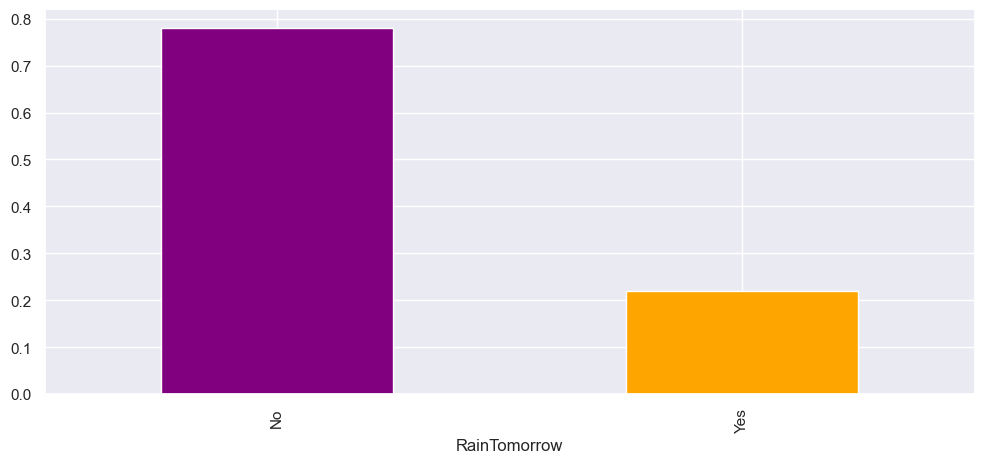

In [71]:
display(df1.RainTomorrow.value_counts(normalize = True)*100)
df1.RainTomorrow.value_counts(normalize = True).plot(kind = 'bar', color=['purple', 'orange'])

# __F. DATA PREPROCESSING__
-----------------------------------------------------------



## 1. Analisis Korelasi & Label Encod

In [72]:
df1

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.900000,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,21.8,21.8,No,No,2008,12,1
1,Albury,7.4,25.100000,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,24.3,24.3,No,No,2008,12,2
2,Albury,12.9,25.700000,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,23.2,23.2,No,No,2008,12,3
3,Albury,9.2,28.000000,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,26.5,26.5,No,No,2008,12,4
4,Albury,17.5,32.300000,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,29.7,29.7,No,No,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,Uluru,2.8,23.400000,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,22.4,22.4,No,No,2017,6,21
145456,Uluru,3.6,25.300000,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,24.5,24.5,No,No,2017,6,22
145457,Uluru,5.4,26.900000,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,26.1,26.1,No,No,2017,6,23
145458,Uluru,7.8,27.000000,0.0,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,26.0,26.0,No,No,2017,6,24


In [73]:
# Mengelompokkan data numerik dan kategori
new_col = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow', 'MinTemp', 'MaxTemp', 'Rainfall', 
           'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 
           'Temp3pm', 'Day', 'Month', 'Year']

dt_encode = df1[new_col]

dt_encode.head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,Day,Month,Year
0,Albury,W,W,WNW,No,No,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,21.8,21.8,1,12,2008
1,Albury,WNW,NNW,WSW,No,No,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,24.3,24.3,2,12,2008
2,Albury,WSW,W,WSW,No,No,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,23.2,23.2,3,12,2008
3,Albury,NE,SE,E,No,No,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,26.5,26.5,4,12,2008
4,Albury,W,ENE,NW,No,No,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,29.7,29.7,5,12,2008


In [74]:
# Mempersiapkan code label encoder
label_encoder = preprocessing.LabelEncoder()

# Mentransformasikan kolom kategori untuk di label encoder
dt_encode["Location"] = label_encoder.fit_transform(dt_encode["Location"])
dt_encode["WindGustDir"] = label_encoder.fit_transform(dt_encode["WindGustDir"])
dt_encode["WindDir9am"] = label_encoder.fit_transform(dt_encode["WindDir9am"])
dt_encode["WindDir3pm"] = label_encoder.fit_transform(dt_encode["WindDir3pm"])
dt_encode["RainToday"] = label_encoder.fit_transform(dt_encode["RainToday"])
dt_encode["RainTomorrow"] = label_encoder.fit_transform(dt_encode["RainTomorrow"])

# Menampilkan kolom
dt_encode.head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,Day,Month,Year
0,2,13,13,14,0,0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,21.8,21.8,1,12,2008
1,2,14,6,15,0,0,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,24.3,24.3,2,12,2008
2,2,15,13,15,0,0,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,23.2,23.2,3,12,2008
3,2,4,9,0,0,0,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,26.5,26.5,4,12,2008
4,2,13,1,7,0,0,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,29.7,29.7,5,12,2008


In [75]:
# Mengelompokkan kolom temperatur
temperatur = ['MinTemp','MaxTemp','Temp9am','Temp3pm','RainToday','RainTomorrow']

dt_temperatur = dt_encode[temperatur]
dt_temperatur.head()

,MinTemp,MaxTemp,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,21.8,21.8,0,0
1,7.4,25.1,24.3,24.3,0,0
2,12.9,25.7,23.2,23.2,0,0
3,9.2,28.0,26.5,26.5,0,0
4,17.5,32.3,29.7,29.7,0,0


In [76]:
# Normalisasi kolom numerik agar korelasi akurat
temp_norm = dt_temperatur.copy()
col_num = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm']
scaler = MinMaxScaler()
temp_norm[col_num] = scaler.fit_transform(dt_temperatur[col_num])
temp_norm

,MinTemp,MaxTemp,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.530914,0.496359,0.507653,0.507653,0,0
1,0.369624,0.549757,0.571429,0.571429,0,0
2,0.517473,0.564320,0.543367,0.543367,0,0
3,0.418011,0.620146,0.627551,0.627551,0,0
4,0.641129,0.724515,0.709184,0.709184,0,0
...,...,...,...,...,...,...
145455,0.245968,0.508495,0.522959,0.522959,0,0
145456,0.267473,0.554612,0.576531,0.576531,0,0
145457,0.315860,0.593447,0.617347,0.617347,0,0
145458,0.380376,0.595874,0.614796,0.614796,0,0


In [77]:
# Mengecek korelasi
df_corr_temp = temp_norm.corr()
df_corr_temp

,MinTemp,MaxTemp,Temp9am,Temp3pm,RainToday,RainTomorrow
MinTemp,1.000000,0.733392,0.690466,0.699147,0.054573,0.082177
MaxTemp,0.733392,1.000000,0.960806,0.968905,-0.225279,-0.156656
Temp9am,0.690466,0.960806,1.000000,0.994321,-0.227525,-0.186112
Temp3pm,0.699147,0.968905,0.994321,1.000000,-0.229614,-0.187734
RainToday,0.054573,-0.225279,-0.227525,-0.229614,1.000000,0.305744
RainTomorrow,0.082177,-0.156656,-0.186112,-0.187734,0.305744,1.000000


<Axes: >

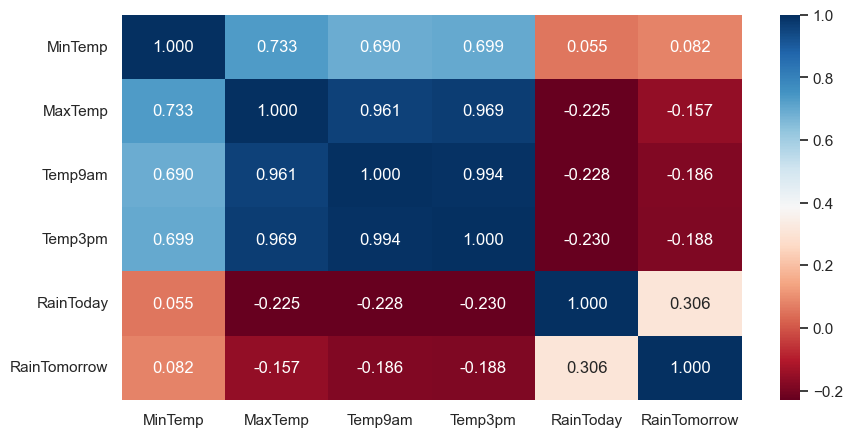

In [78]:
# Menampilkan korelasi temperatur dengan rain today dan rain tomorrow
plt.figure(figsize=(10,5))
sns.heatmap(temp_norm.corr(), cmap='RdBu', annot=True, fmt=".3f")

In [79]:
# Mengelompokkan kolom Wind
wind = ['WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm','RainToday','RainTomorrow']

dt_wind = dt_encode[wind]
dt_wind.head()

,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,RainToday,RainTomorrow
0,13,44.0,13,14,20.0,24.0,0,0
1,14,44.0,6,15,4.0,22.0,0,0
2,15,46.0,13,15,19.0,26.0,0,0
3,4,24.0,9,0,11.0,9.0,0,0
4,13,41.0,1,7,7.0,20.0,0,0


In [80]:
# Mengecek korelasi
df_corr_wind = dt_wind.corr()
df_corr_wind

,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,RainToday,RainTomorrow
WindGustDir,1.000000,0.131125,0.353790,0.563161,0.007857,0.084653,0.124675,0.048774
WindGustSpeed,0.131125,1.000000,0.075418,0.136542,0.579873,0.660024,0.145823,0.218270
WindDir9am,0.353790,0.075418,1.000000,0.301249,0.113735,0.113039,0.167718,0.035341
WindDir3pm,0.563161,0.136542,0.301249,1.000000,0.051176,0.090975,0.121719,0.028890
WindSpeed9am,0.007857,0.579873,0.113735,0.051176,1.000000,0.507652,0.098524,0.084947
WindSpeed3pm,0.084653,0.660024,0.113039,0.090975,0.507652,1.000000,0.075817,0.081106
RainToday,0.124675,0.145823,0.167718,0.121719,0.098524,0.075817,1.000000,0.305744
RainTomorrow,0.048774,0.218270,0.035341,0.028890,0.084947,0.081106,0.305744,1.000000


<Axes: >

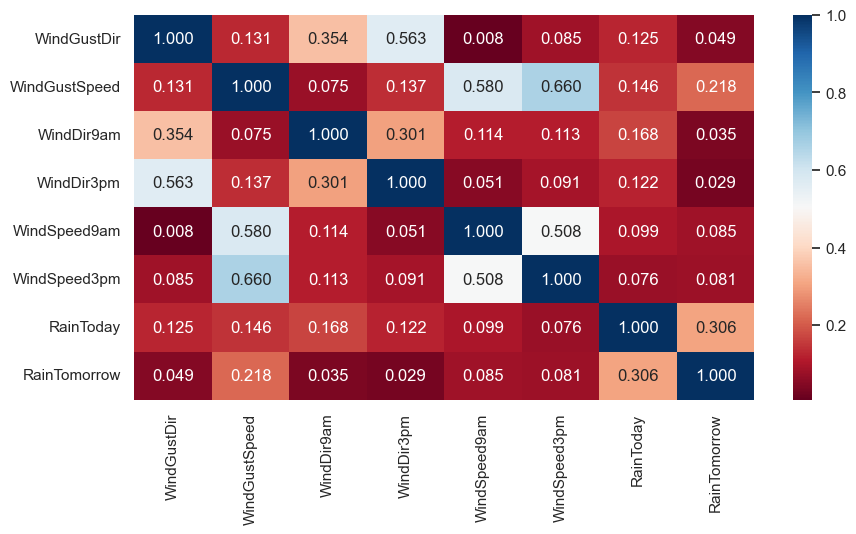

In [81]:
# Menampilkan korelasi wind dengan rain today dan rain tomorrow
plt.figure(figsize=(10,5))
sns.heatmap(dt_wind.corr(), cmap='RdBu', annot=True, fmt=".3f")

In [82]:
# Mengelompokkan kolom Location, Humidity , Pressure, dan Rainfall
lhpr = ['Location','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Rainfall','RainToday','RainTomorrow']

dt_lhpr = dt_encode[lhpr]
dt_lhpr.head()

,Location,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Rainfall,RainToday,RainTomorrow
0,2,71.0,22.0,1007.7,1007.1,0.6,0,0
1,2,44.0,25.0,1010.6,1007.8,0.0,0,0
2,2,38.0,30.0,1007.6,1008.7,0.0,0,0
3,2,45.0,16.0,1017.6,1012.8,0.0,0,0
4,2,82.0,33.0,1010.8,1006.0,1.0,0,0


In [83]:
# Mengecek korelasi
df_corr_lhpr = dt_lhpr.corr()
df_corr_lhpr

,Location,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Rainfall,RainToday,RainTomorrow
Location,1.000000,-0.000617,0.012542,0.035648,0.045826,-0.004876,-0.005484,-0.005498
Humidity9am,-0.000617,1.000000,0.659063,0.133238,0.177383,0.384634,0.348293,0.252190
Humidity3pm,0.012542,0.659063,1.000000,-0.024399,0.050323,0.402794,0.367919,0.433167
Pressure9am,0.035648,0.133238,-0.024399,1.000000,0.959981,-0.178762,-0.176015,-0.229573
Pressure3pm,0.045826,0.177383,0.050323,0.959981,1.000000,-0.094668,-0.098148,-0.210585
Rainfall,-0.004876,0.384634,0.402794,-0.178762,-0.094668,1.000000,0.966835,0.325304
RainToday,-0.005484,0.348293,0.367919,-0.176015,-0.098148,0.966835,1.000000,0.305744
RainTomorrow,-0.005498,0.252190,0.433167,-0.229573,-0.210585,0.325304,0.305744,1.000000


<Axes: >

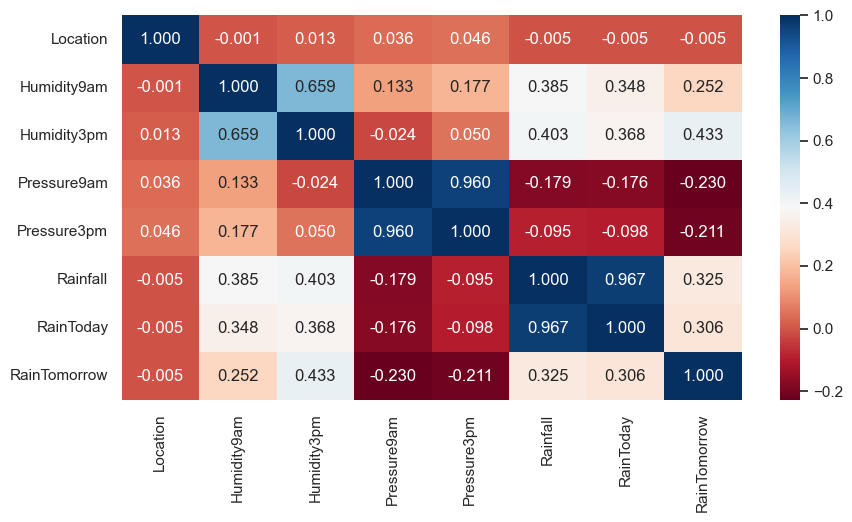

In [84]:
# Menampilkan korelasi Humidity , Pressure, Rainfall, Location dengan rain today dan rain tomorrow
plt.figure(figsize=(10,5))
sns.heatmap(dt_lhpr.corr(), cmap='RdBu', annot=True, fmt=".3f")

In [85]:
dt_encode["WindDir3pm"] = label_encoder.fit_transform(dt_encode["WindDir3pm"])
dt_encode["RainToday"] = label_encoder.fit_transform(dt_encode["RainToday"])
dt_encode["RainTomorrow"] = label_encoder.fit_transform(dt_encode["RainTomorrow"])

# Menampilkan kolom
dt_encode.head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,Day,Month,Year
0,2,13,13,14,0,0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,21.8,21.8,1,12,2008
1,2,14,6,15,0,0,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,24.3,24.3,2,12,2008
2,2,15,13,15,0,0,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,23.2,23.2,3,12,2008
3,2,4,9,0,0,0,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,26.5,26.5,4,12,2008
4,2,13,1,7,0,0,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,29.7,29.7,5,12,2008


In [86]:
# Mengelompokkan kolom Day, Month, Year
tgl = ['Day', 'Month', 'Year','RainToday','RainTomorrow']

dt_tgl = dt_encode[tgl]
dt_tgl.head()

,Day,Month,Year,RainToday,RainTomorrow
0,1,12,2008,0,0
1,2,12,2008,0,0
2,3,12,2008,0,0
3,4,12,2008,0,0
4,5,12,2008,0,0


In [87]:
# Mengecek korelasi
df_corr_tgl = dt_tgl.corr()
df_corr_tgl

,Day,Month,Year,RainToday,RainTomorrow
Day,1.000000,0.009223,-0.005042,0.003443,0.005473
Month,0.009223,1.000000,-0.112375,0.010441,0.007674
Year,-0.005042,-0.112375,1.000000,-0.014222,-0.014141
RainToday,0.003443,0.010441,-0.014222,1.000000,0.305744
RainTomorrow,0.005473,0.007674,-0.014141,0.305744,1.000000


<Axes: >

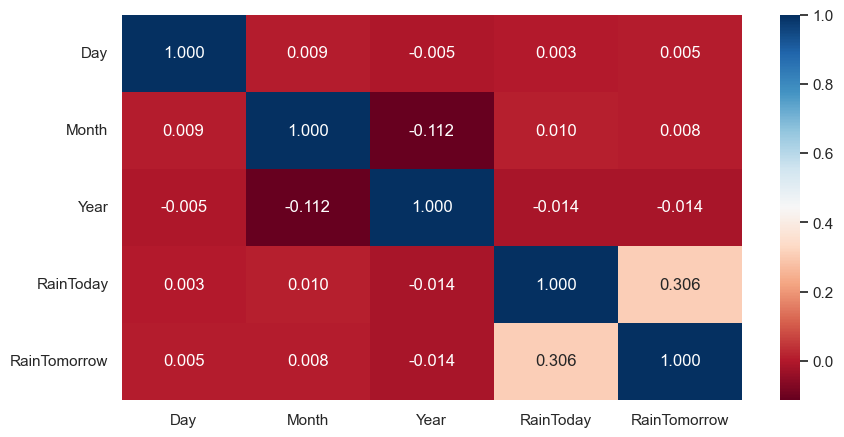

In [88]:
# Menampilkan korelasi Day, Month, Year dengan rain today dan rain tomorrow
plt.figure(figsize=(10,5))
sns.heatmap(dt_tgl.corr(), cmap='RdBu', annot=True, fmt=".3f")

Berdasarkan heatmap, dipilih beberapa kolom yang memiliki korelasi cukup tinggi dan beberapa pertimbangan lainnya. Kolom tersebut di antaranya adalah sebagai berikut:
- Location
- Rainfall
- WindGustSpeed
- Humidity9am
- Humidity3pm
- Pressure9am
- Pressure3pm
- RainToday
- RainTomorrow

## 2. Membuat Data Frame Berisi Feature yang Dipilih Berdasarkan Analisis Korelasi

In [89]:
fix_col = ['Location','Rainfall','WindGustSpeed','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','RainToday','RainTomorrow']

df_pred = dt_encode[fix_col]
df_pred

,Location,Rainfall,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,RainToday,RainTomorrow
0,2,0.6,44.0,71.0,22.0,1007.7,1007.1,0,0
1,2,0.0,44.0,44.0,25.0,1010.6,1007.8,0,0
2,2,0.0,46.0,38.0,30.0,1007.6,1008.7,0,0
3,2,0.0,24.0,45.0,16.0,1017.6,1012.8,0,0
4,2,1.0,41.0,82.0,33.0,1010.8,1006.0,0,0
...,...,...,...,...,...,...,...,...,...
145455,41,0.0,31.0,51.0,24.0,1024.6,1020.3,0,0
145456,41,0.0,22.0,56.0,21.0,1023.5,1019.1,0,0
145457,41,0.0,37.0,53.0,24.0,1021.0,1016.8,0,0
145458,41,0.0,28.0,51.0,24.0,1019.4,1016.5,0,0


# G. PENDEFINISIAN DATA
--------------------------

   
Setelah melakukan data cleaning dan data preprocessing, maka diperoleh data yang akan digunakan untuk pelatihan model selanjutnya. Terdapat 8 atribut yang akan digunakan untuk membuat model perkiraan harga, yaitu **'Pickup_loc', 'destination'	,'Taxi'	,'name','price'	,'distance'	,'surge_multiplier', dan 'weather'**

Metode pengujian yang akan digunakan pada project kali ini adalah metode Linear Regression. Linear Regression adalah salah satu cara yang paling terkenal dan paling sederhana untuk memprediksi output, yang cocok dengan model linier untuk meminimalkan jumlah sisa kuadrat antara nilai prediksi dan nilai sebenarnya. Meskipun kelemahan utama dari linear regression adalah mengasumsikan linieritas antara variabel yang diprediksi dan variabel respons, tetapi data jarang dapat dipisahkan secara linier di dunia nyata.

In [90]:
x = df_pred.drop(columns=['RainTomorrow'])
y = df_pred['RainTomorrow']

In [91]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [92]:
# Memisahkan data menjadi data training dan data testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [93]:
# Split Data Menggunakan SMOTE untuk mengatasi IMbalanced pada Target
smote = SMOTE(random_state=42)
x_SMOTE, y_SMOTE = smote.fit_resample(x_train, y_train)

## 1. Tanpa Penanganan Imbalanced
### a). Logistic Regression

In [94]:
# Membuat model Logistik Regression
lr_model = LogisticRegression(solver= 'liblinear', penalty = 'l2', random_state=42)

### b). K-Nearest Neighbors

In [95]:
# Membuat model K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=16)

### c). Support Vector Machine

In [96]:
# Membuat model Support Vector Machine
svm_model = svm.SVC(kernel='linear', random_state= 42)

### d). Decision Tree

In [97]:
# Membuat model Decision Tree Classifier
dtc_model = DecisionTreeClassifier(criterion='entropy', max_depth=3)

### e). Random Forest

In [98]:
# Membuat model Random Forest Classifier
rfc_model = RandomForestClassifier(n_estimators=100)

### f). Naive Bayes

In [99]:
# Membuat model Naive Bayes
nb_model = GaussianNB()

## 2. Imbalanced di Atasi
### a). Logistic Regression

In [100]:
# Membuat model Logistik Regression
lr_model_imb = LogisticRegression(solver= 'liblinear', penalty = 'l2', random_state=42)

### b). K-Nearest Neighbors

In [101]:
# Membuat model K-Nearest Neighbors
knn_model_imb = KNeighborsClassifier(n_neighbors=16)

### c). Support Vector Machine

In [102]:
# Membuat model Support Vector Machine
svm_model_imb = svm.SVC(kernel='linear', random_state= 42)

### d). Decision Tree

In [103]:
# Membuat model Decision Tree Classifier
dtc_model_imb = DecisionTreeClassifier(criterion='entropy', max_depth=3)

### e). Random Forest

In [104]:
# Membuat model Random Forest Classifier
rfc_model_imb = RandomForestClassifier(n_estimators=100)

### f). Naive Bayes

In [105]:
# Membuat model Naive Bayes
nb_model_imb = GaussianNB()

### g. Confusion Matrix

# H. PELATIHAN MODEL
---------------------------------------------
    Pelatihan model adalah proses untuk menjalankan sebuah algoritma machine learning untuk dapat mengolah dataset di dalamnya yang sudah terbagi menjadi data training dan mengoptimalkan algoritma untuk menemukan pola maupun output tertentu.


## 1. Tanpa Penanganan Imbalanced
### a). Logistic Regression

In [106]:
# Model Training Logistic Regression
lr_model = lr_model.fit(x_train, y_train)

### b). K-Nearest Neighbors

In [107]:
# Model Training KNN
knn_model = knn_model.fit(x_train, y_train)

### c). Support Vector Machine

In [108]:
# Model Training SVM
svm_model = svm_model.fit(x_train, y_train)

### d). Decision Tree

In [109]:
# Model Training DTC
dtc_model = dtc_model.fit(x_train, y_train)

### e). Random Forest

In [110]:
# Model Training RFC
rfc_model = rfc_model.fit(x_train, y_train)

### f). Naive Bayes

In [111]:
# Model Training NB
nb_model = nb_model.fit(x_train, y_train)

### g). Confusion Matrix

## 2. Imbalanced di Atasi
### a). Logistic Regression

In [112]:
# Model Training Logistic Regression
lr_model_imb = lr_model_imb.fit(x_SMOTE, y_SMOTE)

### b). K-Nearest Neighbors

In [113]:
# Model Training KNN
knn_model_imb = knn_model_imb.fit(x_SMOTE, y_SMOTE)

### c). Support Vector Machine

In [114]:
# Model Training SVM
svm_model_imb = svm_model_imb.fit(x_SMOTE, y_SMOTE)

### d). Decision Tree

In [115]:
# Model Training DTC
dtc_model_imb = dtc_model_imb.fit(x_SMOTE, y_SMOTE)

### e). Random Forest

In [116]:
# Model Training RFC
rfc_model_imb = rfc_model_imb.fit(x_SMOTE, y_SMOTE)

### f). Naive Bayes

In [117]:
# Model Training NB
nb_model_imb = nb_model_imb.fit(x_SMOTE, y_SMOTE)

# I. EVALUASI MODEL
________________________________________

Evaluasi model adalah menguji akurasi data testing menggunakan evaluasi model setelah Pelatihan Model. Evaluasi menggunakan metode Logistic Regression, K-Nearest Neighbors, Support Virtual Machine, Decision Tree, Random Forest, dan Naive Bayes sebagai berikut:

1. Akurasi (Accuracy): Akurasi mengukur sejauh mana model benar dalam mengklasifikasikan data. Ini adalah metrik umum untuk masalah klasifikasi.
2. Melihat Akurasi model.
3. Melihat harga hasil prediksi dan perbandingan dengan harga aktual.
4. Membuat visualisasi regresi masing-masing kondisi.

## 1. Tanpa Penanganan Imbalanced
### 1.a). Logistic Regression

In [119]:
# Predict Probabilitas
lr_model.predict_proba(x_train)

# Score dari data training
print('Score : ', lr_model.score(x_train, y_train))

Score :  0.8396122645400798


In [120]:
# Predict data
y_pred_lr = lr_model.predict(x_test)
print(y_pred_lr)

# Score dari data testing
print('Score : ', lr_model.score(x_test, y_test))

[1 0 0 ... 0 0 0]
Score :  0.8377217104358586


#### 1.a.1). Confusion Matrix

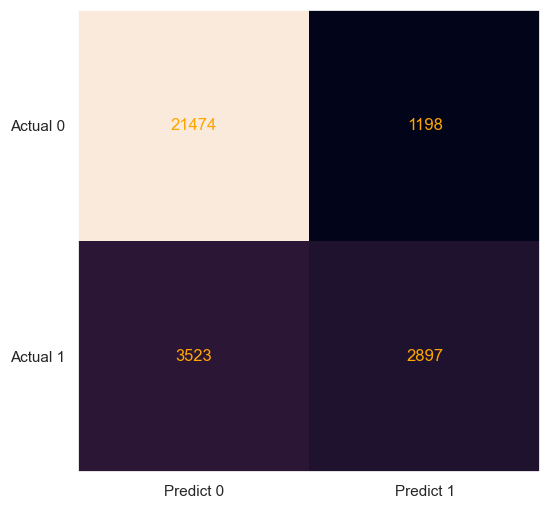

In [121]:
# Membuat visualisasi confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),
             ticklabels=('Predict 0', 'Predict 1'))
ax.yaxis.set(ticks=(0,1),
             ticklabels=('Actual 0', 'Actual 1'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i,j], ha='center', va='center',
            color='orange')

# Save Plot
plt.savefig('confusion_matrix_1.png',
            bbox_inches = 'tight',
            pad_inches = 1,
            transparent = True,
            orientation = 'landscape')

plt.show()

In [122]:
# Classification Report Logistic Regression
print('Classification Report\n', classification_report(y_test, y_pred_lr))

Classification Report
               precision    recall  f1-score   support

           0       0.86      0.95      0.90     22672
           1       0.71      0.45      0.55      6420

    accuracy                           0.84     29092
   macro avg       0.78      0.70      0.73     29092
weighted avg       0.83      0.84      0.82     29092



### 1.b). K-Nearest Neighbors

In [123]:
# Predict Probabilitas
knn_model.predict_proba(x_train)

# Score dari data training
print('Score : ', knn_model.score(x_train, y_train))

Score :  0.8523820981713186


In [124]:
# Predict data
y_pred_knn = knn_model.predict(x_test)
print(y_pred_knn)

# Score dari data testing
print('Score : ', knn_model.score(x_test, y_test))

[0 0 0 ... 0 0 0]
Score :  0.8370686099271277


#### 1.b.1). Confusion Matrix

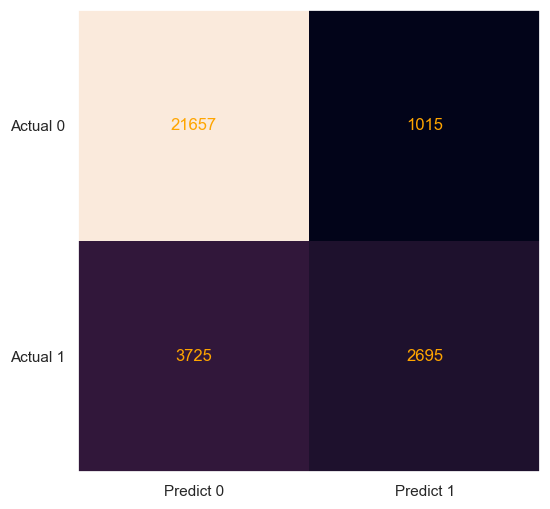

In [125]:
# Membuat visualisasi confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(cm_knn)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),
             ticklabels=('Predict 0', 'Predict 1'))
ax.yaxis.set(ticks=(0,1),
             ticklabels=('Actual 0', 'Actual 1'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm_knn[i,j], ha='center', va='center',
            color='orange')

# Save Plot
plt.savefig('confusion_matrix_1.png',
            bbox_inches = 'tight',
            pad_inches = 1,
            transparent = True,
            orientation = 'landscape')

plt.show()

In [126]:
# Classification Report KNN
print('Classification Report\n', classification_report(y_test, y_pred_knn))

Classification Report
               precision    recall  f1-score   support

           0       0.85      0.96      0.90     22672
           1       0.73      0.42      0.53      6420

    accuracy                           0.84     29092
   macro avg       0.79      0.69      0.72     29092
weighted avg       0.83      0.84      0.82     29092



### 1.c). Support Vector Machine

In [129]:
# Predict data
y_pred_svm = svm_model.predict(x_test)
print(y_pred_svm)

# Score dari data training
print('Score : ', svm_model.score(x_train, y_train))

# Score dari data testing
print('Score : ', svm_model.score(x_test, y_test))

[1 0 0 ... 0 0 0]
Score :  0.8393888354186718
Score :  0.8371717310600852


#### 1.c.1). Confusion Matrix

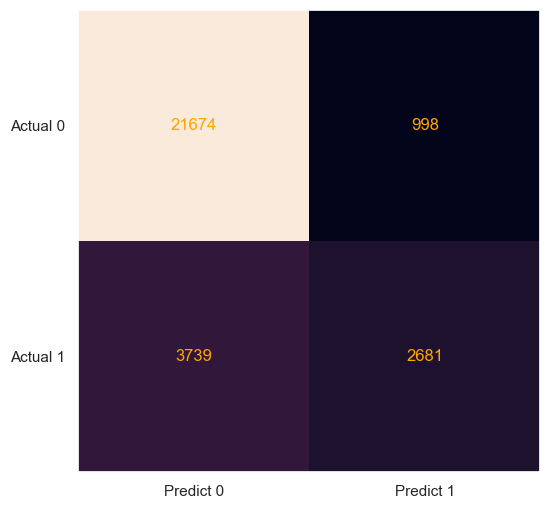

In [130]:
# Membuat visualisasi confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(cm_svm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),
             ticklabels=('Predict 0', 'Predict 1'))
ax.yaxis.set(ticks=(0,1),
             ticklabels=('Actual 0', 'Actual 1'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm_svm[i,j], ha='center', va='center',
            color='orange')

# Save Plot
plt.savefig('confusion_matrix_1.png',
            bbox_inches = 'tight',
            pad_inches = 1,
            transparent = True,
            orientation = 'landscape')

plt.show()

In [131]:
# Classification Report SVM
print('Classification Report\n', classification_report(y_test, y_pred_svm))

Classification Report
               precision    recall  f1-score   support

           0       0.85      0.96      0.90     22672
           1       0.73      0.42      0.53      6420

    accuracy                           0.84     29092
   macro avg       0.79      0.69      0.72     29092
weighted avg       0.83      0.84      0.82     29092



### 1.d). Decision Tree

In [132]:
# Predict Probabilitas
dtc_model.predict_proba(x_train)

# Score dari data training
print('Score : ', dtc_model.score(x_train, y_train))

Score :  0.8317750584353086


In [133]:
# Predict data
y_pred_dtc = dtc_model.predict(x_test)
print(y_pred_dtc)

# Score dari data testing
print('Score : ', dtc_model.score(x_test, y_test))

[0 0 0 ... 0 1 0]
Score :  0.8284751821806682


#### 1.d.1). Confusion Matrix

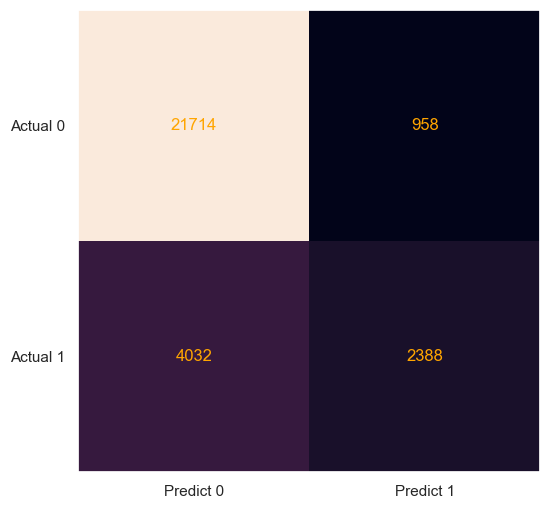

In [134]:
# Membuat visualisasi confusion matrix
cm_dtc = confusion_matrix(y_test, y_pred_dtc)
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(cm_dtc)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),
             ticklabels=('Predict 0', 'Predict 1'))
ax.yaxis.set(ticks=(0,1),
             ticklabels=('Actual 0', 'Actual 1'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm_dtc[i,j], ha='center', va='center',
            color='orange')

# Save Plot
plt.savefig('confusion_matrix_1.png',
            bbox_inches = 'tight',
            pad_inches = 1,
            transparent = True,
            orientation = 'landscape')

plt.show()

In [135]:
# Classification Report DTC
print('Classification Report\n', classification_report(y_test, y_pred_dtc))

Classification Report
               precision    recall  f1-score   support

           0       0.84      0.96      0.90     22672
           1       0.71      0.37      0.49      6420

    accuracy                           0.83     29092
   macro avg       0.78      0.66      0.69     29092
weighted avg       0.81      0.83      0.81     29092



### 1.e). Random Forest

In [136]:
# Predict Probabilitas
rfc_model.predict_proba(x_train)

# Score dari data training
print('Score : ', rfc_model.score(x_train, y_train))

Score :  0.9978172693523993


In [137]:
# Predict data
y_pred_rfc = rfc_model.predict(x_test)
print(y_pred_rfc)

# Score dari data testing
print('Score : ', rfc_model.score(x_test, y_test))

[1 0 0 ... 0 1 0]
Score :  0.8402997387597965


#### 1.e.1). Confusion Matrix

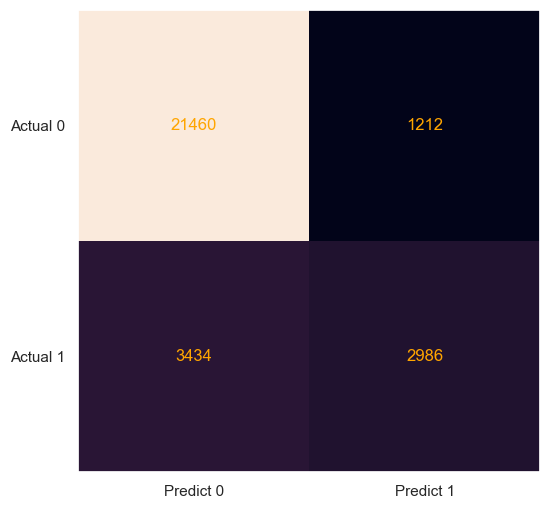

In [138]:
# Membuat visualisasi confusion matrix
cm_rfc = confusion_matrix(y_test, y_pred_rfc)
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(cm_rfc)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),
             ticklabels=('Predict 0', 'Predict 1'))
ax.yaxis.set(ticks=(0,1),
             ticklabels=('Actual 0', 'Actual 1'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm_rfc[i,j], ha='center', va='center',
            color='orange')

# Save Plot
plt.savefig('confusion_matrix_1.png',
            bbox_inches = 'tight',
            pad_inches = 1,
            transparent = True,
            orientation = 'landscape')

plt.show()

In [139]:
# Classification Report RFC
print('Classification Report\n', classification_report(y_test, y_pred_rfc))

Classification Report
               precision    recall  f1-score   support

           0       0.86      0.95      0.90     22672
           1       0.71      0.47      0.56      6420

    accuracy                           0.84     29092
   macro avg       0.79      0.71      0.73     29092
weighted avg       0.83      0.84      0.83     29092



### 1.f). Naive Bayes

In [140]:
# Predict Probabilitas
nb_model.predict_proba(x_train)

# Score dari data training
print('Score : ', nb_model.score(x_train, y_train))

Score :  0.7812285164306338


In [141]:
# Predict data
y_pred_nb = nb_model.predict(x_test)
print(y_pred_nb)

# Score dari data testing
print('Score : ', nb_model.score(x_test, y_test))

[1 0 0 ... 0 0 0]
Score :  0.7810050873092259


#### 1.f.1). Confusion Matrix

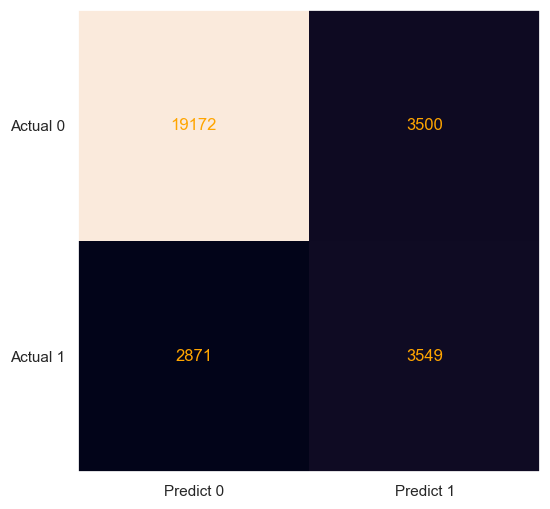

In [142]:
# Membuat visualisasi confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(cm_nb)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),
             ticklabels=('Predict 0', 'Predict 1'))
ax.yaxis.set(ticks=(0,1),
             ticklabels=('Actual 0', 'Actual 1'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm_nb[i,j], ha='center', va='center',
            color='orange')

# Save Plot
plt.savefig('confusion_matrix_1.png',
            bbox_inches = 'tight',
            pad_inches = 1,
            transparent = True,
            orientation = 'landscape')

plt.show()

In [143]:
# Classification Report NB
print('Classification Report\n', classification_report(y_test, y_pred_nb))

Classification Report
               precision    recall  f1-score   support

           0       0.87      0.85      0.86     22672
           1       0.50      0.55      0.53      6420

    accuracy                           0.78     29092
   macro avg       0.69      0.70      0.69     29092
weighted avg       0.79      0.78      0.78     29092



## 2. Imbalanced di Atasi
### 2.a). Logistic Regression

In [157]:
# Predict Probabilitas
lr_model_imb.predict_proba(x_SMOTE)

# Score dari data training
print('Score : ', lr_model_imb.score(x_SMOTE, y_SMOTE))

Score :  0.7690433500896481


In [145]:
# Predict data
y_pred_lr_imb = lr_model_imb.predict(x_test)
print(y_pred_lr_imb)

# Score dari data testing
print('Score : ', lr_model_imb.score(x_test, y_test))

[1 0 1 ... 0 1 0]
Score :  0.7743022136669875


#### 2.a.1). Confusion Matrix

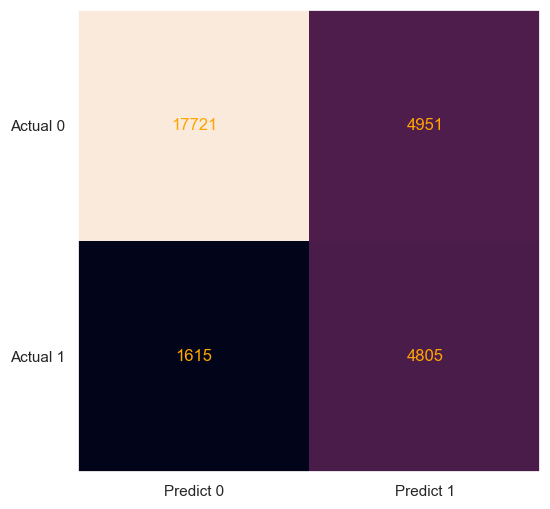

In [146]:
# Membuat visualisasi confusion matrix
cm_lr_imb = confusion_matrix(y_test, y_pred_lr_imb)
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(cm_lr_imb)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),
             ticklabels=('Predict 0', 'Predict 1'))
ax.yaxis.set(ticks=(0,1),
             ticklabels=('Actual 0', 'Actual 1'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm_lr_imb[i,j], ha='center', va='center',
            color='orange')

# Save Plot
plt.savefig('confusion_matrix_1.png',
            bbox_inches = 'tight',
            pad_inches = 1,
            transparent = True,
            orientation = 'landscape')

plt.show()

In [147]:
# Classification Report Logistic Regression IMB
print('Classification Report\n', classification_report(y_test, y_pred_lr_imb))

Classification Report
               precision    recall  f1-score   support

           0       0.92      0.78      0.84     22672
           1       0.49      0.75      0.59      6420

    accuracy                           0.77     29092
   macro avg       0.70      0.77      0.72     29092
weighted avg       0.82      0.77      0.79     29092



### 2.b). K-Nearest Neighbors

In [158]:
# Predict Probabilitas
knn_model_imb.predict_proba(x_SMOTE)

# Score dari data training
print('Score : ', knn_model_imb.score(x_SMOTE, y_SMOTE))

Score :  0.8472297081761283


In [148]:
# Predict data
y_pred_knn_imb = knn_model_imb.predict(x_test)
print(y_pred_knn_imb)

# Score dari data testing
print('Score : ', knn_model_imb.score(x_test, y_test))

[1 0 1 ... 0 0 0]
Score :  0.7702461157706586


#### 2.b.1). Confusion Matrix

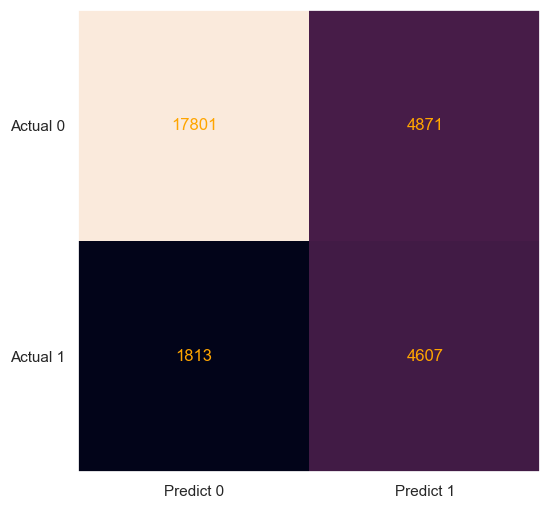

In [150]:
# Membuat visualisasi confusion matrix
cm_knn_imb = confusion_matrix(y_test, y_pred_knn_imb)
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(cm_knn_imb)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),
             ticklabels=('Predict 0', 'Predict 1'))
ax.yaxis.set(ticks=(0,1),
             ticklabels=('Actual 0', 'Actual 1'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm_knn_imb[i,j], ha='center', va='center',
            color='orange')

# Save Plot
plt.savefig('confusion_matrix_1.png',
            bbox_inches = 'tight',
            pad_inches = 1,
            transparent = True,
            orientation = 'landscape')

plt.show()

In [151]:
# Classification Report KNN IMB
print('Classification Report\n', classification_report(y_test, y_pred_knn_imb))

Classification Report
               precision    recall  f1-score   support

           0       0.91      0.79      0.84     22672
           1       0.49      0.72      0.58      6420

    accuracy                           0.77     29092
   macro avg       0.70      0.75      0.71     29092
weighted avg       0.81      0.77      0.78     29092



### 2.c). Support Vector Machine

In [152]:
# Predict data
y_pred_svm_imb = svm_model_imb.predict(x_test)
print(y_pred_svm_imb)

# Score dari data training
print('Score : ', svm_model_imb.score(x_SMOTE, y_SMOTE))

# Score dari data testing
print('Score : ', svm_model_imb.score(x_test, y_test))

[1 0 1 ... 0 1 0]
Score :  0.768872853670073
Score :  0.7783583115633164


#### 2.c.1). Confusion Matrix

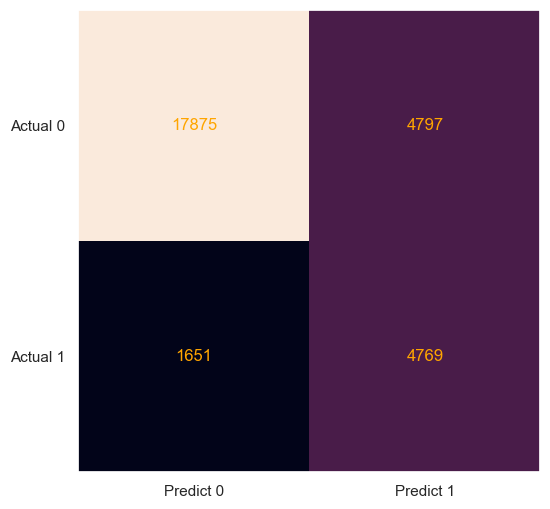

In [155]:
# Membuat visualisasi confusion matrix
cm_svm_imb = confusion_matrix(y_test, y_pred_svm_imb)
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(cm_svm_imb)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),
             ticklabels=('Predict 0', 'Predict 1'))
ax.yaxis.set(ticks=(0,1),
             ticklabels=('Actual 0', 'Actual 1'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm_svm_imb[i,j], ha='center', va='center',
            color='orange')

# Save Plot
plt.savefig('confusion_matrix_1.png',
            bbox_inches = 'tight',
            pad_inches = 1,
            transparent = True,
            orientation = 'landscape')

plt.show()

In [156]:
# Classification Report SVM IMB
print('Classification Report\n', classification_report(y_test, y_pred_svm_imb))

Classification Report
               precision    recall  f1-score   support

           0       0.92      0.79      0.85     22672
           1       0.50      0.74      0.60      6420

    accuracy                           0.78     29092
   macro avg       0.71      0.77      0.72     29092
weighted avg       0.82      0.78      0.79     29092



### 2.d). Decision Tree

In [159]:
# Predict Probabilitas
dtc_model_imb.predict_proba(x_SMOTE)

# Score dari data training
print('Score : ', dtc_model_imb.score(x_SMOTE, y_SMOTE))

Score :  0.743122394429717


In [160]:
# Predict data
y_pred_dtc_imb = dtc_model_imb.predict(x_test)
print(y_pred_dtc_imb)

# Score dari data testing
print('Score : ', dtc_model_imb.score(x_test, y_test))

[1 0 0 ... 0 1 0]
Score :  0.7568747421971677


#### 2.d.1). Confusion Matrix

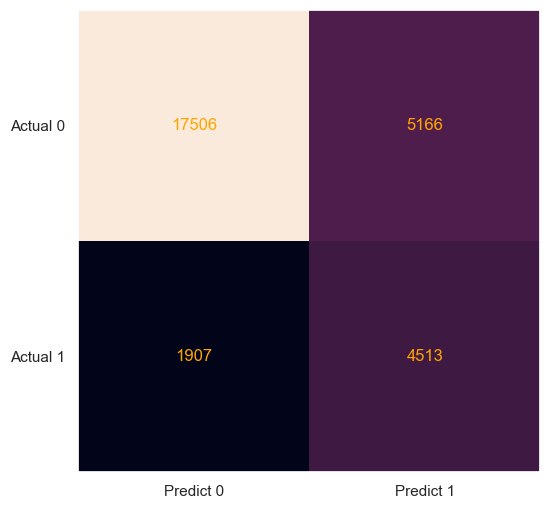

In [161]:
# Membuat visualisasi confusion matrix
cm_dtc_imb = confusion_matrix(y_test, y_pred_dtc_imb)
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(cm_dtc_imb)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),
             ticklabels=('Predict 0', 'Predict 1'))
ax.yaxis.set(ticks=(0,1),
             ticklabels=('Actual 0', 'Actual 1'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm_dtc_imb[i,j], ha='center', va='center',
            color='orange')

# Save Plot
plt.savefig('confusion_matrix_1.png',
            bbox_inches = 'tight',
            pad_inches = 1,
            transparent = True,
            orientation = 'landscape')

plt.show()

In [162]:
# Classification Report DTC IMB
print('Classification Report\n', classification_report(y_test, y_pred_dtc_imb))

Classification Report
               precision    recall  f1-score   support

           0       0.90      0.77      0.83     22672
           1       0.47      0.70      0.56      6420

    accuracy                           0.76     29092
   macro avg       0.68      0.74      0.70     29092
weighted avg       0.81      0.76      0.77     29092



### 2.e). Random Forest

In [163]:
# Predict Probabilitas
rfc_model_imb.predict_proba(x_SMOTE)

# Score dari data training
print('Score : ', rfc_model_imb.score(x_SMOTE, y_SMOTE))

Score :  0.9981190395001704


In [164]:
# Predict data
y_pred_rfc_imb = rfc_model_imb.predict(x_test)
print(y_pred_rfc_imb)

# Score dari data testing
print('Score : ', rfc_model_imb.score(x_test, y_test))

[1 0 1 ... 0 1 0]
Score :  0.8313625739034787


#### 2.e.1). Confusion Matrix

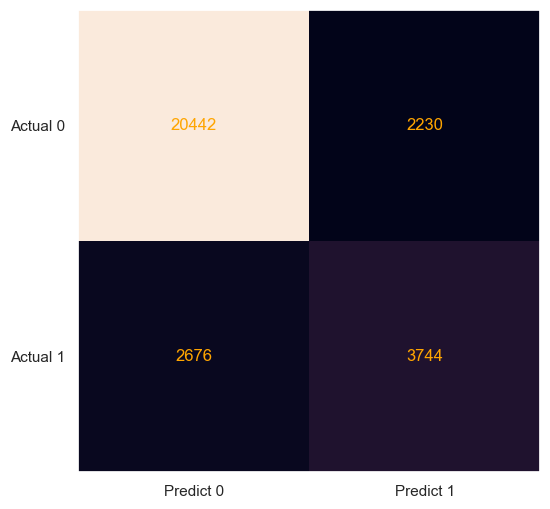

In [165]:
# Membuat visualisasi confusion matrix
cm_rfc_imb = confusion_matrix(y_test, y_pred_rfc_imb)
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(cm_rfc_imb)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),
             ticklabels=('Predict 0', 'Predict 1'))
ax.yaxis.set(ticks=(0,1),
             ticklabels=('Actual 0', 'Actual 1'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm_rfc_imb[i,j], ha='center', va='center',
            color='orange')

# Save Plot
plt.savefig('confusion_matrix_1.png',
            bbox_inches = 'tight',
            pad_inches = 1,
            transparent = True,
            orientation = 'landscape')

plt.show()

In [166]:
# Classification Report RFC IMB
print('Classification Report\n', classification_report(y_test, y_pred_rfc_imb))

Classification Report
               precision    recall  f1-score   support

           0       0.88      0.90      0.89     22672
           1       0.63      0.58      0.60      6420

    accuracy                           0.83     29092
   macro avg       0.76      0.74      0.75     29092
weighted avg       0.83      0.83      0.83     29092



### 2.f). Naive Bayes

In [167]:
# Predict Probabilitas
nb_model_imb.predict_proba(x_SMOTE)

# Score dari data training
print('Score : ', nb_model_imb.score(x_SMOTE, y_SMOTE))

Score :  0.7289436921824641


In [168]:
# Predict data
y_pred_nb_imb = nb_model_imb.predict(x_test)
print(y_pred_nb_imb)

# Score dari data testing
print('Score : ', nb_model_imb.score(x_test, y_test))

[1 0 0 ... 0 1 0]
Score :  0.7709335899903753


#### 2.f.1). Confusion Matrix

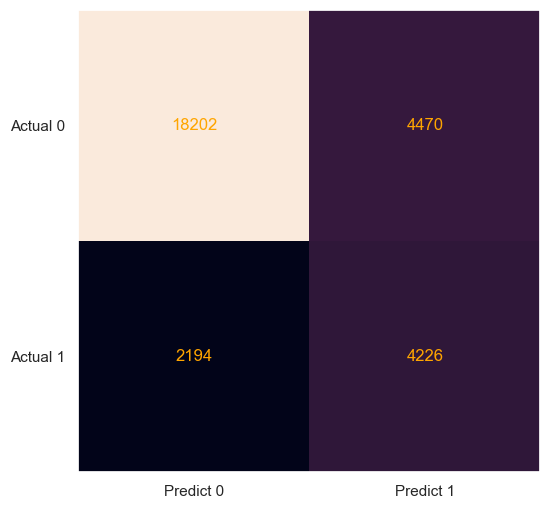

In [169]:
# Membuat visualisasi confusion matrix
cm_nb_imb = confusion_matrix(y_test, y_pred_nb_imb)
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(cm_nb_imb)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),
             ticklabels=('Predict 0', 'Predict 1'))
ax.yaxis.set(ticks=(0,1),
             ticklabels=('Actual 0', 'Actual 1'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm_nb_imb[i,j], ha='center', va='center',
            color='orange')

# Save Plot
plt.savefig('confusion_matrix_1.png',
            bbox_inches = 'tight',
            pad_inches = 1,
            transparent = True,
            orientation = 'landscape')

plt.show()

In [170]:
# Classification Report NB IMB
print('Classification Report\n', classification_report(y_test, y_pred_nb_imb))

Classification Report
               precision    recall  f1-score   support

           0       0.89      0.80      0.85     22672
           1       0.49      0.66      0.56      6420

    accuracy                           0.77     29092
   macro avg       0.69      0.73      0.70     29092
weighted avg       0.80      0.77      0.78     29092



# J. MODEL INFERENCE
-------------------------------------


In [181]:
model_inference = {
    'Location':[0, 1, 2, 3, 4, 5, 26],
    'Rainfall':[0.0, 0.3, 0.7, 1.0, 1.6, 1.9, 2.0],
    'WindGustSpeed':[6.0, 7.0, 9.0, 11.0, 73.5, 35.0, 39.0],
    'Humidity9am':[19.0, 22.0, 25.0, 32.0, 96.0, 70.0, 99.0],
    'Humidity3pm':[2.0, 9.0, 14.0, 18.0, 67.0, 69.0, 52.0],
    'Pressure9am':[1017.7, 1014.6, 1010.4, 1013.4, 1012.9, 1013.2, 1014],
    'Pressure3pm':[1016.7, 1015.2, 1019.8, 1021.3, 1016.9, 1018.7, 996.0],
    "RainToday":[0, 0, 0, 0, 1, 1, 1]
}

dt_trial = pd.DataFrame(model_inference)
dt_trial

,Location,Rainfall,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,RainToday
0,0,0.0,6.0,19.0,2.0,1017.7,1016.7,0
1,1,0.3,7.0,22.0,9.0,1014.6,1015.2,0
2,2,0.7,9.0,25.0,14.0,1010.4,1019.8,0
3,3,1.0,11.0,32.0,18.0,1013.4,1021.3,0
4,4,1.6,73.5,96.0,67.0,1012.9,1016.9,1
5,5,1.9,35.0,70.0,69.0,1013.2,1018.7,1
6,26,2.0,39.0,99.0,52.0,1014.0,996.0,1


In [182]:
dt_trial = scaler.fit_transform(dt_trial)

In [183]:
pred_lr_minf = lr_model.predict(dt_trial)
pred_lr_imb_minf = lr_model_imb.predict(dt_trial)
pred_knn_minf = knn_model.predict(dt_trial)
pred_knn_imb_minf = knn_model_imb.predict(dt_trial)
pred_svm_minf = svm_model.predict(dt_trial)
pred_svm_imb_minf = svm_model.predict(dt_trial)
pred_dtc_minf = dtc_model.predict(dt_trial)
pred_dtc_imb_minf = dtc_model_imb.predict(dt_trial)
pred_rfc_minf = rfc_model.predict(dt_trial)
pred_rfc_imb_minf = rfc_model_imb.predict(dt_trial)
pred_nb_minf = nb_model.predict(dt_trial)
pred_nb_imb_minf = nb_model_imb.predict(dt_trial)

print("Logistic Regression Model = ", pred_lr_minf)
print("Logistic Regression Model IMB = ", pred_lr_imb_minf)
print("K-Nearest Neighbors Model = ", pred_knn_minf)
print("K-Nearest Neighbors Model IMB = ", pred_knn_imb_minf)
print("Support Virtual Machine Model = ", pred_svm_minf)
print("Support Virtual Machine Model IMB = ", pred_svm_imb_minf)
print("Decision Tree Model = ", pred_dtc_minf)
print("Decision Tree Model IMB = ", pred_dtc_imb_minf)
print("Random Forest Model = ", pred_rfc_minf)
print("Random Forest Model IMB = ", pred_rfc_imb_minf)
print("Naive Bayes Model = ", pred_nb_minf)
print("Naive Bayes Model IMB = ", pred_nb_imb_minf)

Logistic Regression Model =  [0 0 0 0 1 0 1]
Logistic Regression Model IMB =  [0 0 0 0 1 1 1]
K-Nearest Neighbors Model =  [0 0 0 0 0 0 1]
K-Nearest Neighbors Model IMB =  [0 0 0 0 1 1 1]
Support Virtual Machine Model =  [0 0 0 0 1 0 1]
Support Virtual Machine Model =  [0 0 0 0 1 0 1]
Decision Tree Model =  [0 0 0 0 1 0 0]
Decision Tree Model IMB =  [0 0 0 0 1 1 1]
Random Forest Model =  [0 0 0 0 1 1 1]
Random Forest Model IMB =  [0 0 1 0 1 1 1]
Naive Bayes Model =  [0 0 0 0 1 1 1]
Naive Bayes Model =  [0 0 0 0 1 1 1]


# K. Pengambilan Kesimpulan
-----------------------------------------------------

Pada final project ini dilakukan pemodelan menggunakan **Logistic Regression, K-Nearest Neighbors, Support Virtual Machine, Decision Tree, Random Forest, dan Naive Bayes** untuk memprediksi hujan besok hari di Australia, dengan menggunakan Data Label Encode. Berdasarkan data target (RainTomorrow) ternyata terjadi ketidak seimbangan data tersebut atau disebut dengan imbalanced data, sehingga dilakukan percobaan model dengan data yang di atasi imbalancednya dan dengan data yang tanpa di atasi permasalahn imbalancednya. Setelah dilakukan training dan evaluasi model, didapatkan hasil:
1. `Logistic Regression Model` didapatkan score acuracy sebesar 0.8377217104358586
2. `Logistic Regression Model IMB` didapatkan score acuracy sebesar 0.7743022136669875
3. `K-Nearest Neighbors Model` didapatkan score acuracy sebesar 0.8370686099271277
4. `K-Nearest Neighbors Model IMB` didapatkan score acuracy sebesar 0.7702461157706586
5. `Support Virtual Machine Model` didapatkan score acuracy sebesar 0.8371717310600852
6. `Support Virtual Machine Model IMB` didapatkan score acuracy sebesar 0.7783583115633164
7. `Decision Tree Model` didapatkan score acuracy sebesar 0.8284751821806682
8. `Decision Tree Model IMB` didapatkan score acuracy sebesar 0.7568747421971677
9. **`Random Forest Model`** didapatkan score acuracy sebesar **`0.8402997387597965`**
10. **`Random Forest Model IMB`** didapatkan score acuracy sebesar **`0.8313625739034787`**
11. `Naive Bayes Model` didapatkan score acuracy sebesar 0.7810050873092259
12. `Naive Bayes Model IMB` didapatkan score acuracy sebesar 0.7709335899903753

-----------------------------------------------------

Berdasarkan hasil tersebut, dapat disimpulkan bahwa:
- Dari ke 6 model yang dibuat ternyata model Random Forest merupakan model terbaik.
- Pada model Random Forest tersebut, model Random Forest dengan data tanpa di atasi permasalahan imbalanced nilai acuracy nya sedikit tinggi 0.01 dibandingkan model Random Forest dengan data yang di atasi permasalahan imbalancednya.

-----------------------------------------------------

Hal-hal yang berpengaruh pada hasil prediksi hujan antara lain:
1. Rainfall memiliki hubungan korelasi positif dengan target (RainTomorrow) sebesar 0.325
2. RainToday memiliki hubungan korelasi positif dengan target (RainTomorrow) sebesar 0.306
3. Humidity9am dan Humidity3pm memiliki hubungan korelasi positif dengan target (RainTomorrow) masing-masing sebesar 0.252 dan 0.433
4. WindGustSpeed memiliki hubungan korelasi positif dengan target (RainTomorrow) 0.218
5. Pressure9am dan Pressure3pm memiliki hubungan korelasi negatif dengan target (RainTomorrow) masing-masing sebesar -0.230 dan -0.211
6. Location tetap digunakan dengan beberapa pertimbangan lainnya.

-----------------------------------------------------

Hasil yang didapatkan dari Model Inference Setelah membuat data sendiri dan diklasifikasi menggunalan 6 model, maka didapatkan hasil prediksi seperti berikut:
- Logistic Regression Model =  [0 0 0 0 1 0 1]
- Logistic Regression Model IMB =  [0 0 0 0 1 1 1]
- K-Nearest Neighbors Model =  [0 0 0 0 0 0 1]
- K-Nearest Neighbors Model IMB =  [0 0 0 0 1 1 1]
- Support Virtual Machine Model =  [0 0 0 0 1 0 1]
- Support Virtual Machine Model =  [0 0 0 0 1 0 1]
- Decision Tree Model =  [0 0 0 0 1 0 0]
- Decision Tree Model IMB =  [0 0 0 0 1 1 1]
- Random Forest Model =  [0 0 0 0 1 1 1]
- Random Forest Model IMB =  [0 0 1 0 1 1 1]
- Naive Bayes Model =  [0 0 0 0 1 1 1]
- Naive Bayes Model =  [0 0 0 0 1 1 1]

-----------------------------------------------------